<a href="https://colab.research.google.com/github/DomenicoArmillotta/MSC_thesis-Uml_quality_assessment_with_ML/blob/main/MSC_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To do List :  


*   testing of histogram feature
*   testing flask deploy
*   performance 2 model




#Library & Drive

In [1]:
!pip install detecto
!pip install easyocr
import easyocr
reader = easyocr.Reader(['en'])

import cv2
from google.colab import drive
from matplotlib import pyplot as plt
# setup directory used in the project for training and test phase
import cv2
from google.colab import drive
from matplotlib import pyplot as plt
from detecto import core, visualize, utils
from detecto.core import Dataset, DataLoader
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.8 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
# setup directory used in the project for training and test phase
# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

Mounted at /content/drive


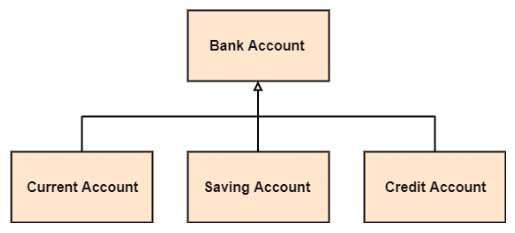

In [3]:
img = cv2.imread('/content/drive/MyDrive/UML/class2.png')
#show image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()


# Faster-RCNN

## Xml - Jpg / Preprocessing and organiztion file

rename from 0 to #file

In [ ]:
import os
import glob

def rename_files_with_same_base(directory_path):
    # Get a list of all files in the directory with different extensions
    files = glob.glob(os.path.join(directory_path, '*.*'))

    # Create a dictionary to store the mapping between old names and new names
    name_mapping = {}

    for file_path in files:
        # Get the base name without the extension
        base_name = os.path.splitext(os.path.basename(file_path))[0]

        if base_name not in name_mapping:
            # If the base name is not already in the mapping, add it with a new number
            name_mapping[base_name] = len(name_mapping) + 1

    # Rename the files using the mapping
    for file_path in files:
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        file_extension = os.path.splitext(file_path)[1]
        new_name = str(name_mapping[base_name]) + file_extension

        # Construct the new path and rename the file
        new_path = os.path.join(directory_path, new_name)
        os.rename(file_path, new_path)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_label/train/'
    rename_files_with_same_base(directory_path)


In [ ]:
import os

def check_files_with_whitespace(directory_path):
    files_with_whitespace = []
    for filename in os.listdir(directory_path):
        if ' ' in filename:
            files_with_whitespace.append(filename)
    return files_with_whitespace

# Replace 'your_directory_path' with the path of the directory you want to check
directory_path = '/content/drive/My Drive/dataset_label/train/'
files_with_whitespace = check_files_with_whitespace(directory_path)

if files_with_whitespace:
    print("Files with whitespace in their names:")
    for filename in files_with_whitespace:
        print(filename)
else:
    print("No files with whitespace in their names found.")


No files with whitespace in their names found.


With the ImageLabel labelling software , I created for each uml schema image an associated .xml , this xml having been created locally , had the path to the local machine. So this script rewrites the 'xml by replacing the path.
The xml - jpg association is necessary for model training , because the xml includes the bounded boxes

In [ ]:
import os
import re
import glob
import xml.etree.ElementTree as ET


def rename_filename_and_path_in_xml(directory_path):
    # Get a list of all XML files in the directory
    xml_files = glob.glob(os.path.join(directory_path, '*.xml'))

    for xml_file in xml_files:
        with open(xml_file, 'r') as file:
            xml_content = file.read()

        # Extract the base filename (without extension) and get the corresponding image filename
        base_filename = os.path.splitext(os.path.basename(xml_file))[0]
        tree = ET.ElementTree(ET.fromstring(xml_content))
        root = tree.getroot()
        filename = [elem.text for elem in root.findall('.//filename')]
        extension = filename[0].split('.')[-1]
        if extension == 'jpg' :
          new_filename = f"{base_filename}.jpg"
        elif extension == 'png' :
          new_filename = f"{base_filename}.png"


        # Replace the <filename> and <path> tags in the XML content
        xml_content = re.sub(r'<filename>.*?<\/filename>', f'<filename>{new_filename}</filename>', xml_content)
        xml_content = re.sub(r'<path>.*?<\/path>', f'<path>/content/drive/My Drive/dataset_label/train/{new_filename}</path>', xml_content)

        # Write the updated XML content back to the file
        with open(xml_file, 'w') as file:
            file.write(xml_content)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_label/train/'
    rename_filename_and_path_in_xml(directory_path)


png
png
jpg
png
jpeg
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
png
jpg
png
png
png
jpg
jpg
jpg
jpg
png
jpg
jpg
jpg
png
png
jpg
jpg
png
jpg
png
png
jpg
png
png
png
jpg
jpg
png
png
png
png
jpeg
jpg
png
png
jpg
png
png
png
png
jpg
jpg
png
png
png
jpg
png
png
png
jpg
png
png
jpg
jpeg
png
jpg
png
png
png
jpg
jpg
png
png
png
png
png
png
png
jpeg
png
jpg
png
png
png
jpg
jpg
png
png
jpg
png
png
png
png
png
png
png
png
png
png
png
png


##Training Model half

In [ ]:
from detecto import utils
train = '/content/drive/MyDrive/dataset_label/train/'
utils.xml_to_csv(train, 'train.csv')


filename  width  height  class  xmin  ymin  xmax  ymax  image_id
0       2.png    860     951  class   444   457   609   513         0
1       2.png    860     951  class   662   454   860   517         0
2       2.png    860     951  class   673   303   860   373         0
3       2.png    860     951  class   440   375   605   432         0
4       2.png    860     951  class   459   305   612   373         0
...       ...    ...     ...    ...   ...   ...   ...   ...       ...
2711  114.png   1779     951  arrow  1299   436  1415   535       110
2712  114.png   1779     951  arrow  1259   332  1581   682       110
2713  114.png   1779     951  arrow  1584   217  1658   634       110
2714  114.png   1779     951  arrow  1308   704  1355   751       110
2715  114.png   1779     951  arrow   989   704  1065   774       110

[2716 rows x 9 columns]

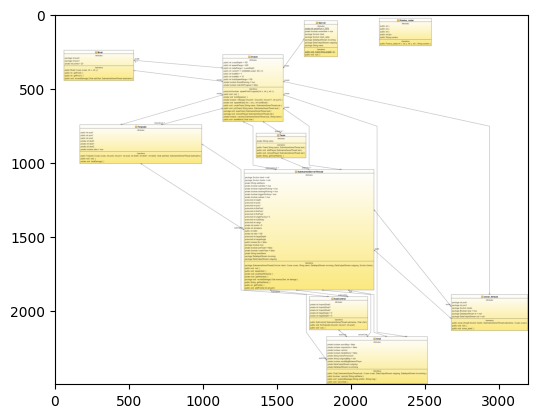

In [ ]:
from detecto import core, utils
import matplotlib.pyplot as plt


image = utils.read_image('/content/drive/MyDrive/dataset_label/train/47.png')

plt.imshow(image)
plt.show()

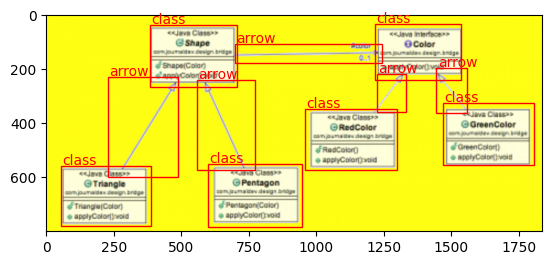

In [ ]:
from torchvision import transforms
from detecto import core
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.3),
    transforms.ToTensor(),
    utils.normalize_transform(),
])
dataset = core.Dataset('train.csv', train , transform=transform_img)

from detecto import visualize
image, information = dataset[47]
visualize.show_labeled_image(image, information['boxes'], information['labels'])


In [ ]:
dataloader = core.DataLoader(dataset)
dataloader
categories = ['class', 'arrow' , 'cross' , 'line']
model = core.Model(categories)

Epoch 1 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:36<00:00,  3.05it/s]


Epoch 2 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.08it/s]


Epoch 3 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:28<00:00,  3.91it/s]


Epoch 4 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  3.99it/s]


Epoch 5 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.03it/s]


Epoch 6 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.02it/s]


Epoch 7 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.00it/s]


Epoch 8 of 8
Begin iterating over training dataset


100%|██████████| 111/111 [00:27<00:00,  4.03it/s]


ValueError: ignored

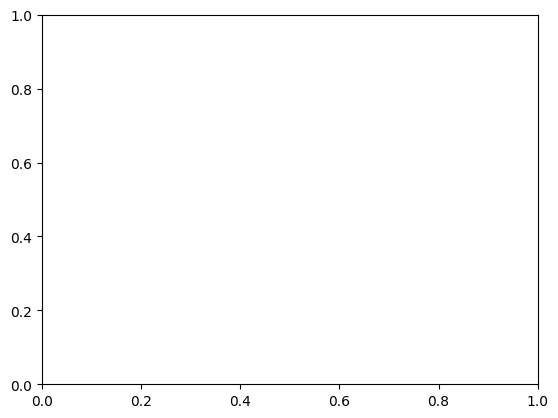

In [ ]:
history = model.fit(dataloader, epochs = 8 , learning_rate=0.001 , verbose = True)
model.save("/content/drive/MyDrive/dataset_label/model/uml_weights.pth")
plt.plot(history)
plt.show()
uml_model = model.get_internal_model()
print(type(uml_model))

Image Shape:  (261, 500, 3)
Initial predictions, w/o supression of overlapping bbox and accuracy filter
Total number of preictions:  34 



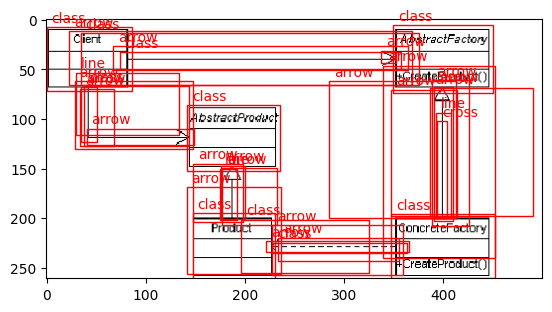




Filtered predictions after threshodling, i.e, accuracy > 0.25.
Total number of preictions:  10 



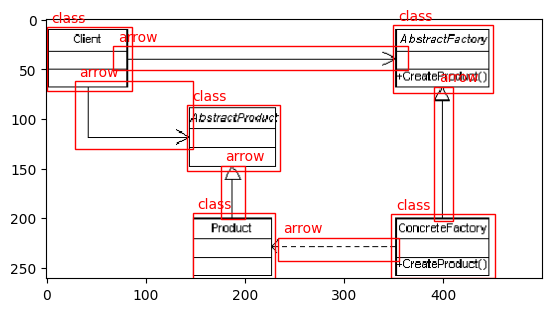



tensor([141.3789,  85.9625, 235.7707, 152.6816]) tensor(0.9960) class
tensor([147.3157, 194.6507, 229.9978, 261.0000]) tensor(0.9959) class
tensor([347.0215, 196.0160, 451.7340, 260.0413]) tensor(0.9956) class
tensor([349.4445,   5.5680, 450.3354,  74.0697]) tensor(0.9956) class
tensor([ 0.0000,  7.3536, 85.7262, 72.1650]) tensor(0.9951) class
tensor([175.3124, 147.0904, 200.0824, 201.0679]) tensor(0.9474) arrow
tensor([390.6566,  67.3890, 409.8688, 203.0674]) tensor(0.9235) arrow
tensor([ 66.7537,  26.4497, 363.9314,  50.9222]) tensor(0.8496) arrow
tensor([ 28.2325,  61.6529, 147.2331, 130.5559]) tensor(0.7388) arrow
tensor([233.4880, 219.4836, 354.8443, 243.2385]) tensor(0.7086) arrow


In [ ]:
import numpy as np
image=utils.read_image('/content/drive/My Drive/dataset_label/test/AbstractFactoryUML.png')
print("Image Shape: ", image.shape)
predictions = model.predict(image)
labels, boxes, scores = predictions
# Show all the predictions, without filtering
print("Initial predictions, w/o supression of overlapping bbox and accuracy filter")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n\n")

# Filter the predictions, based on the accuracy of predictions
acc_threshold = 0.70
confident_idx = [idx for idx, entry in enumerate(scores) if entry >= acc_threshold]

labels = [labels[idx] for idx in confident_idx]
boxes, scores = boxes[confident_idx], scores[confident_idx]

print("Filtered predictions after threshodling, i.e, accuracy > 0.25.")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n")
for category, pred, confidence in zip(labels, boxes, scores):
  print(pred, confidence, category)
# print(labels)



## Training Model Full Db

 **Preprocessing Dataset** : With the ImageLabel labelling software , I created for each uml schema image an associated .xml , this xml having been created locally , had the path to the local machine. So this script rewrites the 'xml by replacing the path. The xml - jpg association is necessary for model training , because the xml includes the bounded boxes

In [ ]:
import os
import re
import glob
import xml.etree.ElementTree as ET

def rename_filename_and_path_in_xml(directory_path):
    # Get a list of all XML files in the directory
    xml_files = glob.glob(os.path.join(directory_path, '*.xml'))

    for xml_file in xml_files:
        with open(xml_file, 'r') as file:
            xml_content = file.read()

        # Extract the base filename (without extension) and get the corresponding image filename
        base_filename = os.path.splitext(os.path.basename(xml_file))[0]
        tree = ET.ElementTree(ET.fromstring(xml_content))
        root = tree.getroot()
        filename = [elem.text for elem in root.findall('.//filename')]
        extension = filename[0].split('.')[-1]

        # Check if the file with the extension exists in the directory
        if os.path.exists(os.path.join(directory_path, f"{base_filename}.{extension}")):
            new_filename = f"{base_filename}.{extension}"
        else:
            # If not, find the correct extension
            for ext in ['jpg', 'png']:
                if os.path.exists(os.path.join(directory_path, f"{base_filename}.{ext}")):
                    new_filename = f"{base_filename}.{ext}"
                    break

        # Replace the <filename> and <path> tags in the XML content
        xml_content = re.sub(r'<filename>.*?<\/filename>', f'<filename>{new_filename}</filename>', xml_content)
        xml_content = re.sub(r'<path>.*?<\/path>', f'<path>{os.path.join(directory_path, new_filename)}</path>', xml_content)

        # Write the updated XML content back to the file
        with open(xml_file, 'w') as file:
            file.write(xml_content)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_full_labelled/train/'
    rename_filename_and_path_in_xml(directory_path)
    directory_path = '/content/drive/My Drive/dataset_full_labelled/validation/'
    rename_filename_and_path_in_xml(directory_path)
    directory_path = '/content/drive/My Drive/dataset_full_labelled/test/'
    rename_filename_and_path_in_xml(directory_path)

In [ ]:
from detecto import utils
train = '/content/drive/MyDrive/dataset_full_labelled/train/'
validation = '/content/drive/MyDrive/dataset_full_labelled/validation/'
test = '/content/drive/MyDrive/dataset_full_labelled/test/'


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 90.2MB/s]


Epoch 1 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:14<00:00,  3.84it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:15<00:00,  3.94it/s]


Loss: 0.9570314690470696
Epoch 2 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:14<00:00,  3.83it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:13<00:00,  4.45it/s]


Loss: 0.8731034184495609
Epoch 3 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:12<00:00,  3.91it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:13<00:00,  4.51it/s]


Loss: 0.8228015750646591
Epoch 4 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:12<00:00,  3.89it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:12<00:00,  4.62it/s]


Loss: 0.8098738556106885
Epoch 5 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:12<00:00,  3.90it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:13<00:00,  4.61it/s]


Loss: 0.8020286967357
Epoch 6 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:12<00:00,  3.90it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:12<00:00,  4.70it/s]


Loss: 0.7978696296612422
Epoch 7 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:14<00:00,  3.83it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:13<00:00,  4.57it/s]


Loss: 0.7932359049717586
Epoch 8 of 8
Begin iterating over training dataset


100%|██████████| 516/516 [02:13<00:00,  3.88it/s]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:13<00:00,  4.57it/s]


Loss: 0.7981259182095528


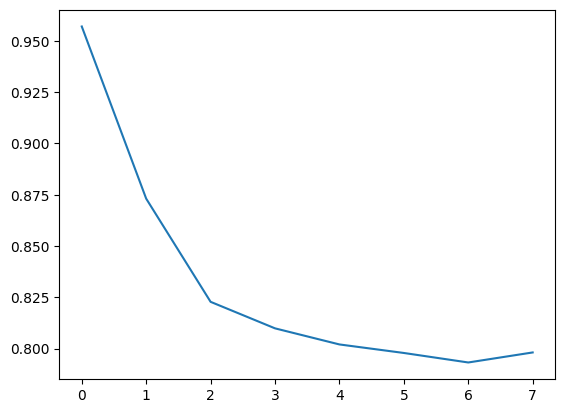

<class 'torchvision.models.detection.faster_rcnn.FasterRCNN'>


In [ ]:
from detecto import core, utils
from torchvision import transforms
import matplotlib.pyplot as plt

# Change data format
utils.xml_to_csv(train, 'train.csv')
utils.xml_to_csv(validation, 'validation.csv')

# Custom transforms augmented dataset for train
'''
custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.RandomRotation(10),
    transforms.ColorJitter(saturation=0.3),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    utils.normalize_transform(),
])
'''
custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.3),
    transforms.ToTensor(),
    utils.normalize_transform(),
])


dataset = core.Dataset('train.csv', train , transform=custom_transforms)

# Validation dataset

val_dataset = core.Dataset('validation.csv', validation)

# Customize training options

#loader = core.DataLoader(dataset, batch_size=16, shuffle=True)
loader = core.DataLoader(dataset) #COME HALF

model = core.Model(['class', 'arrow' , 'cross' ])
losses = model.fit(loader, val_dataset, epochs=8, learning_rate=0.001, verbose=True)
# Save model
model.save("/content/drive/MyDrive/dataset_full_labelled/model/full_uml_weights_AS_HALF.pth")

# Visualize loss during training

plt.plot(losses)
plt.show()




# Access underlying torchvision model for further control

torch_model = model.get_internal_model()
print(type(torch_model))

## Load Model from file

In [ ]:
import torch

# Definisci il percorso del file salvato
path = "/content/drive/MyDrive/dataset_full_labelled/model/full_uml_weights_AS_HALF.pth"
categories = ['class', 'arrow' , 'cross']

# Carica il modello
model = core.Model.load(path, categories)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 96.2MB/s]


## Testing Model

In [ ]:
import os
from detecto import core, utils
from detecto.utils import xml_to_csv
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Specifica il percorso alla cartella delle immagini di test
test_data_dir = '/content/drive/MyDrive/dataset_full_labelled/test/'

# Specifica il percorso alla cartella delle annotazioni XML di test
annotations_dir = '/content/drive/MyDrive/dataset_full_labelled/test_annotations/'

# Specifica il percorso del file CSV di output per le etichette XML convertite
csv_output_file = '/content/drive/MyDrive/dataset_full_labelled/test_labels.csv'

#abbiamo le celle rilevate con la classe
utils.xml_to_csv(test_data_dir, csv_output_file)


filename  width  height  class  xmin  ymin  xmax  ymax  image_id
0      61.png    656     626  cross   523   200   551   220         0
1      61.png    656     626  cross   285   320   312   336         0
2      61.png    656     626  class   246   236   352   302         0
3      61.png    656     626  class   422   234   532   303         0
4      61.png    656     626  class   479   113   595   182         0
...       ...    ...     ...    ...   ...   ...   ...   ...       ...
1791  125.png    714     408  class   106   255   564   407        64
1792  125.png    714     408  class   633   122   710   165        64
1793  125.png    714     408  class   642    66   696   106        64
1794  125.png    714     408  arrow   327   176   351   260        64
1795  125.png    714     408  cross    75   203    93   212        64

[1796 rows x 9 columns]

In [ ]:
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import pandas as pd
import numpy as np
import os  # Aggiungi questa importazione


class class_test_model:
    def __init__(self, image ,acc_threshold,  iou_threshold ):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      #print("Filtered predictions after thresholding, keeping only the 'class' class.")
      #print("Total number of predictions: ", len(boxes), "\n")
      #visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      #for category, pred, confidence in zip(labels, boxes, scores):
        #print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { #'class': 1,
      #'arrow': 2,
      'cross': 3
      }
      mapped_labels = list(map(labels_map.get, labels))
      if all(label is not None for label in mapped_labels):
          int_labels = torch.tensor(mapped_labels, dtype=torch.int)
      else:
          print("Some labels do not exist in the labels_map.")
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      #print("Total number of preictions: ", len(filtered_boxes), "\n")
      #visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      #for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        #print(fb, fl, fs)

      return filtered_boxes,filtered_labels

    def create_dataframe(self , filename):
        # Estrai i dati necessari dai filtered_boxes e filtered_labels
        data = {
            'filename': [filename] * len(self.filtered_labels) ,
            'width': [self.image.shape[1]] * len(self.filtered_labels),
            'height': [self.image.shape[0]] * len(self.filtered_labels),
            'class': self.filtered_labels,
            'xmin': [int(box[0].item()) for box in self.filtered_boxes],
            'ymin': [int(box[1].item()) for box in self.filtered_boxes],
            'xmax': [int(box[2].item()) for box in self.filtered_boxes],
            'ymax': [int(box[3].item()) for box in self.filtered_boxes]
        }

        # Crea un DataFrame utilizzando i dati
        df = pd.DataFrame(data)

        return df

    def show_predicted_image(self):
        visualize.show_labeled_image(image, self.filtered_boxes,self.filtered_labels)







SOLO PER LE CROSS : hanno parametri differenti per la ricerca della segmentazione

In [ ]:
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import pandas as pd
import numpy as np
import os  # Aggiungi questa importazione


class class_test_model_cross:
    def __init__(self, image ,acc_threshold,  iou_threshold ):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      #print("Filtered predictions after thresholding, keeping only the 'class' class.")
      #print("Total number of predictions: ", len(boxes), "\n")
      #visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      #for category, pred, confidence in zip(labels, boxes, scores):
        #print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { #'class': 1,
      #'arrow': 2,
      'cross': 3
      }
      mapped_labels = list(map(labels_map.get, labels))
      if all(label is not None for label in mapped_labels):
          int_labels = torch.tensor(mapped_labels, dtype=torch.int)
      else:
          print("Some labels do not exist in the labels_map.")
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      #print("Total number of preictions: ", len(filtered_boxes), "\n")
      #visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      #for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        #print(fb, fl, fs)

      return filtered_boxes,filtered_labels

    def create_dataframe(self , filename):
        # Estrai i dati necessari dai filtered_boxes e filtered_labels
        data = {
            'filename': [filename] * len(self.filtered_labels) ,
            'width': [self.image.shape[1]] * len(self.filtered_labels),
            'height': [self.image.shape[0]] * len(self.filtered_labels),
            'class': self.filtered_labels,
            'xmin': [int(box[0].item()) for box in self.filtered_boxes],
            'ymin': [int(box[1].item()) for box in self.filtered_boxes],
            'xmax': [int(box[2].item()) for box in self.filtered_boxes],
            'ymax': [int(box[3].item()) for box in self.filtered_boxes]
        }

        # Crea un DataFrame utilizzando i dati
        df = pd.DataFrame(data)
        df = df.loc[df['class'] == 'cross']

        return df

    def show_predicted_image(self):
        visualize.show_labeled_image(image, self.filtered_boxes,self.filtered_labels)







## Single Image

Codice singola immagine **predicted**

/content/drive/My Drive/dataset_full_labelled/test/110.png
Image Shape:  (2014, 1914, 3)


Some labels do not exist in the labels_map.




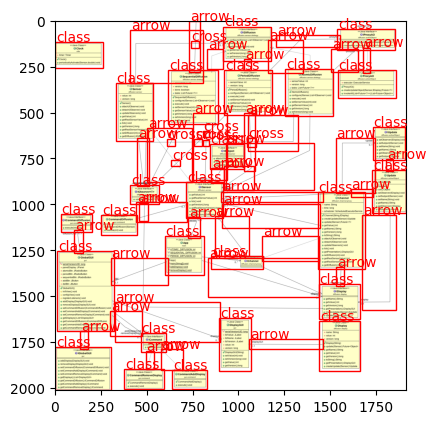

filename  width  height  class  xmin  ymin  xmax  ymax
57  110.png   1914    2014  cross   739   108   784   146
59  110.png   1914    2014  cross  1047   637  1094   685
61  110.png   1914    2014  cross   609   644   653   682
62  110.png   1914    2014  cross   805   651   839   681
65  110.png   1914    2014  cross   757   645   801   682
66  110.png   1914    2014  cross   804   601   840   635
69  110.png   1914    2014  cross   634   759   683   793

In [ ]:

image=utils.read_image('/content/drive/My Drive/dataset_full_labelled/test/110.png')
path = '/content/drive/My Drive/dataset_full_labelled/test/110.png'
print(path)
filename = os.path.basename(str(path))
# Creazione dell'oggetto tester
acc_threshold = 0.12
iou_threshold=0.2
tester = class_test_model_cross(image,acc_threshold,iou_threshold )
tester.show_predicted_image()
df = tester.create_dataframe(str(filename))
df

Immagini con label del **gound truth**

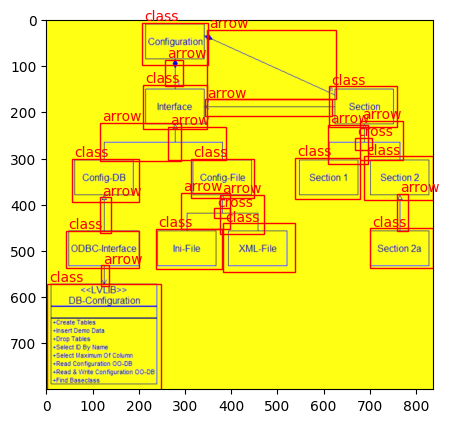

In [12]:
import pandas as pd
from detecto import utils
test = '/content/drive/MyDrive/dataset_full_labelled/test/'
utils.xml_to_csv(test, 'predicted_data_AS_HALF_CROSS.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dataset_full_labelled/test/predicted/predicted_data_AS_HALF_CROSS.csv')



from torchvision import transforms
from detecto import core
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.3),
    transforms.ToTensor(),
    utils.normalize_transform(),
])
dataset = core.Dataset('predicted_data_AS_HALF_CROSS.csv', test , transform=transform_img)

from detecto import visualize
image, information = dataset[0]
visualize.show_labeled_image(image, information['boxes'], information['labels'])


In [ ]:
# Sostituisci 'test_df' con il nome del tuo DataFrame
row_number = 4  # Indice della riga che desideri visualizzare (inizia da 0)

# Seleziona e visualizza la riga specifica
row_4 = test_df.iloc[row_number]
print(row_4)


NameError: ignored

## Whole direcory test

Codice per iterare sulla directory

In [ ]:
import os
import glob

# Definisci il percorso della cartella
path = '/content/drive/My Drive/dataset_full_labelled/test/'

# Utilizza glob per ottenere una lista di tutti i file con estensione .png o .jpg
images = glob.glob(os.path.join(path, '*.png')) + glob.glob(os.path.join(path, '*.jpg'))

predicted_df = pd.DataFrame()

# Itera su tutte le immagini
for image_path in images:
    print(image_path)
    image=utils.read_image(image_path)
    # Esegui qui le operazioni desiderate per ciascuna immagine
    filename = os.path.basename(str(image_path))
    tester = class_test_model_cross(img,acc_threshold,iou_threshold)
    # Creazione dell'oggetto tester
    acc_threshold = 0.12 #0.6
    iou_threshold=0.2
    tmp_df = tester.create_dataframe(str(filename))
    predicted_df = pd.concat([predicted_df, tmp_df], axis=0)

predicted_df


/content/drive/My Drive/dataset_full_labelled/test/67.png
Image Shape:  (2021, 3049, 3)


Some labels do not exist in the labels_map.


/content/drive/My Drive/dataset_full_labelled/test/105.png
Image Shape:  (770, 680, 3)


Some labels do not exist in the labels_map.


/content/drive/My Drive/dataset_full_labelled/test/93.png
Image Shape:  (1612, 1347, 3)


Some labels do not exist in the labels_map.


/content/drive/My Drive/dataset_full_labelled/test/61.png
Image Shape:  (626, 656, 3)


Some labels do not exist in the labels_map.


/content/drive/My Drive/dataset_full_labelled/test/114.png
Image Shape:  (1012, 1272, 3)


Some labels do not exist in the labels_map.


/content/drive/My Drive/dataset_full_labelled/test/81.png
Image Shape:  (238, 494, 3)


Some labels do not exist in the labels_map.


/content/drive/My Drive/dataset_full_labelled/test/101.png
Image Shape:  (610, 1124, 3)


Some labels do not exist in the labels_map.


/content/drive/My Drive/dataset_full_labelled/test/9

filename  width  height  class  xmin  ymin  xmax  ymax
38   67.png    562     242  cross  1316   717  1373   758
39   67.png    562     242  cross  2186  1496  2262  1573
40   67.png    562     242  cross  1153   769  1231   812
41   67.png    562     242  cross   821   883   896   961
42   67.png    562     242  cross   960  1084  1039  1158
..      ...    ...     ...    ...   ...   ...   ...   ...
33   90.jpg    562     242  cross   181    44   194    55
34   90.jpg    562     242  cross   226   221   243   232
28   99.jpg    562     242  cross   458   282   477   304
28  121.jpg    562     242  cross   770   591   795   609
29  121.jpg    562     242  cross   655   376   686   397

[97 rows x 8 columns]

In [ ]:
# Salva il DataFrame in un file CSV
predicted_df.to_csv('/content/drive/My Drive/dataset_full_labelled/test/predicted/predicted_data_AS_HALF_CROSS.csv')


Apro il file predicted dal modello e il file del ground truth

In [ ]:
import pandas as pd
predicted_df = pd.read_csv('/content/drive/My Drive/dataset_full_labelled/test/predicted/predicted_data_AS_HALF_CROSS.csv')
ground_df = pd.read_csv('/content/drive/MyDrive/dataset_full_labelled/test_labels.csv')



In [ ]:
ground_df


filename  width  height  class  xmin  ymin  xmax  ymax  image_id
0      61.png    656     626  cross   523   200   551   220         0
1      61.png    656     626  cross   285   320   312   336         0
2      61.png    656     626  class   246   236   352   302         0
3      61.png    656     626  class   422   234   532   303         0
4      61.png    656     626  class   479   113   595   182         0
...       ...    ...     ...    ...   ...   ...   ...   ...       ...
1791  125.png    714     408  class   106   255   564   407        64
1792  125.png    714     408  class   633   122   710   165        64
1793  125.png    714     408  class   642    66   696   106        64
1794  125.png    714     408  arrow   327   176   351   260        64
1795  125.png    714     408  cross    75   203    93   212        64

[1796 rows x 9 columns]

In [ ]:
predicted_df

Unnamed: 0 filename  width  height  class  xmin  ymin  xmax  ymax
0           38   67.png    562     242  cross  1316   717  1373   758
1           39   67.png    562     242  cross  2186  1496  2262  1573
2           40   67.png    562     242  cross  1153   769  1231   812
3           41   67.png    562     242  cross   821   883   896   961
4           42   67.png    562     242  cross   960  1084  1039  1158
..         ...      ...    ...     ...    ...   ...   ...   ...   ...
92          33   90.jpg    562     242  cross   181    44   194    55
93          34   90.jpg    562     242  cross   226   221   243   232
94          28   99.jpg    562     242  cross   458   282   477   304
95          28  121.jpg    562     242  cross   770   591   795   609
96          29  121.jpg    562     242  cross   655   376   686   397

[97 rows x 9 columns]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score
threshold = 0.5
def calculate_iou(box1, box2):
    x1_max = max(box1[0], box2[0])
    x2_min = min(box1[2], box2[2])
    y1_max = max(box1[1], box2[1])
    y2_min = min(box1[3], box2[3])

    intersection = max(0, x2_min - x1_max) * max(0, y2_min - y1_max)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection / (box1_area + box2_area - intersection)
    return iou
import numpy as np

# Calcola IoU per ogni riga
ious = []
predictions = []
ground_truths = []
for _, row in ground_df.iterrows():
    ground_box = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
    predicted_row = predicted_df[predicted_df['filename'] == row['filename']]

    if predicted_row.empty:  # Nessuna bounding box rilevata
        ious.append(0)
        predictions.append(False)
        ground_truths.append(True)
    else:
        predicted_box = [predicted_row.iloc[0]['xmin'], predicted_row.iloc[0]['ymin'], predicted_row.iloc[0]['xmax'], predicted_row.iloc[0]['ymax']]
        iou = calculate_iou(ground_box, predicted_box)
        ious.append(iou)
        predictions.append(iou > threshold)
        ground_truths.append(True)

# Controlla le bounding box previste che non esistono in ground truth
for _, row in predicted_df.iterrows():
    predicted_box = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
    ground_row = ground_df[ground_df['filename'] == row['filename']]

    if ground_row.empty:  # Bounding box prevista che non esiste
        ious.append(0)
        predictions.append(True)
        ground_truths.append(False)

# Calcola precisione e recall
precision = precision_score(ground_truths, predictions)
recall = recall_score(ground_truths, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 1.0
Recall: 0.004454342984409799


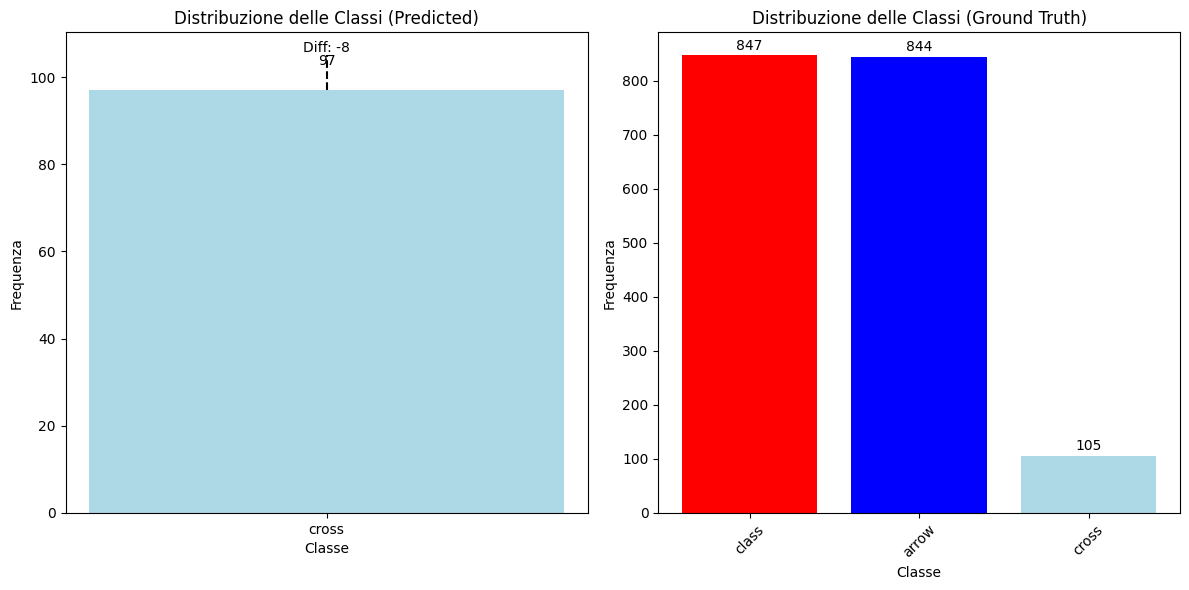

In [ ]:
import matplotlib.pyplot as plt

# Calcola la distribuzione delle classi per il dataframe 'predicted_df'
predicted_class_counts = predicted_df['class'].value_counts()

# Calcola la distribuzione delle classi per il dataframe 'ground_df'
ground_class_counts = ground_df['class'].value_counts()

# Crea una mappatura dei colori per le classi
class_colors = {
    'class': 'red',
    'arrow': 'blue',
    'cross': 'lightblue',  # Puoi personalizzare il colore celeste a tuo piacimento
    # Aggiungi altre classi e colori se necessario
}

# Crea un subplot con due grafici affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafico per il dataframe 'predicted_df'
for cls in predicted_class_counts.index:
    ax1.bar(cls, predicted_class_counts[cls], color=class_colors.get(cls, 'gray'))  # Usa il colore grigio come fallback
ax1.set_title('Distribuzione delle Classi (Predicted)')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Frequenza')

# Aggiungi i valori sopra le barre nel grafico 'predicted_df'
for i, v in enumerate(predicted_class_counts.values):
    ax1.text(predicted_class_counts.index[i], v + 5, str(v), ha='center', va='bottom')

# Grafico per il dataframe 'ground_df'
for cls in ground_class_counts.index:
    ax2.bar(cls, ground_class_counts[cls], color=class_colors.get(cls, 'gray'))  # Usa il colore grigio come fallback
ax2.set_title('Distribuzione delle Classi (Ground Truth)')
ax2.set_xlabel('Classe')
ax2.set_ylabel('Frequenza')

# Aggiungi i valori sopra le barre nel grafico 'ground_df'
for i, v in enumerate(ground_class_counts.values):
    ax2.text(ground_class_counts.index[i], v + 5, str(v), ha='center', va='bottom')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il distacco tra le classi 'predicted' e 'ground'
for cls in predicted_class_counts.index:
    if cls in ground_class_counts:
        diff = predicted_class_counts[cls] - ground_class_counts[cls]
        ax1.plot([cls, cls], [predicted_class_counts[cls], ground_class_counts[cls]], color='black', linestyle='--')
        ax1.annotate(f'Diff: {diff}', xy=(cls, max(predicted_class_counts[cls], ground_class_counts[cls])), ha='center', va='bottom')

# Mostra i grafici
plt.tight_layout()
plt.show()


In [ ]:
# Filtrare i dataframe per escludere la classe 'cross'
predicted_counts = predicted_counts[predicted_counts['class'] != 'cross']
ground_counts = ground_counts[ground_counts['class'] != 'cross']

# Unire i due dataframe sulla base del nome del file e della classe
merged_df = pd.merge(predicted_counts, ground_counts, on=['filename', 'class'], suffixes=('_pred', '_true'))

# Calcolare la precisione, il recall e la f1
precision = precision_score(merged_df['counts_true'], merged_df['counts_pred'], average='weighted')
recall = recall_score(merged_df['counts_true'], merged_df['counts_pred'], average='weighted')
f1 = f1_score(merged_df['counts_true'], merged_df['counts_pred'], average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.6092505854800936
Recall: 0.5983606557377049
F1 Score: 0.5938979963570127


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#dataframe to have the overall performance of different models
import pandas as pd

# Crea un dizionario con i dati delle colonne
data = {
    'model': ['limited', 'full_limited_augmented', 'full_fullSize_augmened' ,'full_limited_augmenedCrop','full_limited_augmented2' , "full_without_augmentation" ],
    'precision': [0.58, 0.48, 0.59, 0.00, 0.55 , 0.62],
    'recall': [0.50, 0.38, 0.49, 0.00, 0.47 , 0.60],
    'f1measure': [0.52, 0.39, 0.49, 0.00, 0.45 , 0.59],
    'detected_class': [770, 732, 767,0,759 , 789],
    'diff_class': [-77, -115, -80,-847,-88 , -58],
    'detected_arrow': [565, 321, 466,0,449 , 720 ],
    'diff_arrow': [-279, -533,-378, -844,-395 , -124],
    'detected_cross': [21, 0, 0,0,0 , 97],
    'diff_cross': [-87, -105, -105,-105,-105 , -8]
}

# Crea il DataFrame
df = pd.DataFrame(data)

# Stampare il DataFrame
df

model  precision  recall  f1measure  detected_class  \
0                    limited       0.58    0.50       0.52             770   
1     full_limited_augmented       0.48    0.38       0.39             732   
2     full_fullSize_augmened       0.59    0.49       0.49             767   
3  full_limited_augmenedCrop       0.00    0.00       0.00               0   
4    full_limited_augmented2       0.55    0.47       0.45             759   
5  full_without_augmentation       0.62    0.60       0.59             789   

   diff_class  detected_arrow  diff_arrow  detected_cross  diff_cross  
0         -77             565        -279              21         -87  
1        -115             321        -533               0        -105  
2         -80             466        -378               0        -105  
3        -847               0        -844               0        -105  
4         -88             449        -395               0        -105  
5         -58             720        -124              97          -8

In [ ]:
#dataframe to have the overall performance of different models
import pandas as pd

# Crea un dizionario con i dati delle colonne
data = {
    'model': ['limited', 'full_limited_augmented', 'full_fullSize_augmened' ,'full_limited_augmenedCrop','full_limited_augmented2' , "full_without_augmentation" ],
    'detected_class': [770, 732, 767,0,759 , 789],
    'diff_class': [-77, -115, -80,-847,-88 , -58],
    'detected_arrow': [565, 321, 466,0,449 , 720 ],
    'diff_arrow': [-279, -533,-378, -844,-395 , -124],
    'detected_cross': [21, 0, 0,0,0 , 97],
    'diff_cross': [-87, -105, -105,-105,-105 , -8]
}

# Crea il DataFrame
df = pd.DataFrame(data)

# Stampare il DataFrame
df

model  detected_class  diff_class  detected_arrow  \
0                    limited             770         -77             565   
1     full_limited_augmented             732        -115             321   
2     full_fullSize_augmened             767         -80             466   
3  full_limited_augmenedCrop               0        -847               0   
4    full_limited_augmented2             759         -88             449   
5  full_without_augmentation             789         -58             720   

   diff_arrow  detected_cross  diff_cross  
0        -279              21         -87  
1        -533               0        -105  
2        -378               0        -105  
3        -844               0        -105  
4        -395               0        -105  
5        -124              97          -8

In [ ]:

import matplotlib.pyplot as plt

# Crea una lista di colori univoci per ogni modello
colors = ['red', 'green', 'blue', 'yellow', 'purple']

# Crea il grafico a dispersione
plt.figure(figsize=(10,6))
for i, model in enumerate(df['model'].unique()):
    plt.scatter(['precision']*len(df[df['model'] == model]), df[df['model'] == model]['precision'], color=colors[i])
    #plt.scatter(['recall']*len(df[df['model'] == model]), df[df['model'] == model]['recall'], color=colors[i])
    #plt.scatter(['diff_class']*len(df[df['model'] == model]), df[df['model'] == model]['diff_class'], color=colors[i])

for i, model in enumerate(df['model'].unique()):
    #plt.scatter(['precision']*len(df[df['model'] == model]), df[df['model'] == model]['precision'], color=colors[i])
    plt.scatter(['recall']*len(df[df['model'] == model]), df[df['model'] == model]['recall'], color=colors[i])
    #plt.scatter(['diff_class']*len(df[df['model'] == model]), df[df['model'] == model]['diff_class'], color=colors[i])
# Aggiungi titolo e etichette agli assi
plt.title('Precisione, Recall')
plt.xlabel('metric')
plt.ylabel('value')

# Mostra la legenda
plt.legend(df['model'].unique())

# Mostra il grafico
plt.show()


In [ ]:

import matplotlib.pyplot as plt

# Crea una lista di colori univoci per ogni modello
colors = ['red', 'green', 'blue', 'yellow', 'purple']

# Crea il grafico a dispersione
plt.figure(figsize=(10,6))
for i, model in enumerate(df['model'].unique()):
    plt.scatter(['diff_class']*len(df[df['model'] == model]), df[df['model'] == model]['diff_class'], color=colors[i])

# Aggiungi titolo e etichette agli assi
plt.title('Diff class')
plt.xlabel('metric')
plt.ylabel('value')

# Mostra la legenda
plt.legend(df['model'].unique())

# Mostra il grafico
plt.show()


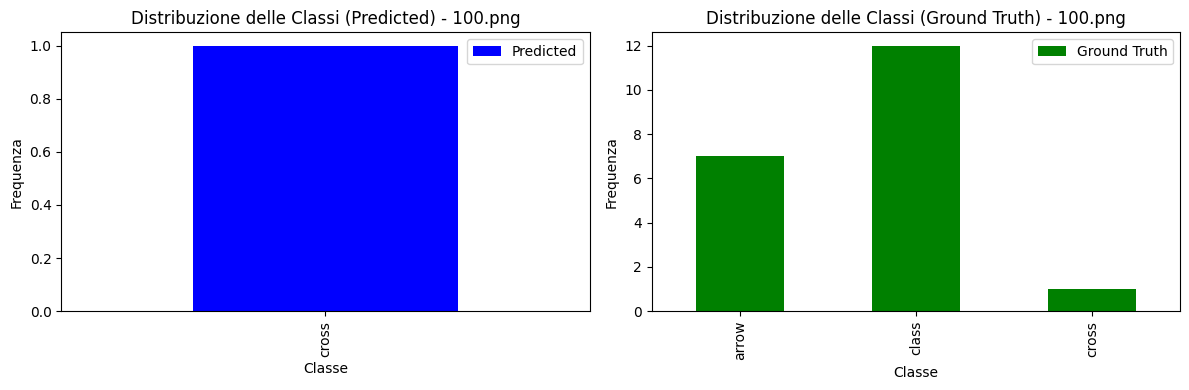

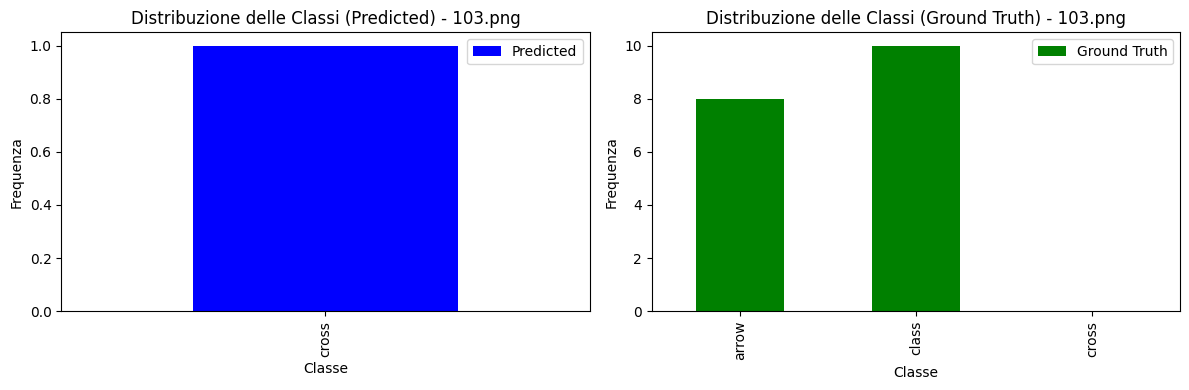

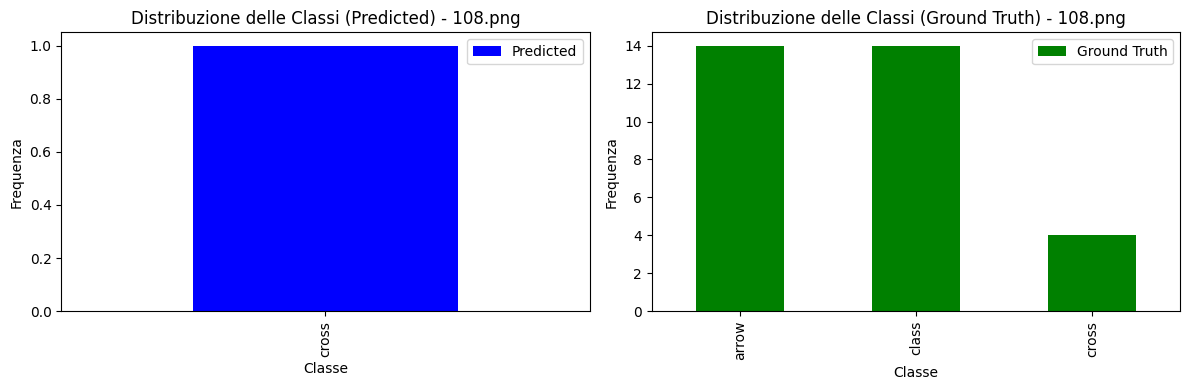

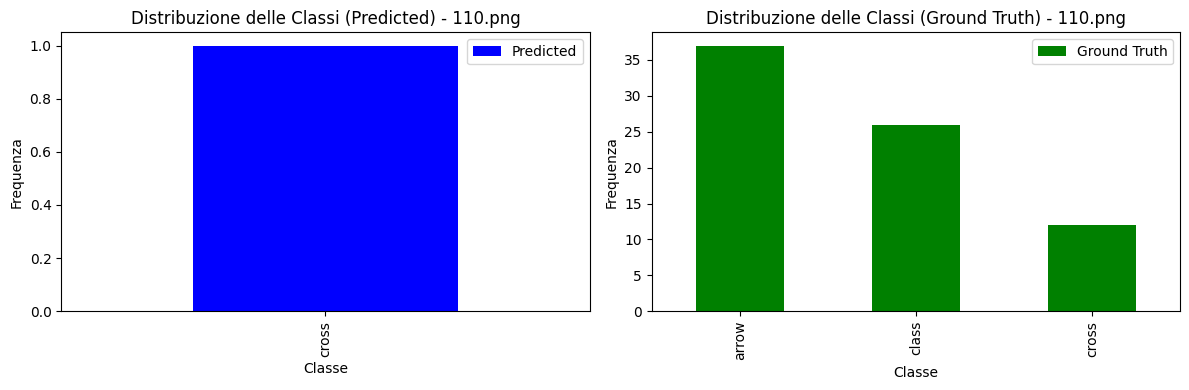

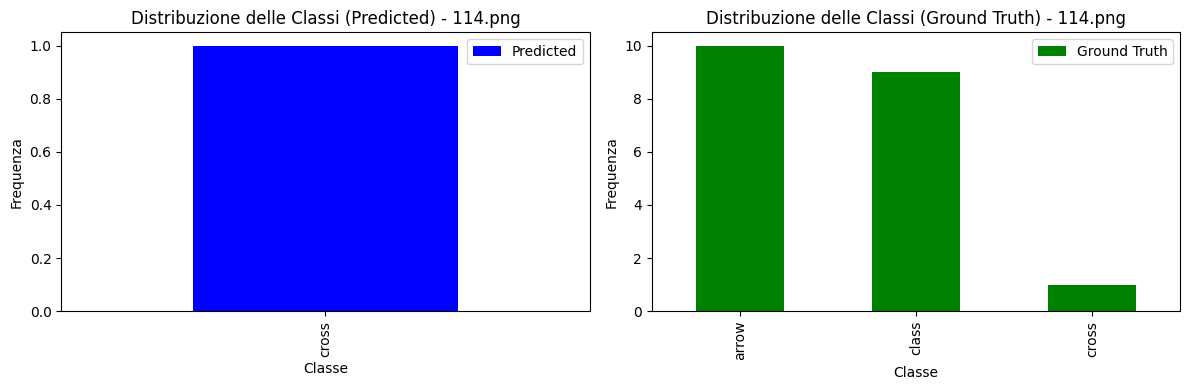

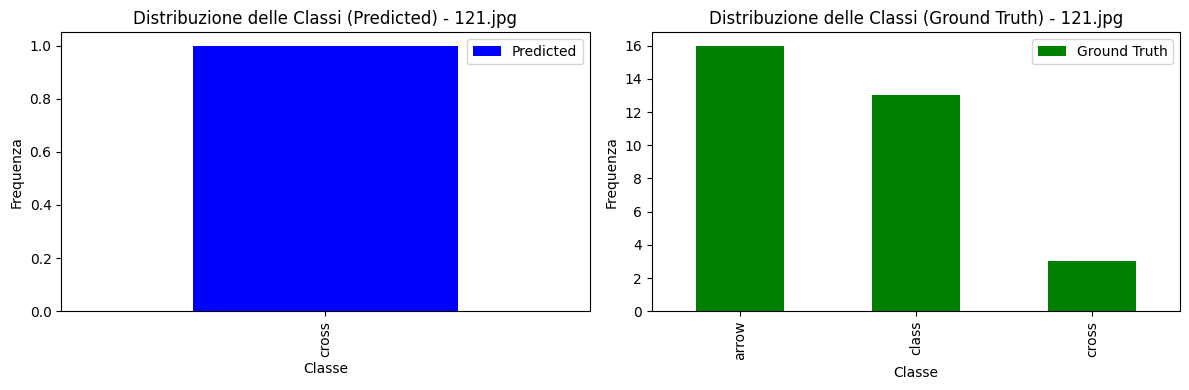

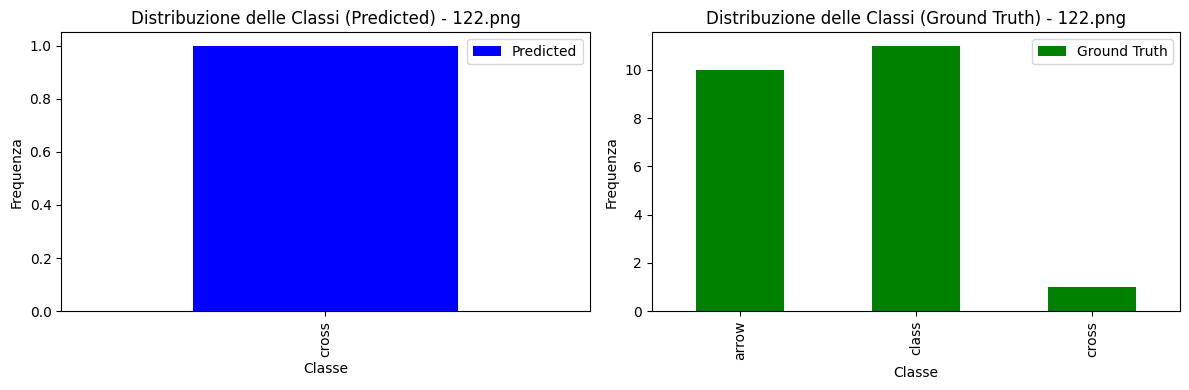

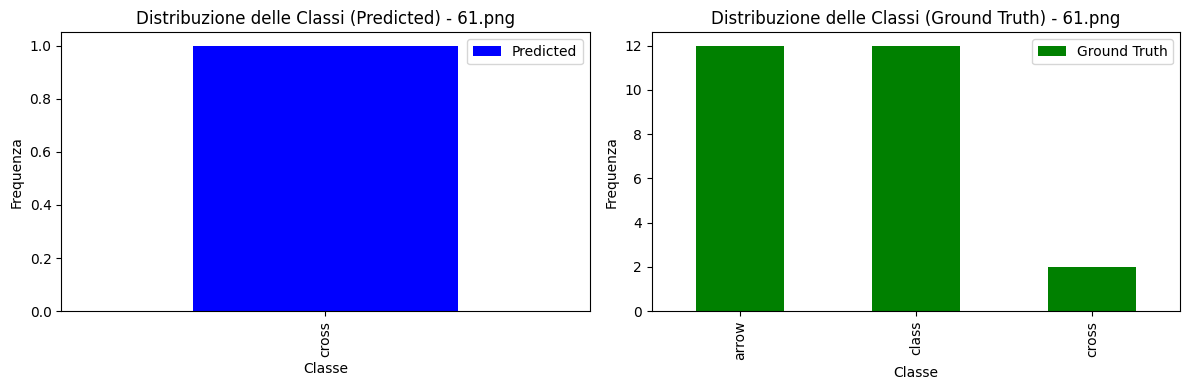

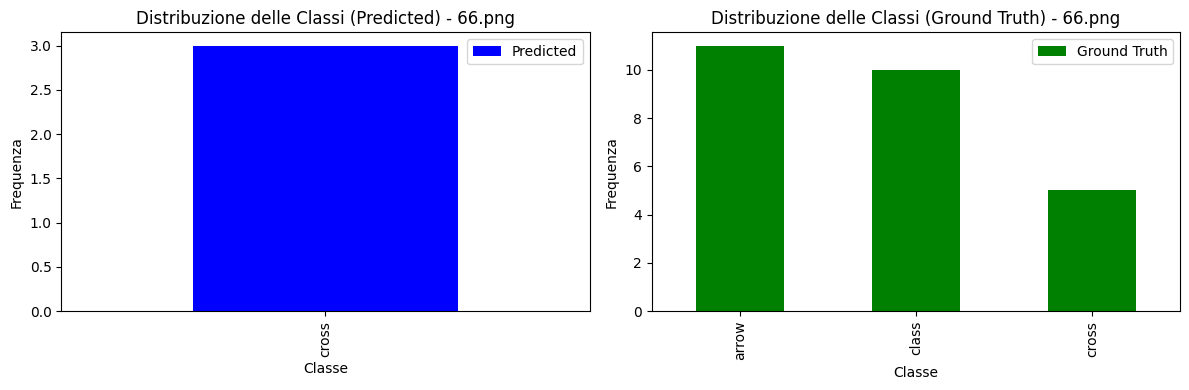

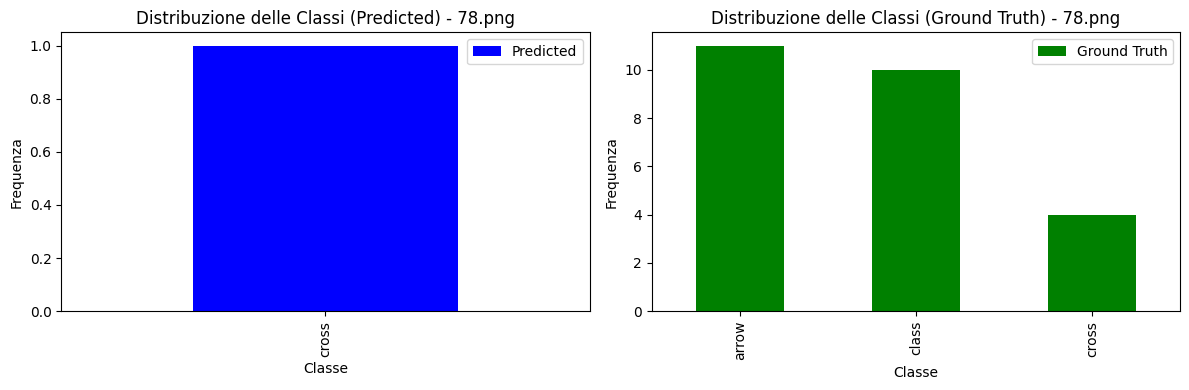

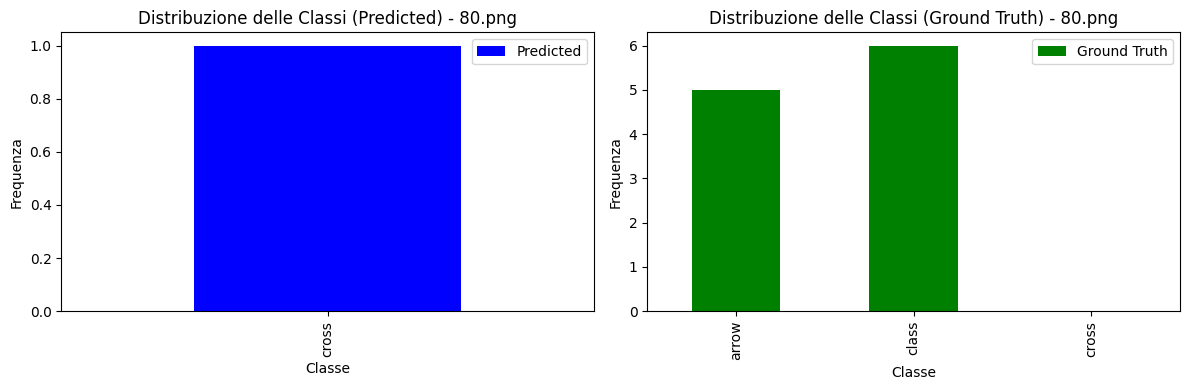

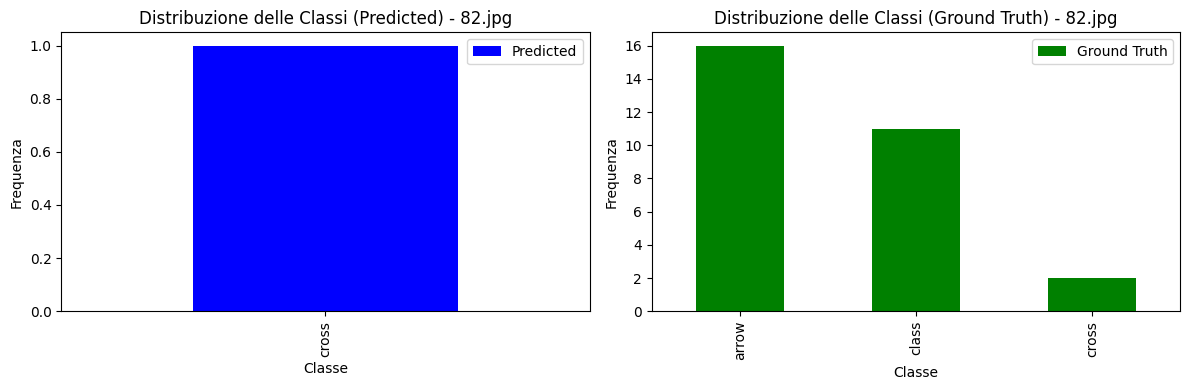

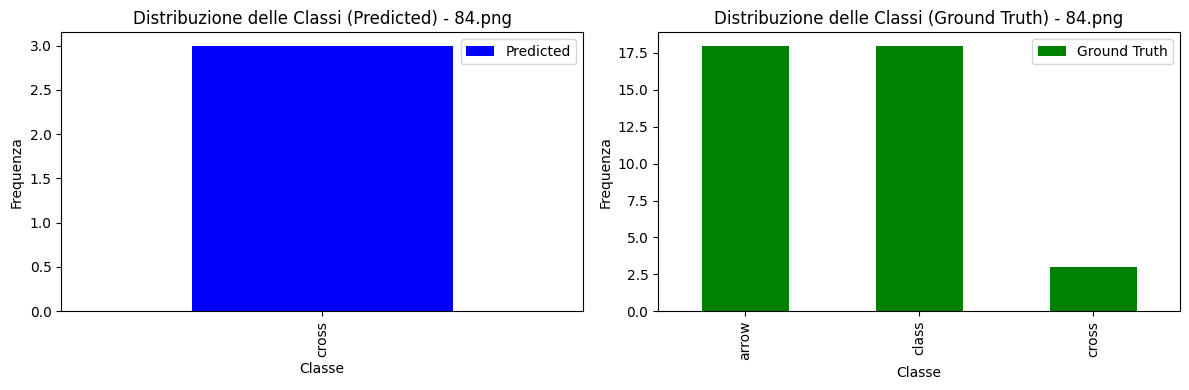

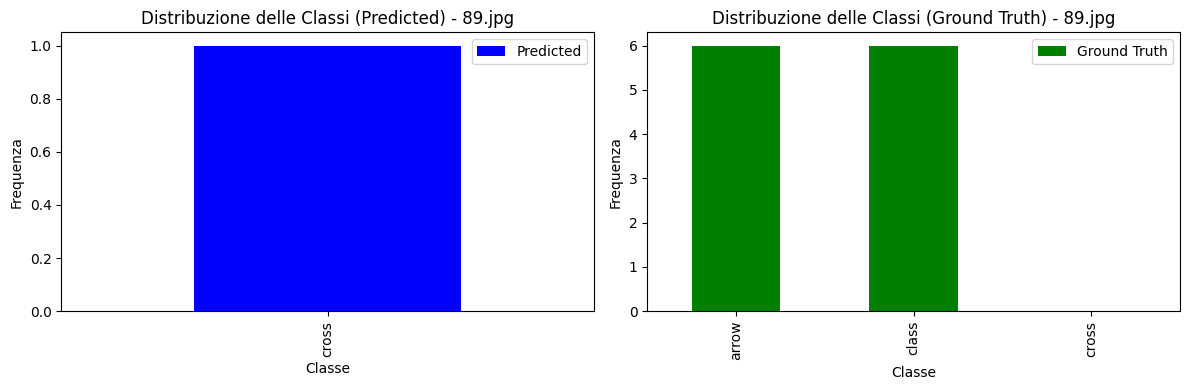

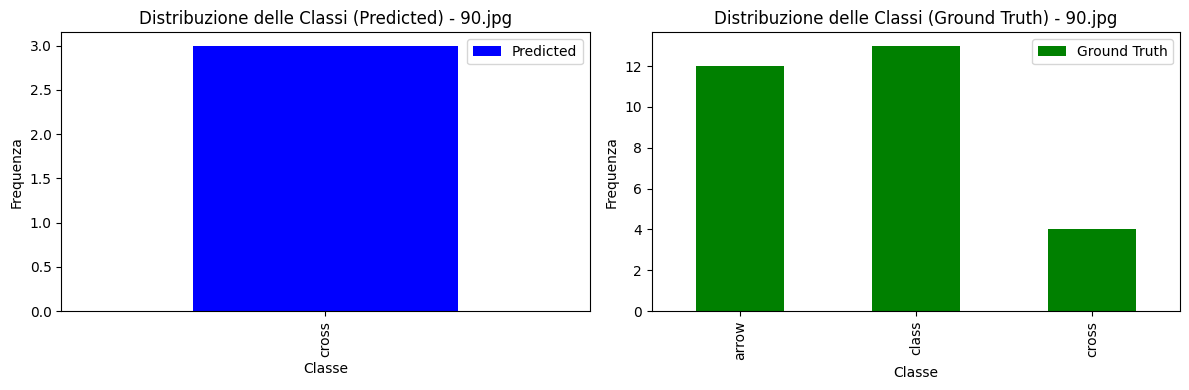

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Raggruppa per 'filename' e conta le classi per ciascun file nei dataframe
predicted_class_counts = predicted_df.groupby('filename')['class'].value_counts().unstack(fill_value=0)
ground_class_counts = ground_df.groupby('filename')['class'].value_counts().unstack(fill_value=0)

# Crea un grafico a bar per ciascun file name
for filename in predicted_class_counts.index:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Grafico per il dataframe 'predicted_df'
    predicted_class_counts.loc[filename].plot(kind='bar', ax=ax1, color='blue', label='Predicted')
    ax1.set_title(f'Distribuzione delle Classi (Predicted) - {filename}')
    ax1.set_xlabel('Classe')
    ax1.set_ylabel('Frequenza')

    # Grafico per il dataframe 'ground_df'
    ground_class_counts.loc[filename].plot(kind='bar', ax=ax2, color='green', label='Ground Truth')
    ax2.set_title(f'Distribuzione delle Classi (Ground Truth) - {filename}')
    ax2.set_xlabel('Classe')
    ax2.set_ylabel('Frequenza')

    # Mostra la legenda
    ax1.legend()
    ax2.legend()

    # Mostra il grafico per il file corrente
    plt.tight_layout()
    plt.show()


##TRAIN 2 PROVA FULL

rinomino tutte le immagini con un valore da 1 a tot. Perchè ci potrebbero essere piu nomi che danno fastidio al programma con caratteri non ascii. Salva su una mappa old_name e new_name.
**NON RI RUNNARE!**

**SCOMMENTARE SE SI UTILIZZA**

In [ ]:
'''
import os
import glob
import pandas as pd

def rename_files_with_same_base(directory_path):
    # Get a list of all files in the directory with different extensions
    files = glob.glob(os.path.join(directory_path, '*.*'))

    # Create a dictionary to store the mapping between old names and new names
    name_mapping = {}
    data = []  # List to store data for the DataFrame

    for file_path in files:
        # Get the base name without the extension
        base_name = os.path.splitext(os.path.basename(file_path))[0]

        if base_name not in name_mapping:
            # If the base name is not already in the mapping, add it with a new number
            name_mapping[base_name] = len(name_mapping) + 1

        # Store data for the DataFrame
        data.append({'Old Name': os.path.basename(file_path), 'New Name': str(name_mapping[base_name]) + os.path.splitext(file_path)[1]})

        # Rename the files using the mapping
        new_name = str(name_mapping[base_name]) + os.path.splitext(file_path)[1]
        new_path = os.path.join(directory_path, new_name)
        os.rename(file_path, new_path)

    # Create a DataFrame from the data
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file in the same directory
    csv_file_path = os.path.join(directory_path, 'name_mapping_errore.csv')
    df.to_csv(csv_file_path, index=False)

if __name__ == "__main__":
    directory_path = '/content/drive/My Drive/dataset_prova2/'
    rename_files_with_same_base(directory_path)
'''

In [ ]:
import pandas as pd

# Specifica il percorso del file CSV
csv_file_path = '/content/drive/My Drive/dataset_prova2/name_mapping.csv'

# Carica il file CSV in un DataFrame
df = pd.read_csv(csv_file_path)

# Mostra il DataFrame
print(df)


                           Old Name New Name
0      08-decorator-example-uml.png    1.png
1            Class Diagram 2_1..png    2.png
2            AbstractFactoryUML.png    3.png
3             Battleship_UML_A4.jpg    4.jpg
4      2ndIterationClassDiagram.png    5.png
..                              ...      ...
649  WorkedHoursClassDiagram.fw.png  638.png
650            VMapClassDiagram.png  639.png
651                     viewUML.png  640.png
652   Warehousing Class Diagram.jpg  641.jpg
653                  ViewDesign.png  642.png

[654 rows x 2 columns]


## Segmentation Test

In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')


Filtered predictions after nonmax suppression of overlapping bboxes, IOU > 0.5
Total number of preictions:  13 



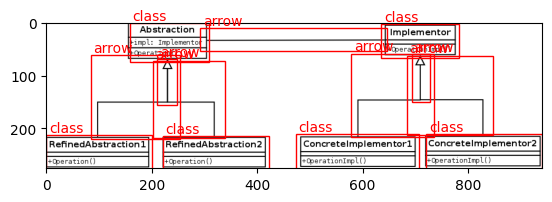



tensor([473.3984, 210.2192, 706.9916, 276.0000]) class tensor(0.9963)
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) class tensor(0.9957)
tensor([221.2946, 214.3064, 421.8392, 276.0000]) class tensor(0.9952)
tensor([720.6130, 211.1419, 941.0001, 276.0000]) class tensor(0.9920)
tensor([158.0662,   0.0000, 308.7112,  74.1440]) class tensor(0.9903)
tensor([635.6945,   1.2610, 782.1647,  66.9423]) class tensor(0.9819)
tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
'''
IDEA = dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
 Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente, mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.

 io voglio box che non si sovrappongono
'''
labels_map = { 'class': 1,
 'arrow': 2,
 'cross': 3,
 'line': 4
}
import torchvision
import torch
from pprint import pprint
#from torchmetrics.detection.map import MAP
# "ops.nms" returns the index (dec. ord of scores) of all bboxes that we
# should keep after performing the non-max suppression.
#
# Batched NMS does not supress overlapping boxes of different classes.
# Usually, best practice is to not supress boxes with different class
# Discards all overlapping boxes with IoU > iou_threshold
int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
keep = torchvision.ops.nms(boxes, scores, iou_threshold= 0.2)
filtered_boxes, filtered_scores = boxes[keep], scores[keep]
filtered_labels = [labels[idx] for idx in keep]
print("Filtered predictions after nonmax suppression of overlapping bboxes, IOU > 0.5")
print("Total number of preictions: ", len(filtered_boxes), "\n")
visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
print("\n")
for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
  print(fb, fl, fs)

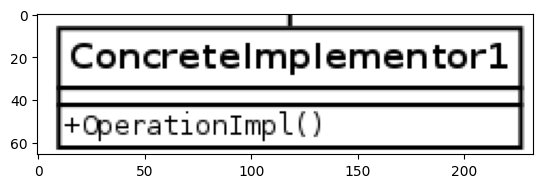

[]


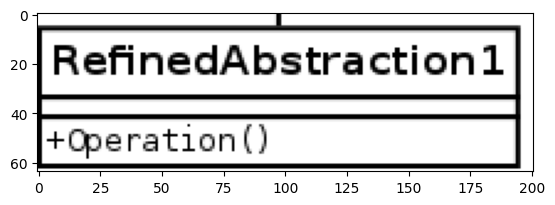

[]


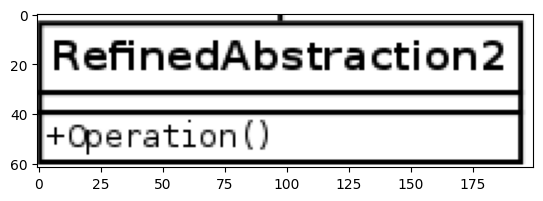

[]


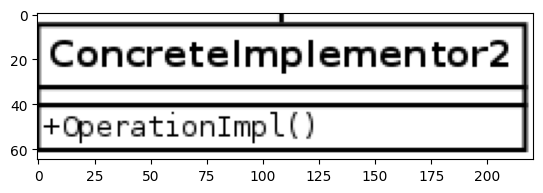

[]


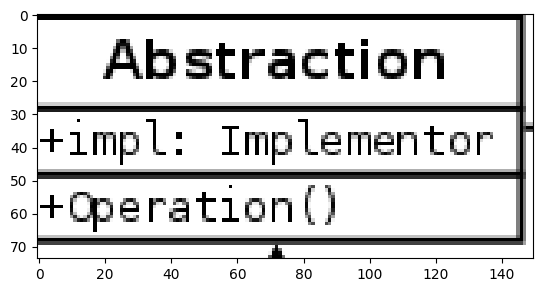

[]


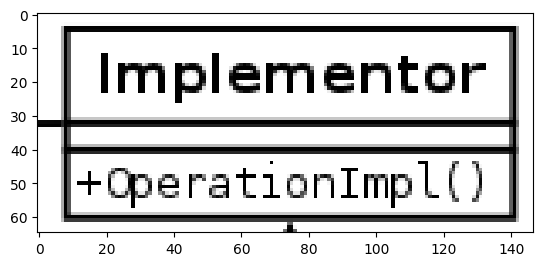

[]


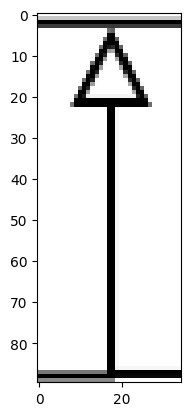

[]


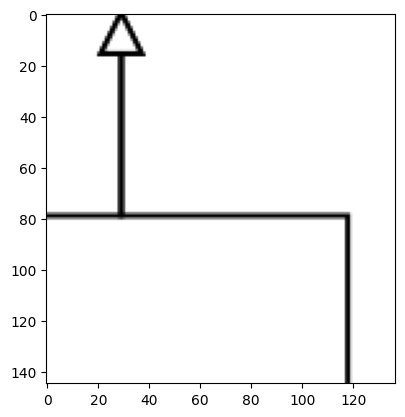

[]


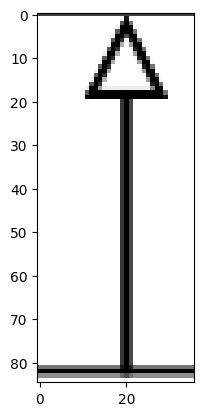

[]


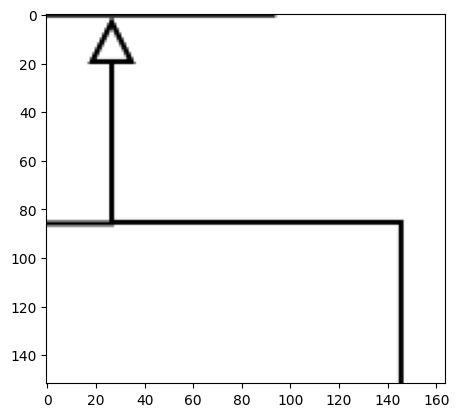

[]


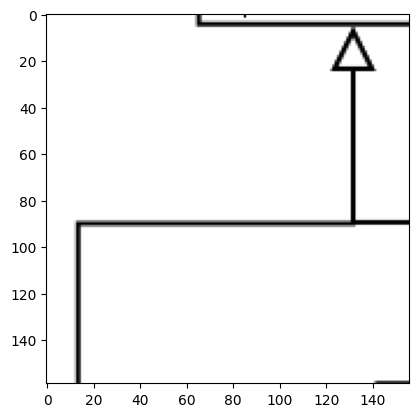

[]


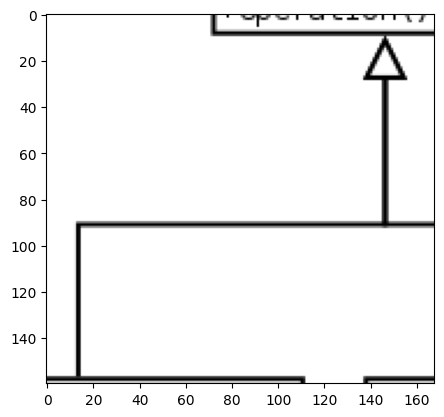

[]


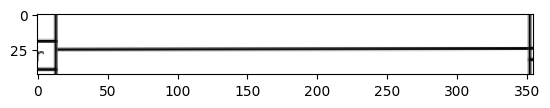

[]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import time
def segment_uml_class(image, coordinates):
  xmin, ymin, xmax, ymax = map(int, coordinates)
  img = image.copy()[ymin: ymax, xmin: xmax]
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(img_gray, 127, 255,  cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  # Structuring element dimensions (width * height).
  # We take 7 % width for our mentioned bbox co-ordinate
  # Str El. Width can vastly differentiate the number of st.lines, we detect.
  # More zigzag lines means, width should be kept low.

  temp = int(0.5 * len(img[0]))
  str_element_width = int(0.07 * len(img[0]))
  str_element_height = 1

  # Detect horizontal lines
  # MORPH_OPEN work by first eroding the image(removing the small blobs)
  # and then dilation of the image(adding small blobs)

  horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (str_element_width, str_element_height))
  detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations= 1)
  cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  # 'cnts' is a numpy.ndarray with shape N * 1 * 2
  # -> where N is the number of points
  # We need to merge the contours that is near each other in
  # vertical axis.
  # We represent the vertical threshold, as difference between 2
  45
  # contours, expressed a percentage

  vertical_threshold = .3
  count = 0
  reduced_cnts = []



  imgplot = plt.imshow(img)
  plt.show()

  print(reduced_cnts)
  return reduced_cnts

bbox_segments = {}
captured_reln = []


for fb, fl in zip(filtered_boxes, filtered_labels):
    if fl == 'class':
      # fb has data in order [xmin, ymin, xmax, ymax]
      key = (int(fb[0]), int(fb[2]))
      y_diff = int(fb[1])
      # Rescale the y-cordinates to the original image co-ordinates
      y_pts = list(map(lambda x : x + y_diff, segment_uml_class(image, fb)))
      class_segment = []
      for i in range(1, len(y_pts)):
        class_segment.append([y_pts[i-1], y_pts[i]])
        bbox_segments[key] = class_segment
    else:
      captured_reln.append(fl)

for fb, fl in zip(filtered_boxes, filtered_labels):
    if fl == 'arrow':
      # fb has data in order [xmin, ymin, xmax, ymax]
      key = (int(fb[0]), int(fb[2]))
      y_diff = int(fb[1])
      # Rescale the y-cordinates to the original image co-ordinates
      y_pts = list(map(lambda x : x + y_diff, segment_uml_class(image, fb)))
      class_segment = []
      for i in range(1, len(y_pts)):
        class_segment.append([y_pts[i-1], y_pts[i]])
        bbox_segments[key] = class_segment
    else:
      captured_reln.append(fl)



# Catch Exception for IndexError because, contours may not have length 4
# for every detected class, and classes that are falsely identified
# Plot all the class segments for each of the detected classes in image.
for k, v in bbox_segments.items():
    fig, axs = plt.subplots(1, 3)
    try:
      for i in range(len(v)):
        axs[i].imshow(image[v[i][1]: v[i][0], k[0]: k[1]])
    except IndexError:
      print("Exception occured in parsing UML class. \n \
      Reasons could be, \n \
      [wrong identification,\n \
      threshold for merging contours,\n \
      missing attributes or methods for class]\n \
      ")
      pass

# Feature Extraction

## Diagram Extraction



*   histogram
*   ratio
*  contrast
*  blur


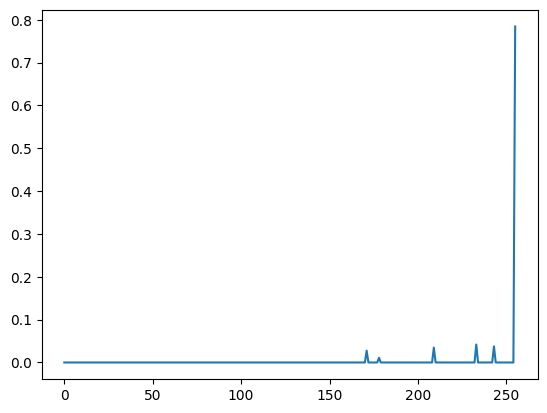

Normalized Histogram color  
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0. 

In [ ]:
import cv2
import matplotlib.pyplot as plt

class diagram_feature_extractor:
    def __init__(self, image_path):
        self.image_path = image_path

    def get_color_histogram(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola l'istogramma dei valori di intensità (grigi) nell'immagine
        histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

        # Normalizza l'istogramma dividendo per il numero totale di pixel nell'immagine
        total_pixels = img.shape[0] * img.shape[1]
        histogram_normalized = histogram / total_pixels

        # Imposta a zero i valori dell'istogramma che sono inferiori a 1e-02
        histogram_normalized[histogram_normalized < 1e-02] = 0.00

        return histogram_normalized

    def get_contrast(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola la deviazione standard dei valori dei pixel
        contrast = img.std()

        return contrast

    def get_blur(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola il Laplaciano dell'immagine
        lap = cv2.Laplacian(img, cv2.CV_64F)

        # Calcola la varianza dei valori dei pixel
        blur = lap.var()

        # Normalizza la sfocatura dividendo per il numero totale di pixel nell'immagine
        total_pixels = img.shape[0] * img.shape[1]
        blur_normalized = blur / total_pixels

        return blur_normalized


    def show_histogram(self):
        histogram = self.get_color_histogram()
        plt.plot(histogram)
        plt.show()

    def aspect_ratio(self):
        img = cv2.imread(self.image_path, 0)
        height, width = img.shape
        aspect_ratio = width/height
        return aspect_ratio

# Percorso dell'immagine
image_path = "/content/drive/My Drive/dataset_label/manual_test/509.png"

# Creazione dell'oggetto histogram__feature_extractor
diagram_feature_extractor = diagram_feature_extractor(image_path)
#chiamata al metodo
diagram_feature_extractor.show_histogram()
aspect_ratio = diagram_feature_extractor.aspect_ratio()
contrast = diagram_feature_extractor.get_contrast()
blur = diagram_feature_extractor.get_blur()
print("Normalized Histogram color  ")
print(diagram_feature_extractor.get_color_histogram())
print("F12 — Aspect ratio")
print(aspect_ratio)
print("Contrast")
print(contrast)
print("blur")
print(blur)


## Class extraction



*   class coverage
*   average class area
*   aspect ratio
*   #class
*   std_deviation class size
*   class proimy
*   Rectangle distribution



In [ ]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.

'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint

class class_feature_extractor:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'class'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      print("Filtered predictions after thresholding, keeping only the 'class' class.")
      print("Total number of predictions: ", len(boxes), "\n")
      visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}
      print("Number of elements per class:")
      print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
      print("\n")
      for category, pred, confidence in zip(labels, boxes, scores):
        print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      print("Total number of preictions: ", len(filtered_boxes), "\n")
      visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        print(fb, fl, fs)

      return filtered_boxes,filtered_labels



    def segment_uml_class(self, coordinates):
        xmin, ymin, xmax, ymax = map(int, coordinates)
        img = self.image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        return area

    #compute and create a list with all class areas
    def compute_areas(self):
        i = 0
        list_areas=[]
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
            if fl == 'class':
                i += 1
                list_areas.append(self.segment_uml_class(fb))
            else:
                captured_reln.append(fl)

        return list_areas

    #ratio between class Area and total imae Area
    def calculate_coverage(self):
        areaTot = 0
        i = 0
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        list_areas = self.compute_areas()
        for area in list_areas:
          areaTot += area

        coverageArea = areaTot / areaImage
        result = round(coverageArea, 3)
        return result
    import math

    def calculate_std_deviation(self):
        list_areas = self.compute_areas()
        n = len(list_areas)
        mean = sum(list_areas) / n
        variance = sum((x - mean) ** 2 for x in list_areas) / n
        std_deviation = math.sqrt(variance)
        percentage_std_deviation = (std_deviation / mean) * 100
        percentage_std_deviation = round(percentage_std_deviation,3)
        return percentage_std_deviation

    def calculate_n_class(self):
      list_areas = self.compute_areas()
      return len(list_areas)

    #voglio normalizzare il valore della media delle aree rispetto alla grandezza dell'immagine
    def calculate_avg_area(self):
        list_areas = self.compute_areas()
        mean_area = mean(list_areas)  # Rinomina la variabile 'mean' in 'mean_area'
        height, width, channels = self.image.shape
        areaImage = height * width
        normalized_area = mean_area / areaImage
        normalized_area = round(normalized_area,3)
        return normalized_area

    def calculate_aspect_ratio(self):
      height, width, channels = self.image.shape
      aspect_ratio = width/height
      aspect_ratio = round(aspect_ratio,2)
      return aspect_ratio



    def show_class(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'class':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            height, width, channels = img.shape
            area = height * width
            imgplot = plt.imshow(img)
            plt.show()

    def capture_coordinates(self):
      captured_reln = []
      captured_coordinates = []  # Lista per salvare le tuple ottenute

      for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
          if fl == 'class':
              xmin, ymin, xmax, ymax = map(int, fb)
              captured_coordinates.append((xmin, ymin, xmax, ymax))  # Aggiungi la tupla alla lista
          else:
              captured_reln.append(fl)
      return captured_coordinates


    def compute_center_dist(self , rect1, rect2):
      # Calcola il centro del primo rettangolo
      x1 = (rect1[0] + rect1[2]) / 2
      y1 = (rect1[1] + rect1[3]) / 2

      # Calcola il centro del secondo rettangolo
      x2 = (rect2[0] + rect2[2]) / 2
      y2 = (rect2[1] + rect2[3]) / 2

      # Calcola la distanza euclidea tra i centri dei rettangoli
      dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

      return dist

    def calculate_proximity(self):
        captured_coordinates = self.capture_coordinates()
        total_dist = 0
        n_rect = len(captured_coordinates)
        # itera su tutte le possibili coppie uniche di rettangoli presenti nella lista captured_coordinates
        # calcolare ogni distanza tra i centri dei rettangoli solo una volta
        for i in range(n_rect):
            for j in range(i + 1, n_rect):
                dist = self.compute_center_dist(captured_coordinates[i], captured_coordinates[j])
                total_dist += dist

        if n_rect > 1:
            # consideriamo le combinazioni
            # rappresenta il numero di modi in cui possiamo scegliere 2 rettangoli da numero_rettangoli senza ripetizioni e senza considerare l'ordine
            proximity = total_dist / (n_rect * (n_rect - 1) / 2)
        else:
            proximity = 0
        proximity = round(proximity,3)
        return proximity



    def calculate_rectangle_area(self , xmin, ymin, xmax, ymax):
      return (xmax - xmin) * (ymax - ymin)

    #compute the area covered by all rect in a specific quadrant
    def calculate_section_area(self , quadrant, rectangles):
      x_min_section, y_min_section, x_max_section, y_max_section = quadrant
      quadrant_area = self.calculate_rectangle_area(x_min_section, y_min_section, x_max_section, y_max_section)
      section_area = 0
      for rectangle in rectangles:
          x_min, y_min, x_max, y_max = rectangle

          # Calculate the intersection area between the rectangle and the section
          x_intersection_min = max(x_min, x_min_section)
          y_intersection_min = max(y_min, y_min_section)
          x_intersection_max = min(x_max, x_max_section)
          y_intersection_max = min(y_max, y_max_section)

          # Check if there is an intersection between the rectangle and the section
          if x_intersection_min < x_intersection_max and y_intersection_min < y_intersection_max:
              section_area += self.calculate_rectangle_area(x_intersection_min, y_intersection_min, x_intersection_max, y_intersection_max)

      coverage_percent = (section_area / quadrant_area) * 100
      coverage_percent = round(coverage_percent,3)
      return coverage_percent

    #all rect and all quadrants are taken into account , then is computed the variance
    def calculate_class_distribution(self):
        image_height, image_width, channels = self.image.shape
        rectangles = self.capture_coordinates()
        # Calculate the coordinates of the four quadrants
        center_x = image_width // 2
        center_y = image_height // 2

        quadrants = [
            (0, 0, center_x, center_y),
            (center_x, 0, image_width, center_y),
            (0, center_y, center_x, image_height),
            (center_x, center_y, image_width, image_height)
        ]

        # Calculate the total area of the image
        total_image_area = self.calculate_rectangle_area(0, 0, image_width, image_height)

        # Calculate the area covered by rectangles for each quadrant
        covered_areas = [self.calculate_section_area(quadrant, rectangles) for quadrant in quadrants]

        # Calculate the variance of the covered areas
        variance = np.var(covered_areas)
        variance = round(variance,3)
        #mean = np.mean(covered_areas)
        #normalized_variance = variance / mean
        #print(mean)
        #print(covered_areas)
        #variance = round(variance , 3)
        #print(variance)

        return variance


Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  6 



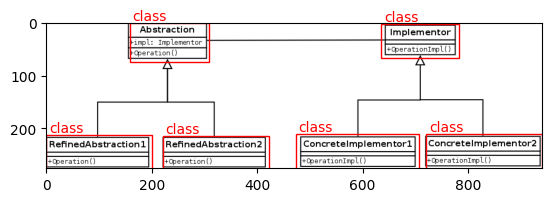



Number of elements per class:
class: 6


tensor([473.3984, 210.2192, 706.9916, 276.0000]) tensor(0.9963) class
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) tensor(0.9957) class
tensor([221.2946, 214.3064, 421.8392, 276.0000]) tensor(0.9952) class
tensor([720.6130, 211.1419, 941.0001, 276.0000]) tensor(0.9920) class
tensor([158.0662,   0.0000, 308.7112,  74.1440]) tensor(0.9903) class
tensor([635.6945,   1.2610, 782.1647,  66.9423]) tensor(0.9819) class
Total number of preictions:  6 



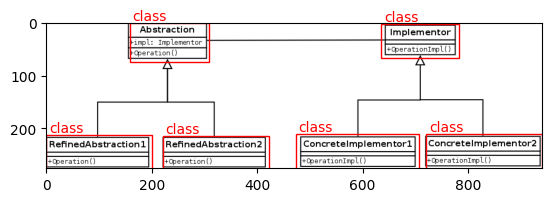



tensor([473.3984, 210.2192, 706.9916, 276.0000]) class tensor(0.9963)
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) class tensor(0.9957)
tensor([221.2946, 214.3064, 421.8392, 276.0000]) class tensor(0.9952)
tensor([720.6130, 211.1419, 941.0001, 276.0000]) class tensor(0.9920)
tensor([158.0662,   0.0000, 308.7112,  74.1440]) class tensor(0.9903)
tensor([635.6945,   1.2610, 782.1647,  66.9423]) class tensor(0.9819)
F11 — Rectangle coverage normalized 
0.291
F12 — Aspect ratio
3.41
F16 — Rectangle size variation normalized
15.344
F17 — Number of class. 
6
F15 — Rectangle size normalized
0.049
F14 — Rectangle proximity
401.216
F13 — Rectangle distribution
181.409


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/02_uml.png')
#image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/MenuDesign.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'class'
class_extractor = class_feature_extractor(image,acc_threshold,iou_threshold,desired_class)



# Stampa del risultato
print("F11 — Rectangle coverage normalized ")
print(class_extractor.calculate_coverage())
print("F12 — Aspect ratio")
print(class_extractor.calculate_aspect_ratio())
print("F16 — Rectangle size variation normalized")
print(class_extractor.calculate_std_deviation())
print("F17 — Number of class. ")
print(class_extractor.calculate_n_class())
print("F15 — Rectangle size normalized")
print(class_extractor.calculate_avg_area())
print("F14 — Rectangle proximity")
print(class_extractor.calculate_proximity())
print("F13 — Rectangle distribution")
print(class_extractor.calculate_class_distribution())



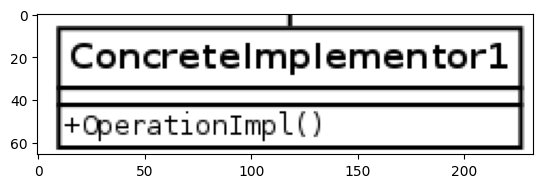

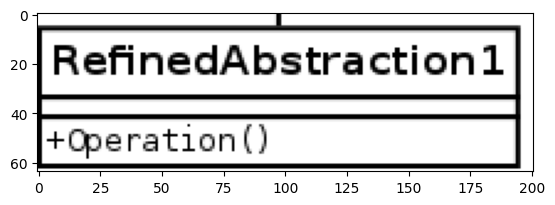

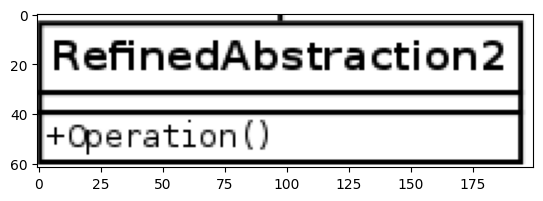

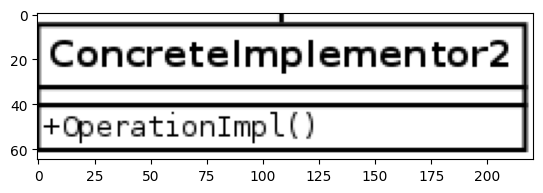

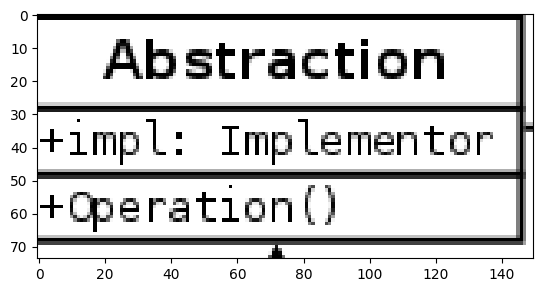

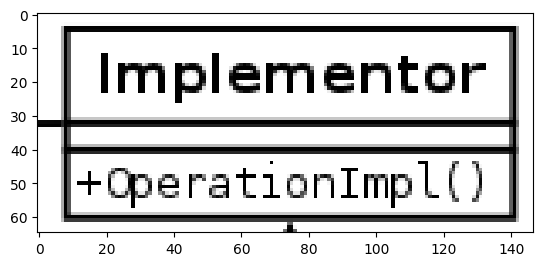

In [ ]:
class_extractor.show_class()

##Text Extraction

Idee :
1. aggiungere un correttore automatico alle parole estratte
2. usare word2vec per la similarità
3. capire se si puo allenare un embedding

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker
import easyocr
import math
import re
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.8 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.stem import PorterStemmer

# Scarica le risorse necessarie per lo stemming
nltk.download('punkt')

!pip install gensim
from gensim.models import KeyedVectors
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
#il modello usato è wiki-news-300d-1M.vec:
#Addestrato principalmente su testi di Wikipedia, che tendono ad essere più tecnici e informativi.
#Può essere una scelta migliore se sei interessato principalmente a testi tecnici e linguaggio specialistico.
# https://fasttext.cc/docs/en/english-vectors.html
# Carica il modello pre-addestrato fastText
model_w2v = KeyedVectors.load_word2vec_format('/content/drive/My Drive/model_w2vec/wiki-news-300d-1M.vec', binary=False, limit=500000)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:


class class_feature_extractor:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'class'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      print("Filtered predictions after thresholding, keeping only the 'class' class.")
      print("Total number of predictions: ", len(boxes), "\n")
      visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}
      print("Number of elements per class:")
      print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
      print("\n")
      for category, pred, confidence in zip(labels, boxes, scores):
        print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      print("Total number of preictions: ", len(filtered_boxes), "\n")
      visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        print(fb, fl, fs)

      return filtered_boxes,filtered_labels



    def segment_uml_class(self, coordinates):
        xmin, ymin, xmax, ymax = map(int, coordinates)
        img = self.image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        return area






    def show_class(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'class':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            height, width, channels = img.shape
            area = height * width
            imgplot = plt.imshow(img)
            plt.show()

    #filter brackets & speial character
    def cleanup_text(self, text):
        list_word = []
        list_word2 = []
        # Join the words in the text list and then remove non-ASCII characters
        cleaned_text = " ".join([re.sub(r'[^a-zA-Z]', '', word[1]) for word in text if word[1].isascii()])
        list_word = cleaned_text.split()
        for word in list_word:
          list_word2.append(re.findall('[A-Z][^A-Z]*', word))
        list_word3 = []
        for lista in list_word2:
          list_word3.extend(lista)
        return list_word3

    #due to miss reading of model , we adjust result based on auto correction library
    #eliminates words not in the vocabulary
    def correct_word(self , word_list):
      spell = SpellChecker()
      misspelled = [word.lower() for word in spell.unknown(word_list)]

      # Lista di parole corrette (convertite in lowercase)
      corrected_words = [spell.correction(word) for word in misspelled]

      # Lista di parole contenute in word_list ma non corrette
      words_not_in_misspelled = [word for word in word_list if word.lower() not in misspelled]

      # Rimuovi eventuali valori None da corrected_words
      corrected_words = [word for word in corrected_words if word is not None]

      # Rimuovi eventuali valori None da words_not_in_misspelled
      words_not_in_misspelled = [word for word in words_not_in_misspelled if word is not None]

      # Lista finale con parole corrette e parole non corrette
      lista_unione = corrected_words + words_not_in_misspelled

      '''
      print("misspelled")
      print(misspelled)
      print("corrected_words")
      print(corrected_words)
      print("words_not_in_misspelled")
      print(words_not_in_misspelled)
      print("lista_unione")
      print(lista_unione)
      '''
      return lista_unione


    def stemming(self , word_list):
      stemmer = PorterStemmer()
      stemmed_words = [stemmer.stem(word) for word in word_list]
      return stemmed_words





    def compute_text_extractor(self ):
        list_image = []
        list_text_image = []
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'class':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            height, width, channels = img.shape
            area = height * width
            imgplot = plt.imshow(img)
            plt.show()
            list_image.append(img)
        for image in list_image:
          text = []
          raw_text = reader.readtext(image)
          cleaned_text = self.cleanup_text(raw_text)
          corrected_text = self.correct_word(cleaned_text)
          stemmed_text = self.stemming(corrected_text)
          list_text_image.append(corrected_text)
        #print(list_text_image)
        return list_text_image

    #è stato usato word2vec in modo da catturare il significato semantico grazie alla quale è stata calcolata la distanza media tra le parole nello schema
    def compute_distance(self):
      list_word_per_image = self.compute_text_extractor()
      # Calcola la distanza semantica media per ogni lista di parole
      distances_per_list = []
      for word_list in list_word_per_image:
          vector_list = [model_w2v[word] for word in word_list if word in model_w2v]
          if vector_list:
              # Calcola la similarità coseno tra i vettori delle parole
              similarity_matrix = cosine_similarity(vector_list)
              # La distanza semantica media è l'opposto della similarità coseno
              avg_distance = 1 - np.mean(similarity_matrix)
              distances_per_list.append(round(avg_distance,3))

      # Calcola la distanza semantica media per l'intera lista di liste di parole
      avg_distance_overall = np.mean(distances_per_list)
      avg_distance_overall = round(avg_distance_overall,3);
      return avg_distance_overall

    #per la visuaizzazzione è stata fatta la distanza euclidea , ma nel codice usiamo la distanza con il coseno
    def visualize_distance(self):
        list_word_per_image = self.compute_text_extractor()
        # Estrai tutte le parole univoche dalla lista di liste
        words_to_visualize = list(set(word for sublist in list_word_per_image for word in sublist))

        # Estrai i vettori delle parole
        word_vectors = np.array([model_w2v[word] for word in words_to_visualize if word in model_w2v])

        # Riduci la dimensionalità con t-SNE e imposta una perplexity più bassa
        tsne = TSNE(n_components=2, perplexity=5, random_state=42)
        word_vectors_2d = tsne.fit_transform(word_vectors)

        # Crea un grafico 2D
        plt.figure(figsize=(10, 10))

        # Visualizza i puntini per ciascuna parola
        for i in range(len(words_to_visualize)):
            x, y = word_vectors_2d[i]
            word = words_to_visualize[i]
            plt.scatter(x, y, label=word)

        # Etichette delle parole
        for i in range(len(words_to_visualize)):
            x, y = word_vectors_2d[i]
            word = words_to_visualize[i]
            plt.annotate(word, (x, y), fontsize=12)

        # Calcola e visualizza la distanza tra le parole nella lista
        for i in range(len(words_to_visualize)):
            for j in range(i + 1, len(words_to_visualize)):
                word1 = words_to_visualize[i]
                word2 = words_to_visualize[j]
                x1, y1 = word_vectors_2d[i]
                x2, y2 = word_vectors_2d[j]
                distance = np.linalg.norm([x1 - x2, y1 - y2])  # Distanza euclidea tra i punti
                plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'Dist: {distance:.2f}', fontsize=10)

                # Disegna una linea tra le parole
                plt.plot([x1, x2], [y1, y2], color='gray', linestyle='--')

        plt.legend(loc='upper right')
        plt.title("Visualizzazione 2D delle Parole Word2Vec con Distanza")
        plt.show()




Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  6 



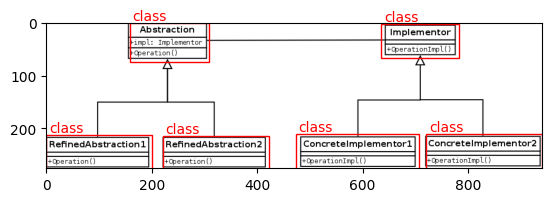



Number of elements per class:
class: 6


tensor([473.3984, 210.2192, 706.9916, 276.0000]) tensor(0.9963) class
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) tensor(0.9957) class
tensor([221.2946, 214.3064, 421.8392, 276.0000]) tensor(0.9952) class
tensor([720.6130, 211.1419, 941.0001, 276.0000]) tensor(0.9920) class
tensor([158.0662,   0.0000, 308.7112,  74.1440]) tensor(0.9903) class
tensor([635.6945,   1.2610, 782.1647,  66.9423]) tensor(0.9819) class
Total number of preictions:  6 



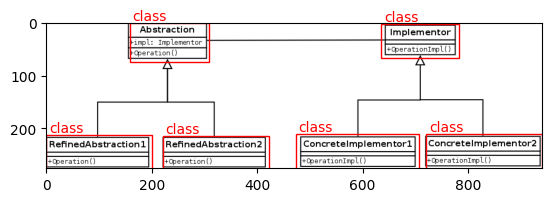



tensor([473.3984, 210.2192, 706.9916, 276.0000]) class tensor(0.9963)
tensor([  0.0000, 212.9323, 201.1969, 276.0000]) class tensor(0.9957)
tensor([221.2946, 214.3064, 421.8392, 276.0000]) class tensor(0.9952)
tensor([720.6130, 211.1419, 941.0001, 276.0000]) class tensor(0.9920)
tensor([158.0662,   0.0000, 308.7112,  74.1440]) class tensor(0.9903)
tensor([635.6945,   1.2610, 782.1647,  66.9423]) class tensor(0.9819)


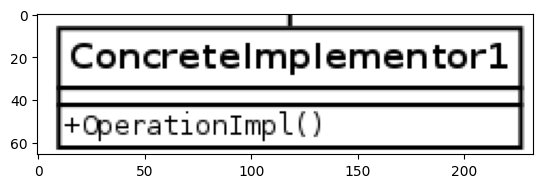

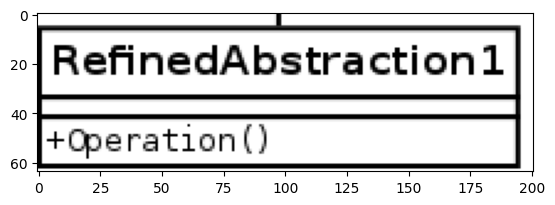

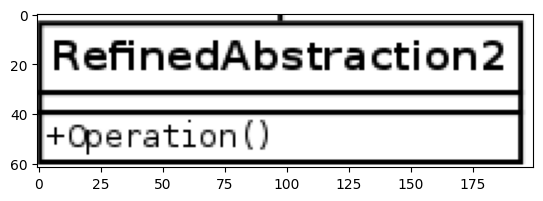

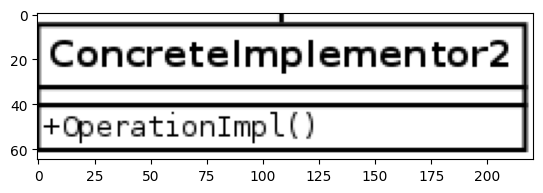

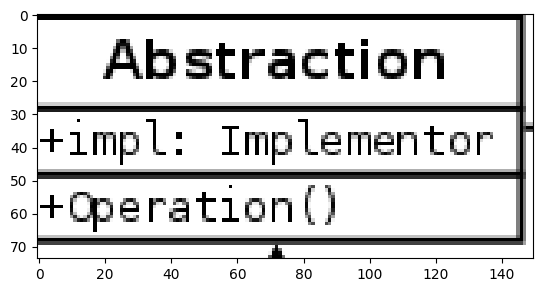

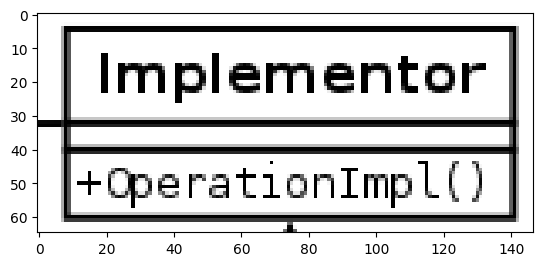

[['imply', 'operation'], ['abstraction', 'operation', 'Refined'], ['operation', 'Refined', 'Abstraction'], ['imply', 'operation'], ['operation', 'implement', 'Abstraction'], ['implement', 'operation', 'Imp']]


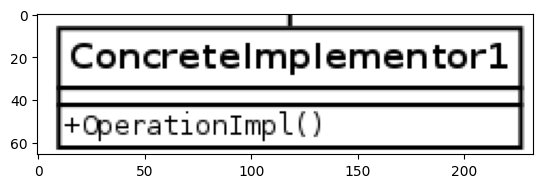

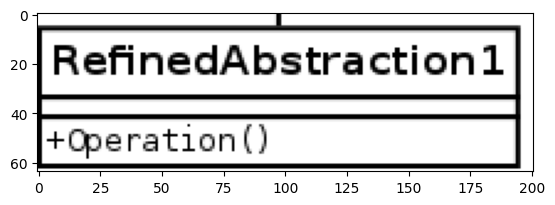

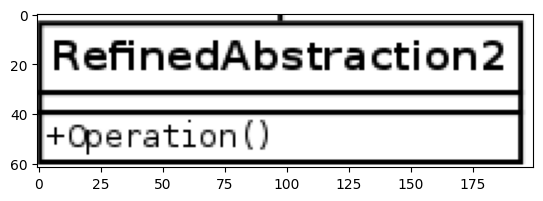

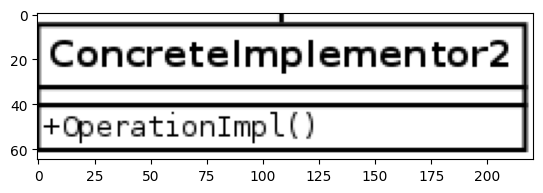

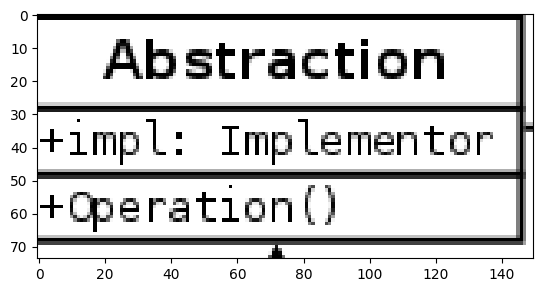

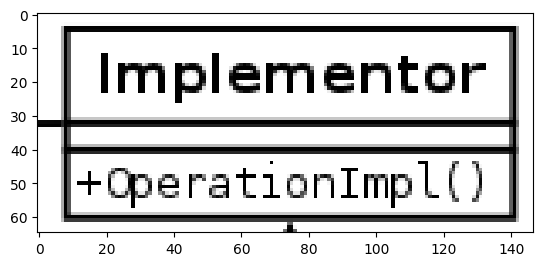

0.463


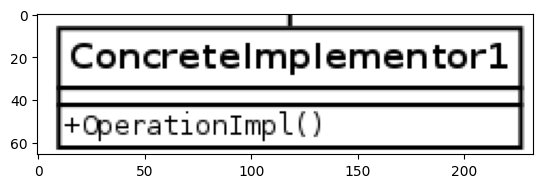

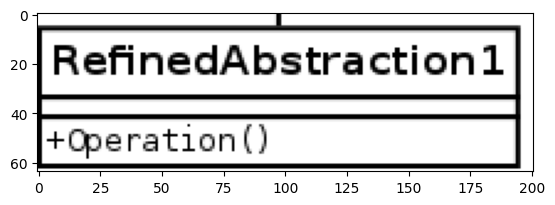

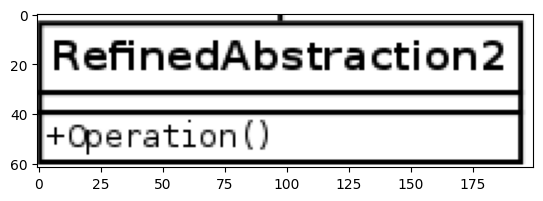

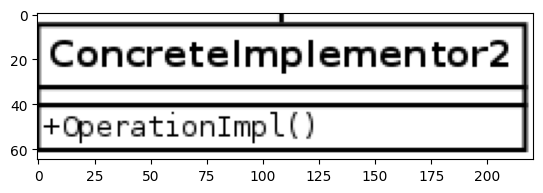

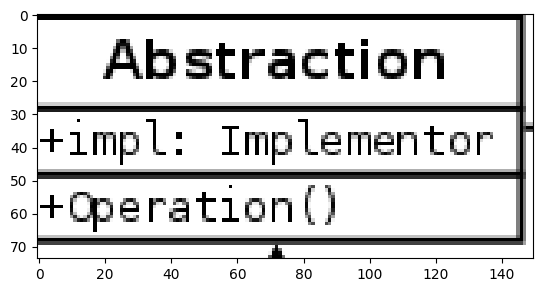

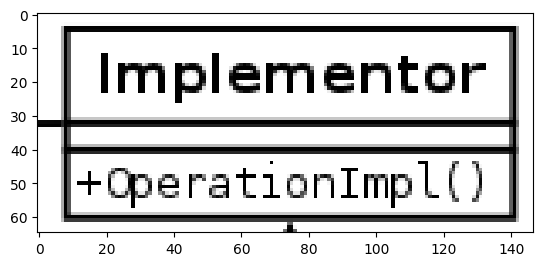

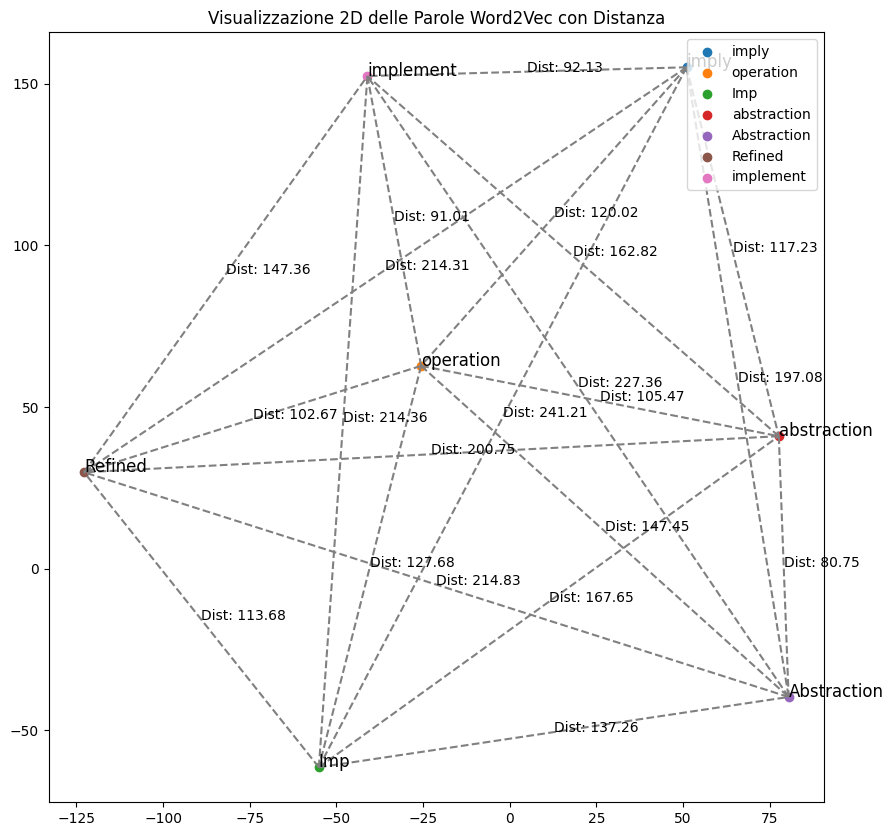

In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'class'
class_extractor = class_feature_extractor(image,acc_threshold,iou_threshold,desired_class)

list_word_per_image = class_extractor.compute_text_extractor()
print(list_word_per_image)

print(class_extractor.compute_distance())
class_extractor.visualize_distance()

## Cross Line

In [ ]:
import numpy as np
import torchvision
import torch
from pprint import pprint
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt


class class_cross_extraction:
  def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
    self.image = image
    self.acc_threshold = acc_threshold
    self.iou_threshold = iou_threshold
    self.desired_class = desired_class
    self.filtered_boxes,self.filtered_labels = self.compute_cross_filter()

  #step1
  def compute_cross_accuracy(self):
    print("Image Shape: ", image.shape)
    predictions = model.predict(image)
    labels, boxes, scores = predictions

    # Filter the predictions to keep only the "cross" class
    desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

    labels = [labels[idx] for idx in desired_idx]
    boxes, scores = boxes[desired_idx], scores[desired_idx]

    print("Filtered predictions after thresholding, keeping only the 'cross' class.")
    print("Total number of predictions: ", len(boxes), "\n")
    visualize.show_labeled_image(image, boxes, labels)
    print("\n")

    # Count the elements for the "cross" class
    elements_per_class = {self.desired_class: len(boxes)}
    print("Number of elements per class:")
    print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
    print("\n")
    for category, pred, confidence in zip(labels, boxes, scores):
      print(pred, confidence, category)
    return labels, boxes, scores

  #step2
  def compute_cross_filter(self):
    labels_map = { 'class': 1,
    'arrow': 2,
    'cross': 3,
    'line': 4
    }
    labels, boxes, scores = self.compute_cross_accuracy()
    int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype=torch.int)
    keep = torchvision.ops.nms(boxes, scores, iou_threshold)
    filtered_boxes, filtered_scores = boxes[keep], scores[keep]
    filtered_labels = [labels[idx] for idx in keep]

    print("Total number of predictions: ", len(filtered_boxes), "\n")
    visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
    print("\n")

    if len(filtered_boxes) > 0:
        largest_box_idx = torch.argmax((filtered_boxes[:, 2] - filtered_boxes[:, 0]) * (filtered_boxes[:, 3] - filtered_boxes[:, 1]))
        filtered_boxes = filtered_boxes[largest_box_idx].unsqueeze(0)
        filtered_labels = [filtered_labels[largest_box_idx]]
        filtered_scores = [filtered_scores[largest_box_idx]]
        print("After keeping only the largest bounding box:")
        print("Largest bounding box: ", filtered_boxes[0], filtered_labels[0], filtered_scores[0])
    else:
        print("No boxes found.")
        filtered_boxes = torch.empty((0, 4))
        filtered_labels = []
        filtered_scores = []

    # Show the largest bounding box
    visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
    return filtered_boxes,filtered_labels


  #step 3
  def show_cross(self):
    filtered_boxes,filtered_labels = self.compute_cross_filter()
    for fb, fl in zip(filtered_boxes,filtered_labels):
      if fl == 'cross':
        xmin, ymin, xmax, ymax = map(int, fb)
        img = image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        imgplot = plt.imshow(img)
        plt.show()


  def compute_n_cross(self):
    #filtered_boxes,filtered_labels = self.compute_cross_filter()
    count = 0
    for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
      if fl == 'cross':
        count = count +1
    return count



  #avg absolut angles of crossing angles among the entire scheme image
  def compute_crossing_angles(self):
      list_images = []
      list_slopes = []
      filtered_boxes, filtered_labels = self.compute_cross_filter()
      for fb, fl in zip(filtered_boxes, filtered_labels):
          if fl == 'cross':
              xmin, ymin, xmax, ymax = map(int, fb)
              img = self.image.copy()[ymin: ymax, xmin: xmax]
              list_images.append(img)
              height, width, channels = img.shape
              area = height * width

      for cross_img in list_images:
          height, width, channel = cross_img.shape
          img = cv2.cvtColor(cross_img, cv2.COLOR_BGR2GRAY)
          out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
          # applico il filtro gaussiano per il noise
          img = 255 - cv2.medianBlur(img, 3)

          theta_resolution_degrees = 1
          theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
          min_size = min(height, width)
          threshold = math.floor(0.2 * min_size)
          lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 10, minLineLength=threshold, maxLineGap=1)
          count = 0
          for line in lines:
              for x1, y1, x2, y2 in line:
                  cv2.line(out, (x1, y1), (x2, y2), (0, 0, 255), 2)
                  slope_rad = np.arctan2(y2 - y1, x2 - x1)
                  slope_deg = np.degrees(slope_rad)
                  list_slopes.append(abs(slope_deg))
              count += 1


          print("Number of lines in current image:", count)
          print("Slopes for current image (in degrees):", list_slopes)
          plt.imshow(out)
          plt.axis('off')
          plt.show()


      if list_slopes:  # Check if the list is not empty before computing the mean
          average = mean(list_slopes)
          average = round(average, 3)
          return average
      else:
          print("No crossing angles found.")
          return 0  # Return a default value or handle it as needed






Image Shape:  (913, 1051, 3)
Filtered predictions after thresholding, keeping only the 'cross' class.
Total number of predictions:  3 



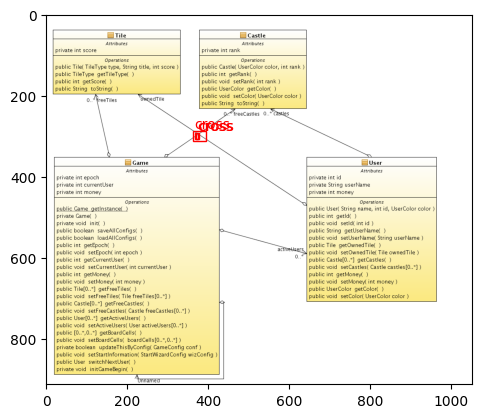



Number of elements per class:
cross: 3


tensor([367.0215, 291.2862, 373.8803, 305.8543]) tensor(0.1368) cross
tensor([361.4274, 286.0225, 393.6838, 312.6539]) tensor(0.1226) cross
tensor([370.7823, 291.5108, 378.2072, 306.6817]) tensor(0.1204) cross
Total number of predictions:  3 



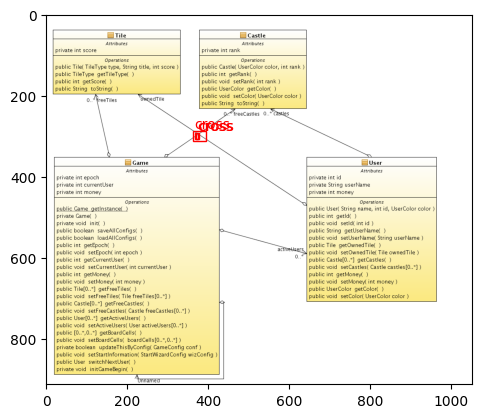



After keeping only the largest bounding box:
Largest bounding box:  tensor([361.4274, 286.0225, 393.6838, 312.6539]) cross tensor(0.1226)


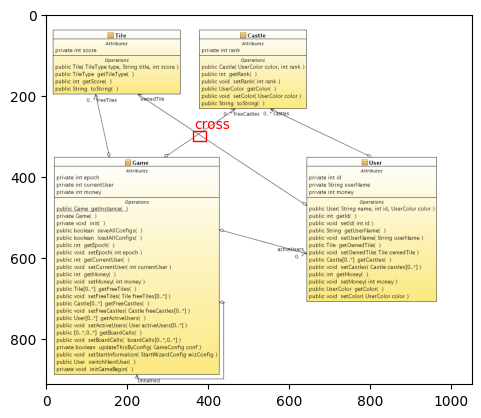

F1 — Line crossings
F2 — Crossing angles
Image Shape:  (913, 1051, 3)
Filtered predictions after thresholding, keeping only the 'cross' class.
Total number of predictions:  3 



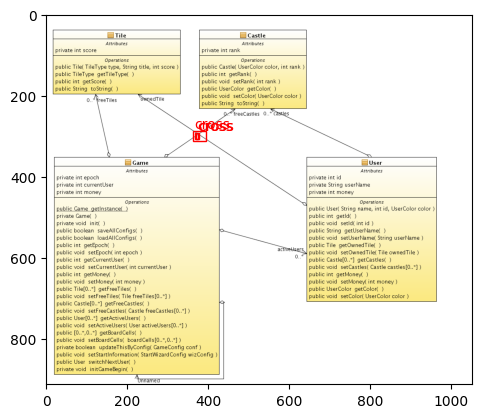



Number of elements per class:
cross: 3


tensor([367.0215, 291.2862, 373.8803, 305.8543]) tensor(0.1368) cross
tensor([361.4274, 286.0225, 393.6838, 312.6539]) tensor(0.1226) cross
tensor([370.7823, 291.5108, 378.2072, 306.6817]) tensor(0.1204) cross
Total number of predictions:  3 



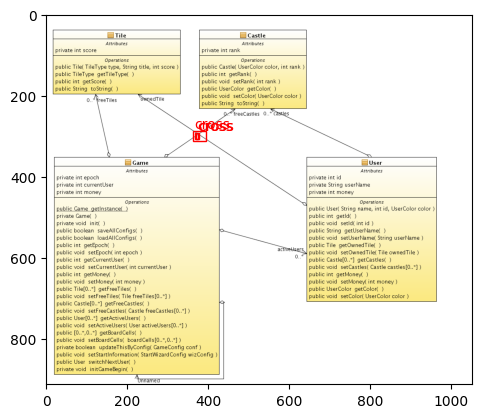



After keeping only the largest bounding box:
Largest bounding box:  tensor([361.4274, 286.0225, 393.6838, 312.6539]) cross tensor(0.1226)


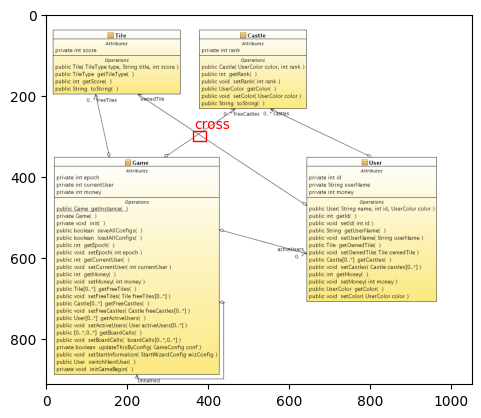

Number of lines in current image: 6
Slopes for current image (in degrees): [34.99202019855866, 33.231711067979354, 34.11447294534126, 34.69515353123397, 35.53767779197438, 35.53767779197438]


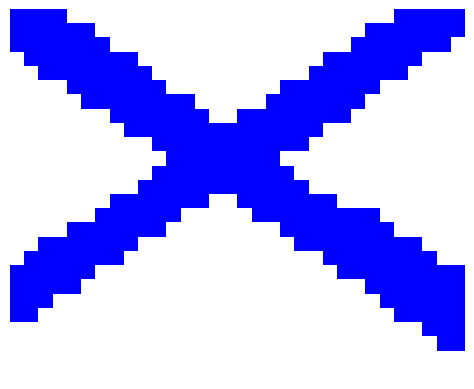

34.685


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/ItemsDiagram.png') #lo trova
#image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/MenuDesign.png') #-> non lo trova

#STEP BY STEP COMPUTATION
acc_threshold = 0.12
iou_threshold=0.3
desired_class = 'cross'
cross_extraction = class_cross_extraction(image,acc_threshold,iou_threshold,desired_class)
#cross_extraction.compute_cross_accuracy()
#cross_extraction.compute_cross_filter()
#cross_extraction.compute_crossing_angles()
#MEASURE
print("F1 — Line crossings")
cross_extraction.compute_n_cross()
print("F2 — Crossing angles")
print(cross_extraction.compute_crossing_angles())



Image Shape:  (913, 1051, 3)
Filtered predictions after thresholding, keeping only the 'cross' class.
Total number of predictions:  4 



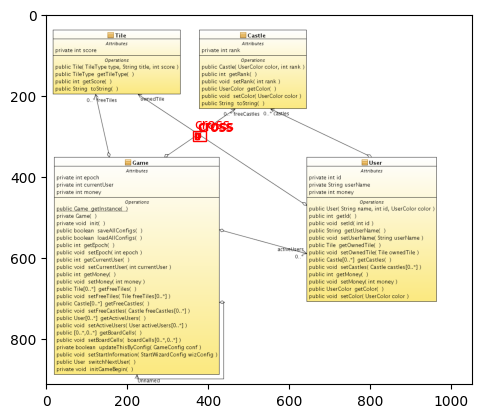



Number of elements per class:
cross: 4


tensor([367.0215, 291.2862, 373.8803, 305.8543]) tensor(0.1368) cross
tensor([361.4274, 286.0225, 393.6838, 312.6539]) tensor(0.1226) cross
tensor([370.7823, 291.5108, 378.2072, 306.6817]) tensor(0.1204) cross
tensor([367.5239, 291.9123, 380.6264, 302.2781]) tensor(0.1166) cross
Total number of predictions:  3 



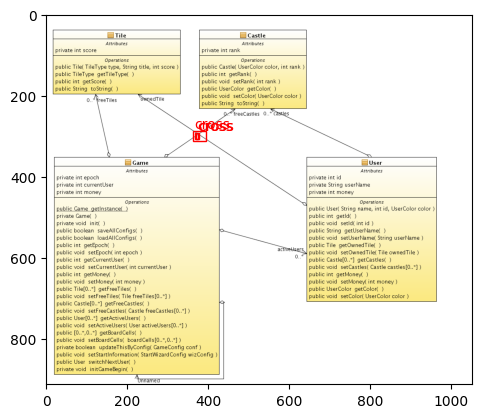



After keeping only the largest bounding box:
Largest bounding box:  tensor([361.4274, 286.0225, 393.6838, 312.6539]) cross tensor(0.1226)


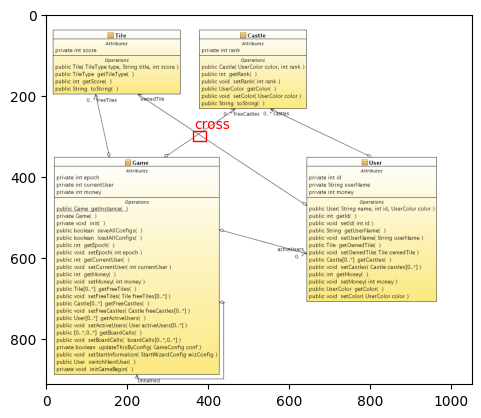

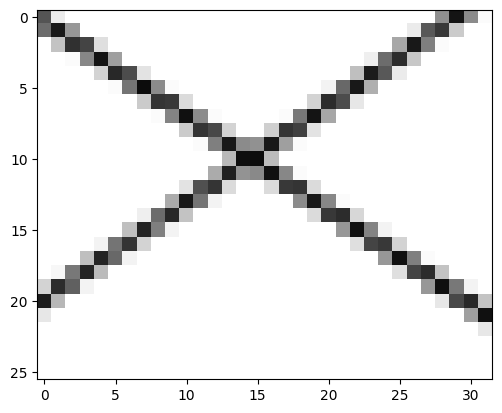

In [ ]:
cross_extraction.show_cross()

## Arrow Feature Naive

In [ ]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.
'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean


from scipy.spatial import distance

class arrow_feature_extractor_naive:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'arrow'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
        self.list_lenght = self.find_lenght()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      print("Filtered predictions after thresholding, keeping only the 'class' class.")
      print("Total number of predictions: ", len(boxes), "\n")
      visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}
      print("Number of elements per class:")
      print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
      print("\n")
      for category, pred, confidence in zip(labels, boxes, scores):
        print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      print("Total number of preictions: ", len(filtered_boxes), "\n")
      visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        print(fb, fl, fs)

      return filtered_boxes,filtered_labels



    def segment_uml_class(self, coordinates):
        xmin, ymin, xmax, ymax = map(int, coordinates)
        img = self.image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        return area


    def show_arrow(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            imgplot = plt.imshow(img)
            plt.show()


    def get_arrow(self ):
        images_to_return = []  # Lista per salvare le immagini elaborate
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            images_to_return.append(img)  # Aggiungi l'immagine elaborata alla lista
        return images_to_return

    def compute_n_arrow(self):
        count=0
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            count+=1
        return count


    def enhance_lines_between_points(self , img, far_point_1, far_point_2):
        # Converti l'immagine in scala di grigi
        if len(img.shape) > 2:
            gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        else:
            gray_img = img.copy()

        # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
        equalized_img = cv2.equalizeHist(gray_img)

        # Trova i bordi delle linee utilizzando l'algoritmo di Canny
        edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

        # Crea un'immagine vuota con lo stesso formato dell'immagine originale
        highlighted_img = np.copy(img)

        # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
        line_color = (0, 255, 0)

        # Evidenzia solo i bordi trovati sulle linee nell'area definita da far_point_1 e far_point_2
        mask = np.zeros_like(edges)
        mask[min(far_point_1[0], far_point_2[0]): max(far_point_1[0], far_point_2[0]),
            min(far_point_1[1], far_point_2[1]): max(far_point_1[1], far_point_2[1])] = 255

        # Converti l'immagine in scala di grigi in un'immagine a colori
        highlighted_img = cv2.merge([highlighted_img, highlighted_img, highlighted_img])

        # Assegna il colore alle linee nell'area definita da far_point_1 e far_point_2
        highlighted_img[np.logical_and(edges != 0, mask != 0)] = line_color

        return highlighted_img

    def find_lenght(self):
      images = self.get_arrow()
      list_lenght = []
      for img in images:
          # Convert the image to grayscale if it's not already
          if len(img.shape) > 2:
              img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
          labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

          max_arrow_length = 0
          max_arrow_thickness = 0
          max_arrow_angle = 0
          max_arrow_points = None

          for label in np.unique(labels)[1:]:
              arrow = labels == label
              indices = np.transpose(np.nonzero(arrow))  # y, x

              dist = distance.cdist(indices, indices, 'euclidean')
              far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

              far_point_1 = indices[far_points_index[0], :]  # y, x
              far_point_2 = indices[far_points_index[1], :]  # y, x

              # Length
              arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

              if arrow_length > max_arrow_length:
                  max_arrow_length = arrow_length
                  max_arrow_points = (far_point_1, far_point_2)

          max_arrow_length = round(max_arrow_length,3)

          list_lenght.append(max_arrow_length)
          #uncomment to see all graph
          '''

          print(f"Max Length: {max_arrow_length}\n")
          # Evidenzia le linee nell'area definita da far_point_1 e far_point_2
          highlighted_img = self.enhance_lines_between_points(img, max_arrow_points[0], max_arrow_points[1])

          # Visualizza l'immagine risultante
          plt.imshow(highlighted_img)
          plt.plot([max_arrow_points[0][1], max_arrow_points[1][1]], [max_arrow_points[0][0], max_arrow_points[1][0]], color='orange')
          plt.axis('off')
          plt.show()
          '''

      return list_lenght

    def compute_avg_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero

        average = mean(self.list_lenght)
        return average

    def compute_max_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero

        max_value = max(self.list_lenght)
        return max_value

    def compute_min_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero

        min_value = min(self.list_lenght)
        return min_value


    def compute_std_deviation(self):
        if len(self.list_lenght) < 2:
            return 0  # Return 0 for lists with fewer than two elements

        mean_value = statistics.mean(self.list_lenght)
        standard_deviation = statistics.stdev(self.list_lenght)
        standard_deviation_percentage = (standard_deviation / mean_value) * 100
        return standard_deviation_percentage


Image Shape:  (910, 1282, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  5 



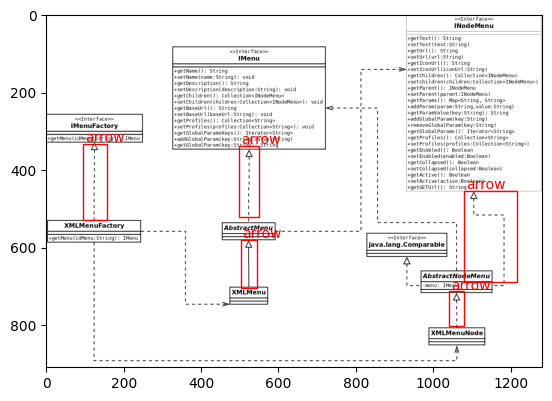



Number of elements per class:
arrow: 5


tensor([1041.6554,  713.3777, 1079.9738,  803.9487]) tensor(0.9124) arrow
tensor([502.3285, 580.5951, 544.8371, 704.5762]) tensor(0.8741) arrow
tensor([ 95.4206, 331.2766, 156.0324, 527.8915]) tensor(0.8628) arrow
tensor([498.2054, 338.2689, 550.2997, 521.9298]) tensor(0.8125) arrow
tensor([1080.4270,  453.3013, 1216.1924,  687.9886]) tensor(0.7836) arrow
Total number of preictions:  5 



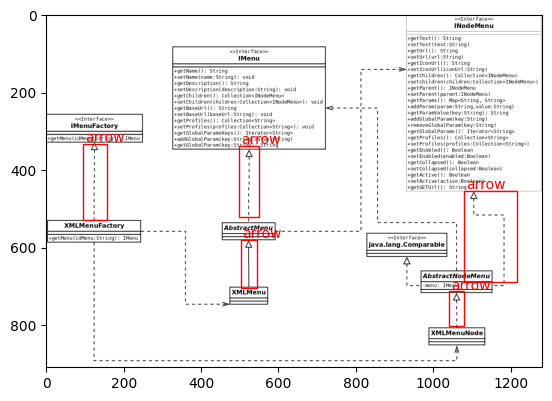



tensor([1041.6554,  713.3777, 1079.9738,  803.9487]) arrow tensor(0.9124)
tensor([502.3285, 580.5951, 544.8371, 704.5762]) arrow tensor(0.8741)
tensor([ 95.4206, 331.2766, 156.0324, 527.8915]) arrow tensor(0.8628)
tensor([498.2054, 338.2689, 550.2997, 521.9298]) arrow tensor(0.8125)
tensor([1080.4270,  453.3013, 1216.1924,  687.9886]) arrow tensor(0.7836)
F18 — Number of lines.
5
F7 — Average line length
60.7798
F8 — Line length variation
60.88697412770029
F9 — Longest line.
117.004
F10 — Shortest line.
23.0
ALL LENGHT
[37.0, 117.004, 23.0, 51.0, 75.895]


In [ ]:
#image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/02_uml.png')
image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/MenuDesign.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_naive(image,acc_threshold,iou_threshold,desired_class)

#arrow_extractor.show_class()
print("F18 — Number of lines.")
print(arrow_extractor.compute_n_arrow())
print("F7 — Average line length")
print(arrow_extractor.compute_avg_arrow_lenght())
print("F8 — Line length variation")
print(arrow_extractor.compute_std_deviation())
print("F9 — Longest line.")
print(arrow_extractor.compute_max_arrow_lenght())
print("F10 — Shortest line.")
print(arrow_extractor.compute_min_arrow_lenght())
print("ALL LENGHT")
print(arrow_extractor.find_lenght())



## Arrow Feature HoughLinesP Advanced

In [ ]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.
'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean


from scipy.spatial import distance
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

class arrow_feature_extractor_HP:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'arrow'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
        self.list_lenght , self.list_bends , self.list_slope_list = self.find_lenght_bends_slopes()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      print("Filtered predictions after thresholding, keeping only the 'class' class.")
      print("Total number of predictions: ", len(boxes), "\n")
      visualize.show_labeled_image(image, boxes, labels)
      print("\n")

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}
      print("Number of elements per class:")
      print(f"{self.desired_class}: {elements_per_class[self.desired_class]}")
      print("\n")
      for category, pred, confidence in zip(labels, boxes, scores):
        print(pred, confidence, category)
      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      print("Total number of preictions: ", len(filtered_boxes), "\n")
      visualize.show_labeled_image(image, filtered_boxes, filtered_labels)
      print("\n")
      for fb, fl, fs in zip(filtered_boxes, filtered_labels, filtered_scores):
        print(fb, fl, fs)

      return filtered_boxes,filtered_labels


    def show_arrow(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            imgplot = plt.imshow(img)
            plt.show()


    def get_arrow(self ):
        images_to_return = []  # Lista per salvare le immagini elaborate
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            images_to_return.append(img)  # Aggiungi l'immagine elaborata alla lista
        return images_to_return

    # Funzione per calcolare tutti i punti intermedi delle linee
    # usata per calcolare le linee vicine
    def intermediate_points(self , line):
        x1, y1, x2, y2 = line[0]
        points = []
        dx = abs(x2 - x1)
        dy = abs(y2 - y1)
        steps = max(dx, dy)
        if steps == 0:
            return [(x1, y1)]
        x_inc = (x2 - x1) / steps
        y_inc = (y2 - y1) / steps
        for i in range(steps + 1):
            points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
        return points


    # Funzione per controllare se due linee hanno almeno un punto vicino tra loro
    def are_lines_close(self,line1, line2, threshold=6):
        points_line1 = self.intermediate_points(line1)
        points_line2 = self.intermediate_points(line2)

        for x1, y1 in points_line1:
            for x2, y2 in points_line2:
                dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                if dist <= threshold:
                    return True
        return False


    def connect_lines(self , image):
        height, width, channel = image.shape
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        #applico il filtro gaussiano per il noise
        img = 255 - cv2.medianBlur(img, 3)

        theta_resolution_degrees = 45
        theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
        min_size = min(height, width)
        threshold_min = math.floor(0.05 * min_size)
        threshold_max = 20
        lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 15, minLineLength=threshold_min, maxLineGap=threshold_max) #img , 1 , theta = 45 , 20 , 0.2 , 2

        colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

        centers = []
        for line in lines:
            for x1, y1, x2, y2 in line:
                center_x = round((x1 + x2) / 2)
                center_y = round((y1 + y2) / 2)
                centers.append((center_x, center_y))

        grouped_lines = {}
        for i, (center_x, center_y) in enumerate(centers):
            grouped = False
            for center, group in grouped_lines.items():
                if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                    group.append(lines[i])
                    grouped = True
                    break
            if not grouped:
                grouped_lines[(center_x, center_y)] = [lines[i]]

        selected_lines = []
        for group in grouped_lines.values():
            longest_length = 0
            longest_line = None
            for line in group:
                for x1, y1, x2, y2 in line:
                    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                    if length > longest_length:
                        longest_length = length
                        longest_line = line
            if longest_line is not None:
                selected_lines.append(longest_line)

        connected_lines = []
        for i, line1 in enumerate(selected_lines):
            connected = False
            for j, line2 in enumerate(selected_lines):
                if i != j:
                    if self.are_lines_close(line1, line2, threshold=10): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                        connected = True
                        break
            if connected:
                connected_lines.append(line1)

        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
                cv2.line(out, (x1, y1), (x2, y2), color, 2)
        # Create a list to store slopes for each image
        slope_list = []
        total_length = 0
        bends = 0
        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                total_length += length
                # Calculate the slope of the line
                if x2 - x1 == 0:
                    slope = float('90')
                else:
                    slope = (y2 - y1) / (x2 - x1)
                # Append the slope to the slope_list
                slope_list.append(slope)
            bends+=1
        return out, total_length , bends , slope_list


    def find_lenght_bends_slopes(self):
        # Lista di immagini
        images = self.get_arrow()
        # Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
        list_length = []
        list_bends = []
        list_slope_list = []
        # Applica l'algoritmo a ciascuna immagine
        for image in images:
            slope_list  = []
            result_image, total_length , bends , slope_list = self.connect_lines(image)
            if total_length != 0:
              list_length.append(total_length)
              list_bends.append(bends)
              list_slope_list.append(slope_list)
            #unconment to see plot

            plt.imshow(result_image)
            plt.axis('on')
            plt.show()

        return list_length , list_bends , list_slope_list





    def compute_n_arrow(self):
        return len(self.list_lenght)


    def compute_line_bends(self):
        n_line = self.compute_n_arrow()
        total_bends = sum(self.list_bends)
        line_bends = total_bends/n_line
        line_bends = round(line_bends,3)
        return line_bends

    def compute_avg_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        average = mean(self.list_lenght)
        average  = round(average,3)
        return average

    def compute_max_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        max_value = max(self.list_lenght)
        return max_value

    def compute_min_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        min_value = min(self.list_lenght)
        return min_value


    def compute_std_deviation(self):
        if len(self.list_lenght) < 2:
            return 0  # Return 0 for lists with fewer than two elements
        mean_value = statistics.mean(self.list_lenght)
        standard_deviation = statistics.stdev(self.list_lenght)
        standard_deviation_percentage = (standard_deviation / mean_value) * 100
        standard_deviation_percentage = round(standard_deviation_percentage,3)
        return standard_deviation_percentage


    def compute_line_angles(self) :
        average_angles = []
        for slope_list in self.list_slope_list:
            sum_angles = 0.0
            total_lines = len(slope_list)
            sum_angles = sum(slope_list)
            avg = sum_angles / total_lines
            average_angles.append(avg)
        tot_avg = mean(average_angles)
        tot_avg = round(tot_avg,3)
        return tot_avg

    def compute_line_ortogonality(self):
      # Inizializza una lista vuota per contenere i valori della lista semplice
      flat_list_angles = []
      sum = 0
      # Concatena gli elementi di ogni lista interna nella lista semplice
      for sublist in self.list_slope_list:
          flat_list_angles.extend(sublist)
      tot_lines = len(flat_list_angles)
      for angle in flat_list_angles:
        if angle == "90.0" or angle == "0.0" :
          n = 0
        else :
          n = 1
        sum = sum + n

      return sum/tot_lines



Image Shape:  (910, 1282, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  8 



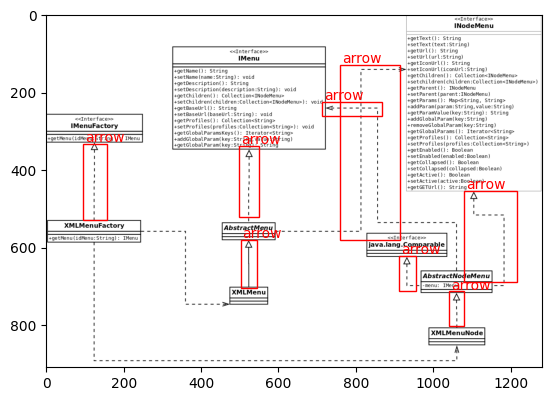



Number of elements per class:
arrow: 8


tensor([1041.6554,  713.3777, 1079.9738,  803.9487]) tensor(0.9124) arrow
tensor([502.3285, 580.5951, 544.8371, 704.5762]) tensor(0.8741) arrow
tensor([ 95.4206, 331.2766, 156.0324, 527.8915]) tensor(0.8628) arrow
tensor([498.2054, 338.2689, 550.2997, 521.9298]) tensor(0.8125) arrow
tensor([1080.4270,  453.3013, 1216.1924,  687.9886]) tensor(0.7836) arrow
tensor([713.5875, 223.3658, 866.7002, 259.5370]) tensor(0.6115) arrow
tensor([759.9233, 127.4680, 913.9310, 580.7366]) tensor(0.6097) arrow
tensor([912.7318, 621.6830, 955.9484, 713.0318]) tensor(0.6017) arrow
Total number of preictions:  8 



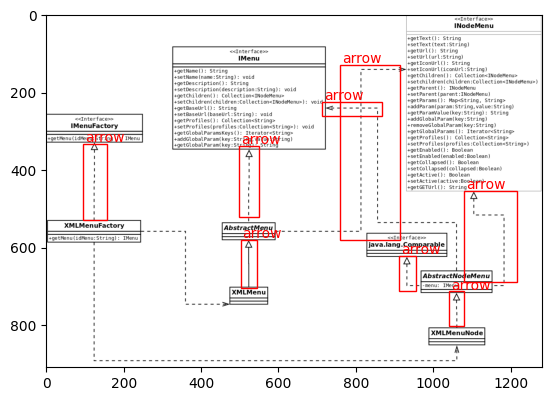



tensor([1041.6554,  713.3777, 1079.9738,  803.9487]) arrow tensor(0.9124)
tensor([502.3285, 580.5951, 544.8371, 704.5762]) arrow tensor(0.8741)
tensor([ 95.4206, 331.2766, 156.0324, 527.8915]) arrow tensor(0.8628)
tensor([498.2054, 338.2689, 550.2997, 521.9298]) arrow tensor(0.8125)
tensor([1080.4270,  453.3013, 1216.1924,  687.9886]) arrow tensor(0.7836)
tensor([713.5875, 223.3658, 866.7002, 259.5370]) arrow tensor(0.6115)
tensor([759.9233, 127.4680, 913.9310, 580.7366]) arrow tensor(0.6097)
tensor([912.7318, 621.6830, 955.9484, 713.0318]) arrow tensor(0.6017)


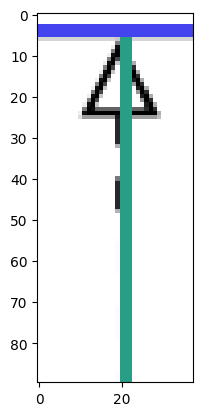

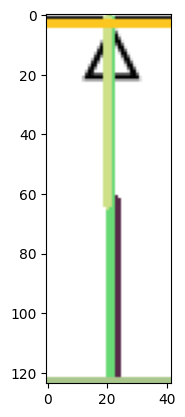

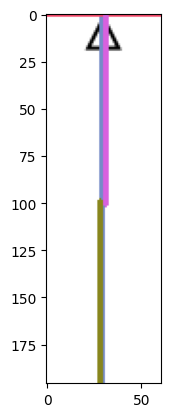

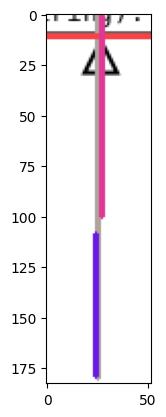

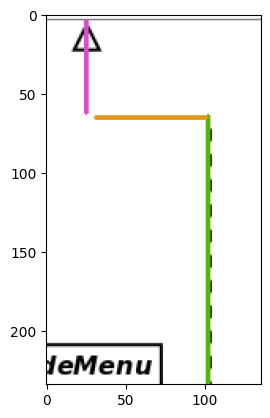

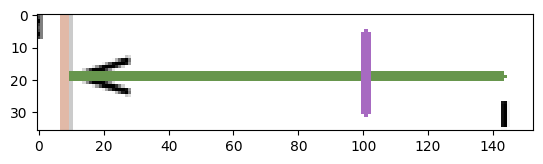

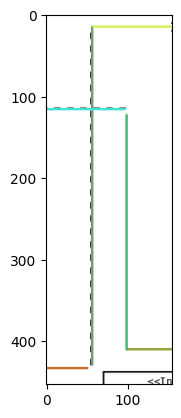

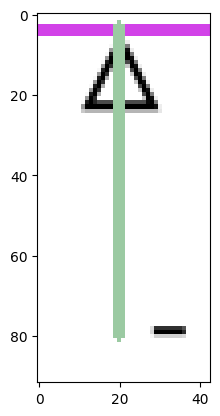

F18 — Number of lines.
8
F7 — Average line length
363.375
F8 — Line length variation
77.946
F9 — Longest line.
996.0
F10 — Shortest line.
119.0
F3 — Line bends
3.625
F4 — Line angles
53.625
F5 — Line orthogonality
1.0
ALL LENGHT and BENDS


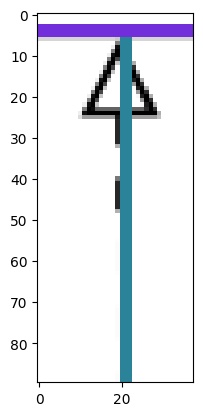

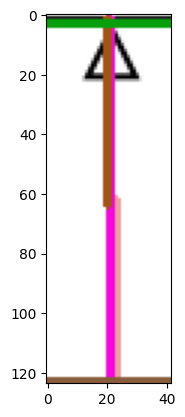

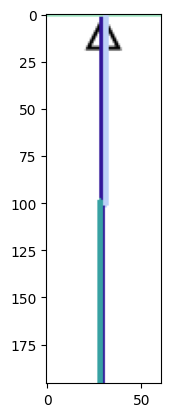

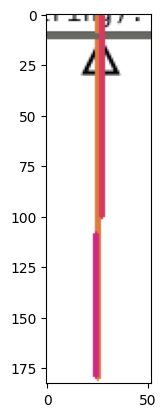

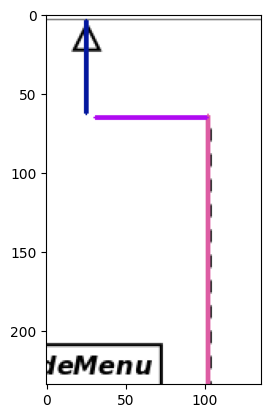

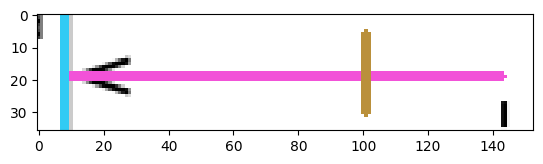

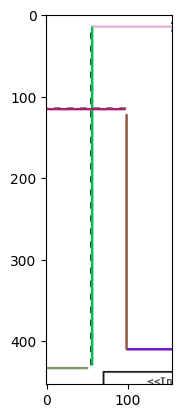

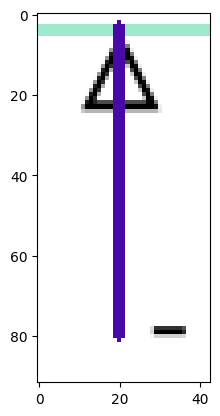

[122.0, 328.0, 451.0, 400.0, 297.0, 194.0, 996.0, 119.0]
[2, 5, 4, 4, 3, 3, 6, 2]
[[90.0, 0.0], [90.0, 90.0, 90.0, 0.0, 0.0], [90.0, 0.0, 90.0, 90.0], [90.0, 0.0, 90.0, 90.0], [90.0, 0.0, 90.0], [0.0, 90.0, 90.0], [90.0, 90.0, 0.0, 0.0, 0.0, 0.0], [0.0, 90.0]]


In [ ]:
#image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/02_uml.png')
image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/MenuDesign.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.6
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold,iou_threshold,desired_class)



#arrow_extractor.show_class()
print("F18 — Number of lines.")
print(arrow_extractor.compute_n_arrow())
print("F7 — Average line length")
print(arrow_extractor.compute_avg_arrow_lenght())
print("F8 — Line length variation")
print(arrow_extractor.compute_std_deviation())
print("F9 — Longest line.")
print(arrow_extractor.compute_max_arrow_lenght())
print("F10 — Shortest line.")
print(arrow_extractor.compute_min_arrow_lenght())
print("F3 — Line bends")
print(arrow_extractor.compute_line_bends())
print("F4 — Line angles")
print(arrow_extractor.compute_line_angles())
print("F5 — Line orthogonality")
print(arrow_extractor.compute_line_ortogonality())
print("ALL LENGHT and BENDS")
list_lenght = []
list_bends = []
list_slopes = []
list_lenght , list_bends , list_slopes= arrow_extractor.find_lenght_bends_slopes()
print(list_lenght)
print(list_bends)
print(list_slopes)




### Final Test arrow

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



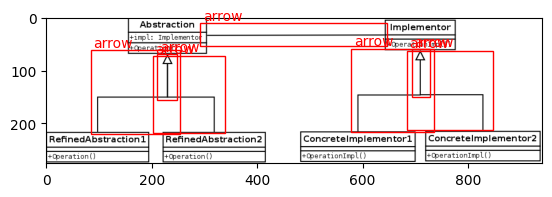



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



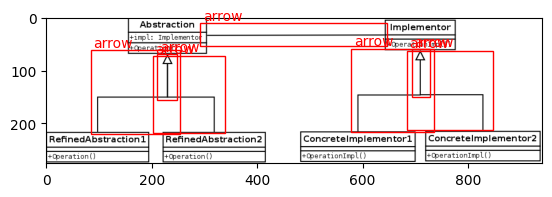



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/manual_test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

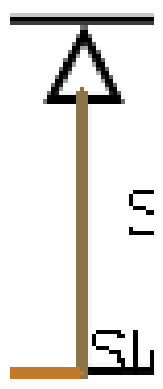

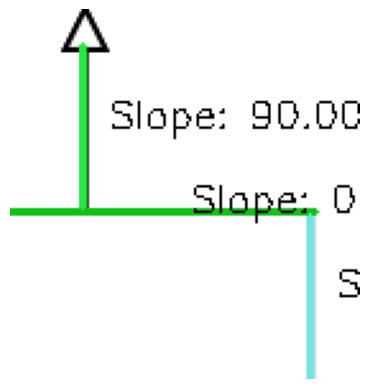

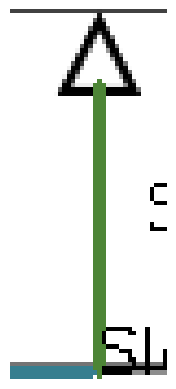

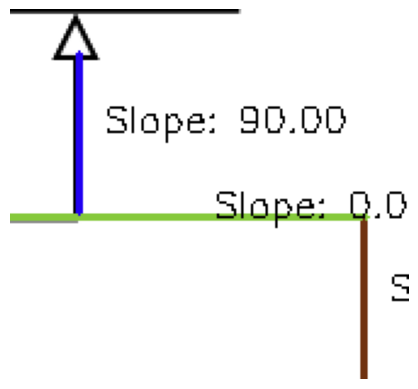

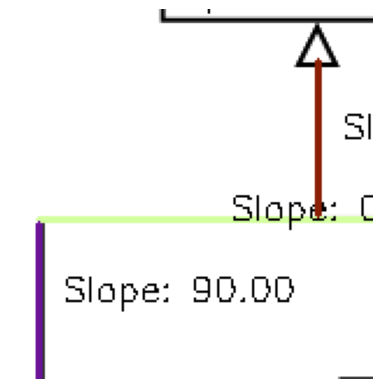

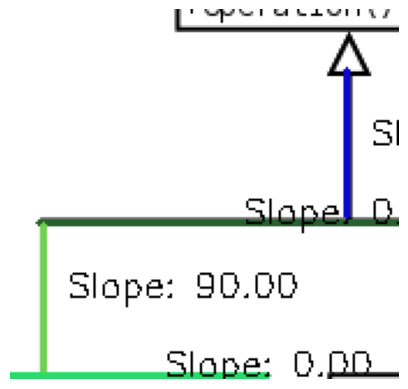

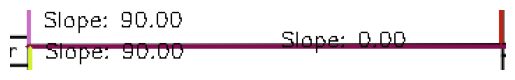

Lengths of selected lines: [85.0, 245.0, 84.0, 275.0, 275.0, 392.0, 403.0]
Slopes of selected lines:
Image 1: [90.0, 0.0]
Image 2: [0.0, 90.0, 90.0]
Image 3: [90.0, 0.0]
Image 4: [0.0, 90.0, 90.0]
Image 5: [0.0, 90.0, 90.0]
Image 6: [0.0, 0.0, 90.0, 90.0]
Image 7: [0.0, 90.0, 90.0, 90.0]


In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Funzione per calcolare tutti i punti intermedi delle linee
def intermediate_points(line):
    x1, y1, x2, y2 = line[0]
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    steps = max(dx, dy)
    if steps == 0:
        return [(x1, y1)]
    x_inc = (x2 - x1) / steps
    y_inc = (y2 - y1) / steps
    for i in range(steps + 1):
        points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
    return points

# Funzione per controllare se due linee hanno almeno un punto vicino tra loro
def are_lines_close(line1, line2, threshold=6):
    points_line1 = intermediate_points(line1)
    points_line2 = intermediate_points(line2)

    for x1, y1 in points_line1:
        for x2, y2 in points_line2:
            dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if dist <= threshold:
                return True
    return False

def connect_lines(image):
    height, width, channel = image.shape
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = 255 - cv2.medianBlur(img, 3)

    theta_resolution_degrees = 45
    theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
    min_size = min(height, width)
    threshold = math.floor(0.2 * min_size)
    lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 20, minLineLength=threshold, maxLineGap=2)

    colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

    centers = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            center_x = round((x1 + x2) / 2)
            center_y = round((y1 + y2) / 2)
            centers.append((center_x, center_y))

    grouped_lines = {}
    for i, (center_x, center_y) in enumerate(centers):
        grouped = False
        for center, group in grouped_lines.items():
            if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                group.append(lines[i])
                grouped = True
                break
        if not grouped:
            grouped_lines[(center_x, center_y)] = [lines[i]]

    selected_lines = []
    for group in grouped_lines.values():
        longest_length = 0
        longest_line = None
        for line in group:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                if length > longest_length:
                    longest_length = length
                    longest_line = line
        if longest_line is not None:
            selected_lines.append(longest_line)

    connected_lines = []
    for i, line1 in enumerate(selected_lines):
        connected = False
        for j, line2 in enumerate(selected_lines):
            if i != j:
                if are_lines_close(line1, line2, threshold=6): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                    connected = True
                    break
        if connected:
            connected_lines.append(line1)

    # Create a list to store slopes for each image
    slope_list = []

    # Calculate slopes of each line and plot them
    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            # Calculate the slope of the line
            if x2 - x1 == 0:
                slope = float('90')
            else:
                slope = (y2 - y1) / (x2 - x1)

            # Plot the line on the image
            color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
            cv2.line(out, (x1, y1), (x2, y2), color, 2)

            # Plot the slope value near the line
            slope_text = f"Slope: {slope:.2f}"
            text_pos = (round((x1 + x2) / 2) + 10, round((y1 + y2) / 2))
            cv2.putText(out, slope_text, text_pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

            # Append the slope to the slope_list
            slope_list.append(slope)


    total_length = 0
    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            total_length += length

    return out, total_length , slope_list


# Lista di immagini
images = arrow_extractor.get_arrow()

# Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
list_length = []

# Lista per memorizzare gli slope delle linee per ogni immagine
list_slope = []

# Applica l'algoritmo a ciascuna immagine
for image in images:
    result_image, total_length, slope_list = connect_lines(image)
    list_length.append(total_length)
    list_slope.append(slope_list)

    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

# Stampa le lunghezze delle linee per ogni immagine
print("Lengths of selected lines:", list_length)

# Stampa gli slope delle linee per ogni immagine
print("Slopes of selected lines:")
for i, slopes in enumerate(list_slope):
    print(f"Image {i + 1}: {slopes}")

## Pipeline for dataset **PREDICTED**

For semplicity all the code is been rewrite , becouse in this section the goal it's speedup algorithm , deleting all the print or unused/slow section

**INFO IMAGE**

In [ ]:
import cv2
import matplotlib.pyplot as plt

class diagram_feature_extractor:
    def __init__(self, image_path):
        self.image_path = image_path

    def get_color_histogram(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola l'istogramma dei valori di intensità (grigi) nell'immagine
        histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

        # Normalizza l'istogramma dividendo per il numero totale di pixel nell'immagine
        total_pixels = img.shape[0] * img.shape[1]
        histogram_normalized = histogram / total_pixels

        # Imposta a zero i valori dell'istogramma che sono inferiori a 1e-02
        histogram_normalized[histogram_normalized < 1e-02] = 0.00

        return histogram_normalized

    def get_contrast(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola la deviazione standard dei valori dei pixel
        contrast = img.std()

        return contrast

    def get_blur(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola il Laplaciano dell'immagine
        lap = cv2.Laplacian(img, cv2.CV_64F)

        # Calcola la varianza dei valori dei pixel
        blur = lap.var()

        # Normalizza la sfocatura dividendo per il numero totale di pixel nell'immagine
        total_pixels = img.shape[0] * img.shape[1]
        blur_normalized = blur / total_pixels

        return blur_normalized


    def show_histogram(self):
        histogram = self.get_color_histogram()
        plt.plot(histogram)
        plt.show()

    def aspect_ratio(self):
        img = cv2.imread(self.image_path, 0)
        height, width = img.shape
        aspect_ratio = width/height
        return aspect_ratio




**CLASS IMAGE**

In [ ]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.

'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint

class class_feature_extractor:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'class'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()

    #step1
    def compute_class_accuracy(self):

      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]
      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}

      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, self.iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      return filtered_boxes,filtered_labels



    def segment_uml_class(self, coordinates):
        xmin, ymin, xmax, ymax = map(int, coordinates)
        img = self.image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        return area

    #compute and create a list with all class areas
    def compute_areas(self):
        i = 0
        list_areas=[]
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
            if fl == 'class':
                i += 1
                list_areas.append(self.segment_uml_class(fb))
            else:
                captured_reln.append(fl)

        return list_areas

    #ratio between class Area and total imae Area
    def calculate_coverage(self):
        areaTot = 0
        i = 0
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        list_areas = self.compute_areas()
        for area in list_areas:
          areaTot += area

        coverageArea = areaTot / areaImage
        result = round(coverageArea, 3)
        return result
    import math

    def calculate_std_deviation(self):
        list_areas = self.compute_areas()
        n = len(list_areas)
        mean = sum(list_areas) / n
        variance = sum((x - mean) ** 2 for x in list_areas) / n
        std_deviation = math.sqrt(variance)
        percentage_std_deviation = (std_deviation / mean) * 100
        percentage_std_deviation = round(percentage_std_deviation,3)
        return percentage_std_deviation

    def calculate_n_class(self):
      list_areas = self.compute_areas()
      return len(list_areas)

    #voglio normalizzare il valore della media delle aree rispetto alla grandezza dell'immagine
    def calculate_avg_area(self):
        list_areas = self.compute_areas()
        mean_area = mean(list_areas)  # Rinomina la variabile 'mean' in 'mean_area'
        height, width, channels = self.image.shape
        areaImage = height * width
        normalized_area = mean_area / areaImage
        normalized_area = round(normalized_area,3)
        return normalized_area

    def calculate_aspect_ratio(self):
      height, width, channels = self.image.shape
      aspect_ratio = width/height
      aspect_ratio = round(aspect_ratio,2)
      return aspect_ratio



    def show_class(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'class':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            height, width, channels = img.shape
            area = height * width
            imgplot = plt.imshow(img)
            plt.show()

    def capture_coordinates(self):
      captured_reln = []
      captured_coordinates = []  # Lista per salvare le tuple ottenute

      for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
          if fl == 'class':
              xmin, ymin, xmax, ymax = map(int, fb)
              captured_coordinates.append((xmin, ymin, xmax, ymax))  # Aggiungi la tupla alla lista
          else:
              captured_reln.append(fl)
      return captured_coordinates


    def compute_center_dist(self , rect1, rect2):
      # Calcola il centro del primo rettangolo
      x1 = (rect1[0] + rect1[2]) / 2
      y1 = (rect1[1] + rect1[3]) / 2

      # Calcola il centro del secondo rettangolo
      x2 = (rect2[0] + rect2[2]) / 2
      y2 = (rect2[1] + rect2[3]) / 2

      # Calcola la distanza euclidea tra i centri dei rettangoli
      dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

      return dist

    def calculate_proximity(self):
        captured_coordinates = self.capture_coordinates()
        total_dist = 0
        n_rect = len(captured_coordinates)
        # itera su tutte le possibili coppie uniche di rettangoli presenti nella lista captured_coordinates
        # calcolare ogni distanza tra i centri dei rettangoli solo una volta
        for i in range(n_rect):
            for j in range(i + 1, n_rect):
                dist = self.compute_center_dist(captured_coordinates[i], captured_coordinates[j])
                total_dist += dist

        if n_rect > 1:
            # consideriamo le combinazioni
            # rappresenta il numero di modi in cui possiamo scegliere 2 rettangoli da numero_rettangoli senza ripetizioni e senza considerare l'ordine
            proximity = total_dist / (n_rect * (n_rect - 1) / 2)
        else:
            proximity = 0
        proximity = round(proximity,3)
        return proximity



    def calculate_rectangle_area(self , xmin, ymin, xmax, ymax):
      return (xmax - xmin) * (ymax - ymin)

    #compute the area covered by all rect in a specific quadrant
    def calculate_section_area(self , quadrant, rectangles):
      x_min_section, y_min_section, x_max_section, y_max_section = quadrant
      quadrant_area = self.calculate_rectangle_area(x_min_section, y_min_section, x_max_section, y_max_section)
      section_area = 0
      for rectangle in rectangles:
          x_min, y_min, x_max, y_max = rectangle

          # Calculate the intersection area between the rectangle and the section
          x_intersection_min = max(x_min, x_min_section)
          y_intersection_min = max(y_min, y_min_section)
          x_intersection_max = min(x_max, x_max_section)
          y_intersection_max = min(y_max, y_max_section)

          # Check if there is an intersection between the rectangle and the section
          if x_intersection_min < x_intersection_max and y_intersection_min < y_intersection_max:
              section_area += self.calculate_rectangle_area(x_intersection_min, y_intersection_min, x_intersection_max, y_intersection_max)

      coverage_percent = (section_area / quadrant_area) * 100
      coverage_percent = round(coverage_percent,3)
      return coverage_percent

    #all rect and all quadrants are taken into account , then is computed the variance
    def calculate_class_distribution(self):
        image_height, image_width, channels = self.image.shape
        rectangles = self.capture_coordinates()
        # Calculate the coordinates of the four quadrants
        center_x = image_width // 2
        center_y = image_height // 2

        quadrants = [
            (0, 0, center_x, center_y),
            (center_x, 0, image_width, center_y),
            (0, center_y, center_x, image_height),
            (center_x, center_y, image_width, image_height)
        ]

        # Calculate the total area of the image
        total_image_area = self.calculate_rectangle_area(0, 0, image_width, image_height)

        # Calculate the area covered by rectangles for each quadrant
        covered_areas = [self.calculate_section_area(quadrant, rectangles) for quadrant in quadrants]

        # Calculate the variance of the covered areas
        variance = np.var(covered_areas)
        variance = round(variance,3)

        return variance


**CROSS INFO**

In [ ]:
import numpy as np
import torchvision
import torch
from pprint import pprint
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt


class class_cross_extraction:
  def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
    self.image = image
    self.acc_threshold = acc_threshold
    self.iou_threshold = iou_threshold
    self.desired_class = desired_class
    self.filtered_boxes,self.filtered_labels = self.compute_cross_filter()

  #step1
  def compute_cross_accuracy(self):
    predictions = model.predict(image)
    labels, boxes, scores = predictions

    # Filter the predictions to keep only the "cross" class
    desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

    labels = [labels[idx] for idx in desired_idx]
    boxes, scores = boxes[desired_idx], scores[desired_idx]

    # Count the elements for the "cross" class
    elements_per_class = {self.desired_class: len(boxes)}
    return labels, boxes, scores

  #step2
  def compute_cross_filter(self):
    labels_map = { 'class': 1,
    'arrow': 2,
    'cross': 3,
    'line': 4
    }
    labels, boxes, scores = self.compute_cross_accuracy()
    int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype=torch.int)
    keep = torchvision.ops.nms(boxes, scores, self.iou_threshold)
    filtered_boxes, filtered_scores = boxes[keep], scores[keep]
    filtered_labels = [labels[idx] for idx in keep]


    if len(filtered_boxes) > 0:
        largest_box_idx = torch.argmax((filtered_boxes[:, 2] - filtered_boxes[:, 0]) * (filtered_boxes[:, 3] - filtered_boxes[:, 1]))
        filtered_boxes = filtered_boxes[largest_box_idx].unsqueeze(0)
        filtered_labels = [filtered_labels[largest_box_idx]]
        filtered_scores = [filtered_scores[largest_box_idx]]
    else:
        filtered_boxes = torch.empty((0, 4))
        filtered_labels = []
        filtered_scores = []

    return filtered_boxes,filtered_labels


  #step 3
  def show_cross(self):
    filtered_boxes,filtered_labels = self.compute_cross_filter()
    for fb, fl in zip(filtered_boxes,filtered_labels):
      if fl == 'cross':
        xmin, ymin, xmax, ymax = map(int, fb)
        img = image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width



  def compute_n_cross(self):
    #filtered_boxes,filtered_labels = self.compute_cross_filter()
    count = 0
    for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
      if fl == 'cross':
        count = count +1
    return count



  #avg absolut angles of crossing angles among the entire scheme image
  def compute_crossing_angles(self):
      list_images = []
      list_slopes = []
      filtered_boxes, filtered_labels = self.compute_cross_filter()
      for fb, fl in zip(filtered_boxes, filtered_labels):
          if fl == 'cross':
              xmin, ymin, xmax, ymax = map(int, fb)
              img = self.image.copy()[ymin: ymax, xmin: xmax]
              list_images.append(img)
              height, width, channels = img.shape
              area = height * width

      for cross_img in list_images:
          height, width, channel = cross_img.shape
          img = cv2.cvtColor(cross_img, cv2.COLOR_BGR2GRAY)
          out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
          # applico il filtro gaussiano per il noise
          img = 255 - cv2.medianBlur(img, 3)

          theta_resolution_degrees = 1
          theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
          min_size = min(height, width)
          threshold = math.floor(0.2 * min_size)
          lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 10, minLineLength=threshold, maxLineGap=1)
          if lines is None:  # Check if lines is None
            return 0  # Or any other value that indicates no lines were found
          count = 0
          for line in lines:
              for x1, y1, x2, y2 in line:
                  cv2.line(out, (x1, y1), (x2, y2), (0, 0, 255), 2)
                  slope_rad = np.arctan2(y2 - y1, x2 - x1)
                  slope_deg = np.degrees(slope_rad)
                  list_slopes.append(abs(slope_deg))
              count += 1


      if list_slopes:  # Check if the list is not empty before computing the mean
          average = mean(list_slopes)
          average = round(average, 3)
          return average
      else:
          return 0  # Return a default value or handle it as needed






**ARROW INFO**

In [ ]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.
'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean


from scipy.spatial import distance
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

class arrow_feature_extractor_HP:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'arrow'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
        self.list_lenght , self.list_bends , self.list_slope_list = self.find_lenght_bends_slopes()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}

      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, self.iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]

      return filtered_boxes,filtered_labels


    def show_arrow(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]



    def get_arrow(self ):
        images_to_return = []  # Lista per salvare le immagini elaborate
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            images_to_return.append(img)  # Aggiungi l'immagine elaborata alla lista
        return images_to_return

    # Funzione per calcolare tutti i punti intermedi delle linee
    # usata per calcolare le linee vicine
    def intermediate_points(self , line):
        x1, y1, x2, y2 = line[0]
        points = []
        dx = abs(x2 - x1)
        dy = abs(y2 - y1)
        steps = max(dx, dy)
        if steps == 0:
            return [(x1, y1)]
        x_inc = (x2 - x1) / steps
        y_inc = (y2 - y1) / steps
        for i in range(steps + 1):
            points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
        return points


    # Funzione per controllare se due linee hanno almeno un punto vicino tra loro
    def are_lines_close(self,line1, line2, threshold=6):
        points_line1 = self.intermediate_points(line1)
        points_line2 = self.intermediate_points(line2)

        for x1, y1 in points_line1:
            for x2, y2 in points_line2:
                dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                if dist <= threshold:
                    return True
        return False


    def connect_lines(self , image):
        height, width, channel = image.shape
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        #applico il filtro gaussiano per il noise
        img = 255 - cv2.medianBlur(img, 3)

        theta_resolution_degrees = 45
        theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
        min_size = min(height, width)
        threshold_min = math.floor(0.05 * min_size)
        threshold_max = 20
        lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 15, minLineLength=threshold_min, maxLineGap=threshold_max) #img , 1 , theta = 45 , 20 , 0.2 , 2


        if lines is None:  # Check if lines is None
          print("No lines were found in the image.")
          out = 0
          total_length = 0
          bends = 0
          slope_list = [0]
          return out, total_length , bends , slope_list

        colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]
        centers = []
        for line in lines:
            for x1, y1, x2, y2 in line:
                center_x = round((x1 + x2) / 2)
                center_y = round((y1 + y2) / 2)
                centers.append((center_x, center_y))

        grouped_lines = {}
        for i, (center_x, center_y) in enumerate(centers):
            grouped = False
            for center, group in grouped_lines.items():
                if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                    group.append(lines[i])
                    grouped = True
                    break
            if not grouped:
                grouped_lines[(center_x, center_y)] = [lines[i]]

        selected_lines = []
        for group in grouped_lines.values():
            longest_length = 0
            longest_line = None
            for line in group:
                for x1, y1, x2, y2 in line:
                    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                    if length > longest_length:
                        longest_length = length
                        longest_line = line
            if longest_line is not None:
                selected_lines.append(longest_line)

        connected_lines = []
        for i, line1 in enumerate(selected_lines):
            connected = False
            for j, line2 in enumerate(selected_lines):
                if i != j:
                    if self.are_lines_close(line1, line2, threshold=10): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                        connected = True
                        break
            if connected:
                connected_lines.append(line1)

        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
                cv2.line(out, (x1, y1), (x2, y2), color, 2)
        # Create a list to store slopes for each image
        slope_list = []
        total_length = 0
        bends = 0
        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                total_length += length
                # Calculate the slope of the line
                if x2 - x1 == 0:
                    slope = float('90')
                else:
                    slope = (y2 - y1) / (x2 - x1)
                # Append the slope to the slope_list
                slope_list.append(slope)
            bends+=1
        return out, total_length , bends , slope_list


    def find_lenght_bends_slopes(self):
        # Lista di immagini
        images = self.get_arrow()
        # Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
        list_length = []
        list_bends = []
        list_slope_list = []
        # Applica l'algoritmo a ciascuna immagine
        for image in images:
            slope_list  = []
            result_image, total_length , bends , slope_list = self.connect_lines(image)
            if total_length != 0:
              list_length.append(total_length)
              list_bends.append(bends)
              list_slope_list.append(slope_list)
            #unconment to see plot

        return list_length , list_bends , list_slope_list





    def compute_n_arrow(self):
        return len(self.list_lenght)


    def compute_line_bends(self):
        n_line = self.compute_n_arrow()
        if n_line != 0:
          total_bends = sum(self.list_bends)
          line_bends = total_bends/n_line
          line_bends = round(line_bends,3)
          return line_bends
        else:
          line_bends = 0
          return line_bends


    def compute_avg_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        average = mean(self.list_lenght)
        average  = round(average,3)
        return average

    def compute_max_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        max_value = max(self.list_lenght)
        return max_value

    def compute_min_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        min_value = min(self.list_lenght)
        return min_value


    def compute_std_deviation(self):
        if len(self.list_lenght) < 2:
            return 0  # Return 0 for lists with fewer than two elements
        mean_value = statistics.mean(self.list_lenght)
        standard_deviation = statistics.stdev(self.list_lenght)
        standard_deviation_percentage = (standard_deviation / mean_value) * 100
        standard_deviation_percentage = round(standard_deviation_percentage,3)
        return standard_deviation_percentage


    def compute_line_angles(self):
        average_angles = []
        for slope_list in self.list_slope_list:
            if slope_list:  # Check if slope_list is not empty
                avg = mean(slope_list)
                average_angles.append(avg)
        if average_angles:  # Check if average_angles is not empty
            tot_avg = mean(average_angles)
            tot_avg = round(tot_avg,3)
            return tot_avg
        else:
            return 0  # Or any other value that indicates no angles were found

    def compute_line_ortogonality(self):
        # Initialize an empty list to contain the values of the simple list
        flat_list_angles = []
        sum = 0
        # Concatenate the elements of each internal list in the simple list
        for sublist in self.list_slope_list:
            flat_list_angles.extend(sublist)
        tot_lines = len(flat_list_angles)
        if tot_lines == 0:  # Check if tot_lines is zero
            return 0  # Or any other value that indicates no lines were found
        for angle in flat_list_angles:
            if angle == "90.0" or angle == "0.0":
                n = 0
            else:
                n = 1
            sum = sum + n

        return sum/tot_lines



In [ ]:
# Specifica il percorso alla cartella delle immagini di test
training_data_dir = '/content/drive/MyDrive/dataset_full_labelled/train/'

test_data_dir = '/content/drive/MyDrive/dataset_full_labelled/test/'

validation_data_dir  = '/content/drive/MyDrive/dataset_full_labelled/validation/'

In [ ]:
print(type(diagram_feature_extractor))

<class 'type'>


In [ ]:
import os
import glob
import pandas as pd

df_val = pd.DataFrame(columns=['name','f1','f2','f3','f4','f5','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f_aspect','f_contrast','f_blur','f_hist'])
df_train =pd.DataFrame(columns=['name','f1','f2','f3','f4','f5','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f_aspect','f_contrast','f_blur','f_hist'])
df_test = pd.DataFrame(columns=['name','f1','f2','f3','f4','f5','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f_aspect','f_contrast','f_blur','f_hist'])


# Definisci il percorso della cartella
path = '/content/drive/My Drive/dataset_full_labelled/train/'

# Utilizza glob per ottenere una lista di tutti i file con estensione .png o .jpg
images = glob.glob(os.path.join(path, '*.png')) + glob.glob(os.path.join(path, '*.jpg'))


# Itera su tutte le immagini
for image_path in images:
    print(image_path)
    image=utils.read_image(image_path)
    # Esegui qui le operazioni desiderate per ciascuna immagine
    filename = os.path.basename(str(image_path)) #solo nome dell'immagine

    #__________________INFO______________
    # Percorso dell'immagine
    feature_extractor = diagram_feature_extractor(image_path)

    #_______________CLASS_______________
    # Creazione dell'oggetto UMLClassSegmenter
    acc_threshold_class = 0.7
    iou_threshold_class=0.2
    desired_class_class = 'class'
    class_extractor = class_feature_extractor(image,acc_threshold_class,iou_threshold_class,desired_class_class)

    #_______________CROSS______________________
    #STEP BY STEP COMPUTATION
    acc_threshold_cross = 0.12
    iou_threshold_cross=0.3
    desired_class_cross = 'cross'
    cross_extraction = class_cross_extraction(image,acc_threshold_cross,iou_threshold_cross,desired_class_cross)

    #_______________ARROW________________
    # Creazione dell'oggetto UMLClassSegmenter
    acc_threshold_arrow = 0.6
    iou_threshold_arrow=0.2
    desired_class_arrow = 'arrow'
    arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold_arrow,iou_threshold_arrow,desired_class_arrow)



    '''
    ____________CLASS INFO_____________
    '''
    # Stampa del risultato
    f11 = class_extractor.calculate_coverage()
    f12 = class_extractor.calculate_aspect_ratio()
    f16 = class_extractor.calculate_std_deviation()
    f17 = class_extractor.calculate_n_class()
    f15 = class_extractor.calculate_avg_area()
    f14 = class_extractor.calculate_proximity()
    f13 = class_extractor.calculate_class_distribution()

    '''
    _______________IMAGE INFO__________
    '''
    # Creazione dell'oggetto histogram__feature_extractor
    f_aspect = feature_extractor.aspect_ratio()
    f_contrast = feature_extractor.get_contrast()
    f_blur = feature_extractor.get_blur()
    f_hist = feature_extractor.get_color_histogram()

    '''
    _____________________CROSS_________________
    '''
    f1 = cross_extraction.compute_n_cross()
    f2 = cross_extraction.compute_crossing_angles()

    '''
    _____________________ARROW_______________
    '''
    f18 = arrow_extractor.compute_n_arrow()
    f7 = arrow_extractor.compute_avg_arrow_lenght()
    f8 = arrow_extractor.compute_std_deviation()
    f9 = arrow_extractor.compute_max_arrow_lenght()
    f10 = arrow_extractor.compute_min_arrow_lenght()
    f3 = arrow_extractor.compute_line_bends()
    f4 = arrow_extractor.compute_line_angles()
    f5 = arrow_extractor.compute_line_ortogonality()

    #dataframe management
    new_row = {'name':filename,'f1':f1,'f2':f2,'f3':f3,'f4':f4,'f5':f5,'f7':f7,'f8':f8,'f9':f9,'f10':f10,'f11':f11,'f12':f12,'f13':f13,'f14':f14,'f15':f15,'f16':f16,'f17':f17,'f18':f18,'f_aspect':f_aspect,'f_contrast':f_contrast,'f_blur':f_blur,'f_hist':f_hist}
    df_train = df_train.append(new_row, ignore_index=True)


# Salva il DataFrame in un file CSV
df_train.to_csv('/content/drive/My Drive/dataset_full_labelled/second_model_dataset/train/train2.csv')



/content/drive/My Drive/dataset_full_labelled/train/138.png
Image Shape:  (591, 974, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/167.png
Image Shape:  (893, 1076, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/127.png
Image Shape:  (593, 750, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/146.png
Image Shape:  (933, 1038, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/142.png
Image Shape:  (1432, 1144, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/150.png
Image Shape:  (1483, 1823, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/181.png
Image Shape:  (698, 1418, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/134.png
Image Shape:  (796, 1076, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/137.png
Image Shape:  (1305, 1205, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/171.png
Image Shape:  (1200, 1760, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/164.png
Image Shape:  (1505, 1025, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/144.png
Image Shape:  (815, 1285, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/175.png
Image Shape:  (955, 1272, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/180.png
Image Shape:  (1636, 1788, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/147.png
Image Shape:  (382, 502, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/168.png
Image Shape:  (866, 876, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/160.png
Image Shape:  (1688, 1489, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/149.png
Image Shape:  (775, 1371, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/130.png
Image Shape:  (784, 1674, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/145.png
Image Shape:  (1082, 1545, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/172.png
Image Shape:  (716, 957, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/177.png
Image Shape:  (752, 1040, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/203.png
Image Shape:  (806, 1484, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/188.png
Image Shape:  (733, 1034, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/247.png
Image Shape:  (1437, 1912, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/221.png
Image Shape:  (1366, 2244, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/201.png
Image Shape:  (1375, 1283, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/205.png
Image Shape:  (1134, 1850, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/241.png
Image Shape:  (514, 1216, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/240.png
Image Shape:  (762, 1055, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/196.png
Image Shape:  (569, 942, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/198.png
Image Shape:  (765, 1285, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/197.png
Image Shape:  (852, 1678, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/209.png
Image Shape:  (880, 1522, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/251.png
Image Shape:  (756, 632, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/199.png
Image Shape:  (945, 1063, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/214.png
Image Shape:  (509, 833, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/208.png
Image Shape:  (587, 1137, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/230.png
Image Shape:  (297, 330, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/231.png
Image Shape:  (814, 1380, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/207.png
Image Shape:  (441, 592, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/232.png
Image Shape:  (1194, 1439, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/239.png
Image Shape:  (590, 785, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/192.png
Image Shape:  (423, 450, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/200.png
Image Shape:  (802, 1316, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/253.png
Image Shape:  (690, 1290, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/204.png
Image Shape:  (606, 1149, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/215.png
Image Shape:  (1091, 857, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/226.png
Image Shape:  (552, 839, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/206.png
Image Shape:  (813, 1299, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/229.png
Image Shape:  (941, 1185, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/236.png
Image Shape:  (768, 808, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/244.png
Image Shape:  (716, 753, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/252.png
Image Shape:  (660, 1350, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/242.png
Image Shape:  (394, 604, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/225.png
Image Shape:  (1314, 1162, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/237.png
Image Shape:  (1277, 1361, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/250.png
Image Shape:  (2194, 1582, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/211.png
Image Shape:  (1018, 1368, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/218.png
Image Shape:  (529, 529, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/184.png
Image Shape:  (1160, 1400, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/246.png
Image Shape:  (896, 624, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/182.png
Image Shape:  (1636, 1560, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/220.png
Image Shape:  (321, 453, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/234.png
Image Shape:  (903, 734, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/202.png
Image Shape:  (736, 700, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/227.png
Image Shape:  (394, 832, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/212.png
Image Shape:  (1234, 1808, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/245.png
Image Shape:  (589, 838, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/243.png
Image Shape:  (368, 571, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/210.png
Image Shape:  (491, 1654, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/219.png
Image Shape:  (470, 1470, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/217.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (2200, 1560, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/238.png
Image Shape:  (506, 759, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/233.png
Image Shape:  (1286, 1243, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/216.png
Image Shape:  (745, 1914, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/185.png
Image Shape:  (1399, 2358, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/235.png
Image Shape:  (1025, 663, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/305.png
Image Shape:  (412, 884, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/306.png
Image Shape:  (739, 1220, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/325.png
Image Shape:  (901, 1144, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/270.png
Image Shape:  (474, 1708, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/263.png
Image Shape:  (334, 778, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/293.png
Image Shape:  (315, 845, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/313.png
Image Shape:  (810, 1123, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/296.png
Image Shape:  (547, 789, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/310.png
Image Shape:  (878, 1105, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/299.png
Image Shape:  (760, 960, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/315.png
Image Shape:  (1733, 1829, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/284.png
Image Shape:  (913, 993, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/314.png
Image Shape:  (600, 1371, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/316.png
Image Shape:  (962, 1274, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/302.png
Image Shape:  (710, 1486, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/298.png
Image Shape:  (690, 970, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/281.png
Image Shape:  (965, 1775, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/322.png
Image Shape:  (831, 929, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/300.png
Image Shape:  (670, 810, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/320.png
Image Shape:  (1312, 1012, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/323.png
Image Shape:  (505, 955, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/272.png
Image Shape:  (430, 809, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/256.png
Image Shape:  (405, 985, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/279.png
Image Shape:  (840, 1040, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/257.png
Image Shape:  (281, 626, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/277.png
Image Shape:  (965, 1825, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/267.png
Image Shape:  (700, 869, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/283.png
Image Shape:  (335, 605, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/301.png
Image Shape:  (889, 965, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/276.png
Image Shape:  (244, 652, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/273.png
Image Shape:  (660, 1124, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/321.png
Image Shape:  (525, 965, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/318.png
Image Shape:  (371, 629, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/274.png
Image Shape:  (375, 1619, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/294.png
Image Shape:  (716, 1516, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/319.png
Image Shape:  (1940, 2005, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/260.png
Image Shape:  (352, 814, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/290.png
Image Shape:  (681, 920, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/308.png
Image Shape:  (835, 981, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/262.png
Image Shape:  (720, 1082, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/269.png
Image Shape:  (518, 869, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/266.png
Image Shape:  (815, 1575, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/280.png
Image Shape:  (1511, 850, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/282.png
Image Shape:  (346, 955, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/317.png
Image Shape:  (1066, 2061, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/259.png
Image Shape:  (830, 966, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/255.png
Image Shape:  (549, 690, 3)
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/287.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (1575, 1926, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/258.png
Image Shape:  (923, 1161, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/304.png
Image Shape:  (710, 1486, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/261.png
Image Shape:  (688, 947, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/285.png
Image Shape:  (997, 2827, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/390.png
Image Shape:  (537, 558, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/379.png
Image Shape:  (496, 1334, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/337.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (798, 1326, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/395.png
Image Shape:  (860, 1461, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/348.png
Image Shape:  (237, 454, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/343.png
Image Shape:  (3043, 2925, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/373.png
Image Shape:  (803, 1403, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/370.png
Image Shape:  (760, 900, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/383.png
Image Shape:  (913, 1051, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/361.png
Image Shape:  (498, 953, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/358.png
Image Shape:  (880, 1198, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/372.png
Image Shape:  (444, 1089, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/350.png
Image Shape:  (762, 676, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/366.png
Image Shape:  (598, 1051, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/342.png
Image Shape:  (1668, 2232, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/338.png
Image Shape:  (458, 655, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/380.png
Image Shape:  (390, 1049, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/349.png
Image Shape:  (916, 1121, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/331.png
Image Shape:  (729, 1073, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/391.png
Image Shape:  (226, 469, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/396.png
Image Shape:  (775, 1295, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/394.png
Image Shape:  (1450, 1780, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/356.png
Image Shape:  (644, 1248, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/385.png
Image Shape:  (923, 1324, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/353.png
Image Shape:  (1722, 2090, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/368.png
Image Shape:  (773, 988, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/360.png
Image Shape:  (838, 1185, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/376.png
Image Shape:  (959, 919, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/354.png
Image Shape:  (329, 485, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/347.png
Image Shape:  (482, 1023, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/335.png
Image Shape:  (2488, 1006, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/392.png
Image Shape:  (739, 1139, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/327.png
Image Shape:  (814, 774, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/341.png
Image Shape:  (811, 796, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/344.png
Image Shape:  (430, 791, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/377.png
Image Shape:  (693, 552, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/367.png
Image Shape:  (984, 1206, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/334.png
Image Shape:  (1285, 2059, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/359.png
Image Shape:  (604, 992, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/339.png
Image Shape:  (730, 1267, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/352.png
Image Shape:  (329, 569, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/388.png
Image Shape:  (864, 737, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/345.png
Image Shape:  (837, 676, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/340.png
Image Shape:  (950, 897, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/382.png
Image Shape:  (430, 951, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/355.png
Image Shape:  (352, 587, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/374.png
Image Shape:  (982, 799, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/328.png
Image Shape:  (1353, 1492, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/357.png
Image Shape:  (876, 860, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/364.png
Image Shape:  (587, 821, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/384.png
Image Shape:  (372, 826, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/387.png
Image Shape:  (739, 716, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/393.png
Image Shape:  (445, 953, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/381.png
Image Shape:  (371, 708, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/375.png
Image Shape:  (1074, 1238, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/351.png
Image Shape:  (470, 1160, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/346.png
Image Shape:  (378, 494, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/362.png
Image Shape:  (694, 1351, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/371.png
Image Shape:  (684, 772, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/466.png
Image Shape:  (286, 512, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/401.png
Image Shape:  (627, 1076, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/409.png
Image Shape:  (1145, 1785, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/438.png
Image Shape:  (447, 560, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/432.png
Image Shape:  (910, 1282, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/465.png
Image Shape:  (2664, 2643, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/437.png
Image Shape:  (769, 721, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/443.png
Image Shape:  (656, 837, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/400.png
Image Shape:  (609, 919, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/460.png
Image Shape:  (467, 945, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/413.png
Image Shape:  (742, 867, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/452.png
Image Shape:  (746, 1083, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/399.png
Image Shape:  (763, 1407, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/433.png
Image Shape:  (670, 1567, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/423.png
Image Shape:  (674, 1918, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/424.png
Image Shape:  (1143, 1113, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/467.png
Image Shape:  (611, 1233, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/435.png
Image Shape:  (788, 957, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/417.png
Image Shape:  (1201, 1762, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/461.png
Image Shape:  (328, 507, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/412.png
Image Shape:  (1993, 1191, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/445.png
Image Shape:  (1493, 2367, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/448.png
Image Shape:  (377, 809, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/456.png
Image Shape:  (283, 660, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/427.png
Image Shape:  (1451, 1599, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/446.png
Image Shape:  (966, 838, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/425.png
Image Shape:  (1335, 1706, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/430.png
Image Shape:  (700, 810, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/405.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (1734, 3600, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/426.png
Image Shape:  (303, 975, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/454.png
Image Shape:  (1220, 1149, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/404.png
Image Shape:  (1696, 4086, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/462.png
Image Shape:  (452, 704, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/416.png
Image Shape:  (451, 433, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/411.png
Image Shape:  (460, 980, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/428.png
Image Shape:  (590, 1420, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/422.png
Image Shape:  (2340, 2800, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/442.png
Image Shape:  (1074, 1182, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/398.png
Image Shape:  (584, 659, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/420.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (389, 911, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/410.png
Image Shape:  (493, 796, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/464.png
Image Shape:  (2680, 3643, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/459.png
Image Shape:  (314, 913, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/414.png
Image Shape:  (864, 1393, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/402.png
Image Shape:  (442, 647, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/453.png
Image Shape:  (1259, 1791, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/397.png
Image Shape:  (2011, 1181, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/457.png
Image Shape:  (1517, 591, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/480.png
Image Shape:  (1386, 3930, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/509.png
Image Shape:  (449, 566, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/538.png
Image Shape:  (659, 1363, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/521.png
Image Shape:  (936, 1399, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/497.png
Image Shape:  (1207, 1623, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/481.png
Image Shape:  (870, 1156, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/518.png
Image Shape:  (510, 750, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/508.png
Image Shape:  (642, 527, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/534.png
Image Shape:  (669, 248, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/517.png
Image Shape:  (499, 704, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/525.png
Image Shape:  (618, 997, 3)
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/520.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (659, 794, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/533.png
Image Shape:  (659, 971, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/522.png
Image Shape:  (538, 835, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/487.png
Image Shape:  (627, 1258, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/500.png
Image Shape:  (283, 562, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/469.png
Image Shape:  (455, 765, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/473.png
Image Shape:  (1041, 1999, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/524.png
Image Shape:  (837, 1464, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/475.png
Image Shape:  (2932, 1696, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/512.png
Image Shape:  (3086, 2173, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/489.png
Image Shape:  (704, 852, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/496.png
Image Shape:  (639, 1031, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/504.png
Image Shape:  (536, 656, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/528.png
Image Shape:  (577, 906, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/472.png
Image Shape:  (768, 1202, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/526.png
Image Shape:  (4039, 5000, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/507.png
Image Shape:  (395, 1304, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/531.png
Image Shape:  (1356, 2640, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/515.png
Image Shape:  (663, 1029, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/478.png
Image Shape:  (816, 1355, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/494.png
Image Shape:  (805, 685, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/501.png
Image Shape:  (662, 860, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/516.png
Image Shape:  (638, 927, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/532.png
Image Shape:  (669, 248, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/505.png
Image Shape:  (1517, 2607, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/529.png
Image Shape:  (405, 625, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/523.png
Image Shape:  (491, 824, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/537.png
Image Shape:  (664, 248, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/502.png
Image Shape:  (546, 1270, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/503.png
Image Shape:  (1158, 1499, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/482.png
Image Shape:  (456, 855, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/530.png
Image Shape:  (489, 736, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/485.png
Image Shape:  (1134, 1747, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/477.png
Image Shape:  (664, 1000, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/470.png
Image Shape:  (2711, 2582, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/514.png
Image Shape:  (672, 979, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/499.png
Image Shape:  (1262, 1151, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/535.png
Image Shape:  (547, 315, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/519.png
Image Shape:  (510, 652, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/479.png
Image Shape:  (1264, 1384, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/468.png
Image Shape:  (1350, 836, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/536.png
Image Shape:  (552, 301, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/492.png
Image Shape:  (595, 615, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/588.png
Image Shape:  (659, 395, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/560.png
Image Shape:  (640, 516, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/611.png
Image Shape:  (1318, 917, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/570.png
Image Shape:  (472, 944, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/555.png
Image Shape:  (640, 795, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/553.png
Image Shape:  (653, 395, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/574.png
Image Shape:  (459, 501, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/585.png
Image Shape:  (659, 432, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/564.png
Image Shape:  (509, 1296, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/558.png
Image Shape:  (653, 432, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/546.png
Image Shape:  (347, 1795, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/583.png
Image Shape:  (659, 395, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/567.png
Image Shape:  (1013, 548, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/582.png
Image Shape:  (1064, 2117, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/565.png
Image Shape:  (528, 1295, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/598.png
Image Shape:  (490, 967, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/600.png
Image Shape:  (508, 472, 3)
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/576.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (365, 435, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/594.png
Image Shape:  (1287, 2105, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/542.png
Image Shape:  (552, 301, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/556.png
Image Shape:  (653, 432, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/592.png
Image Shape:  (760, 1058, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/581.png
Image Shape:  (1064, 2117, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/548.png
Image Shape:  (192, 669, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/563.png
Image Shape:  (1008, 548, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/572.png
Image Shape:  (975, 1287, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/591.png
Image Shape:  (165, 440, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/559.png
Image Shape:  (640, 516, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/612.png
Image Shape:  (1043, 1326, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/602.png
Image Shape:  (951, 1779, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/579.png
Image Shape:  (1064, 2117, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/573.png
Image Shape:  (823, 1241, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/561.png
Image Shape:  (640, 516, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/539.png
Image Shape:  (659, 1544, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/587.png
Image Shape:  (645, 516, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/543.png
Image Shape:  (552, 301, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/550.png
Image Shape:  (365, 304, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/551.png
Image Shape:  (1200, 669, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/599.png
Image Shape:  (784, 1425, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/545.png
Image Shape:  (1395, 603, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/596.png
Image Shape:  (614, 601, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/595.png
Image Shape:  (605, 688, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/584.png
Image Shape:  (659, 432, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/562.png
Image Shape:  (1008, 548, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/569.png
Image Shape:  (472, 944, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/614.png
Image Shape:  (626, 899, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/590.png
Image Shape:  (640, 1125, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/547.png
Image Shape:  (192, 669, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/586.png
Image Shape:  (621, 2024, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/549.png
Image Shape:  (1536, 629, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/580.png
Image Shape:  (632, 686, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/601.png
Image Shape:  (848, 1563, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/575.png
Image Shape:  (780, 730, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/607.png
Image Shape:  (873, 1766, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/613.png
Image Shape:  (460, 680, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/544.png
Image Shape:  (1395, 603, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/566.png
Image Shape:  (509, 1296, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/605.png
Image Shape:  (728, 1076, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/571.png
Image Shape:  (603, 665, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/554.png
Image Shape:  (1008, 548, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/540.png
Image Shape:  (547, 315, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/557.png
Image Shape:  (653, 395, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/541.png
Image Shape:  (659, 1544, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/604.png
Image Shape:  (1147, 1973, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/609.png
Image Shape:  (535, 715, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/610.png
Image Shape:  (1592, 1134, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/568.png
Image Shape:  (603, 665, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/589.png
Image Shape:  (640, 617, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/577.png
Image Shape:  (550, 953, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/578.png
Image Shape:  (1130, 1020, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/552.png
Image Shape:  (653, 432, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/603.png
Image Shape:  (2000, 2078, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/632.png
Image Shape:  (386, 709, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/625.png
Image Shape:  (720, 1077, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/623.png
Image Shape:  (1533, 700, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/619.png
Image Shape:  (800, 800, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/621.png
Image Shape:  (768, 1425, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/617.png
Image Shape:  (673, 757, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/618.png
Image Shape:  (495, 675, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/633.png
Image Shape:  (1297, 1476, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/622.png
Image Shape:  (940, 960, 3)
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/627.png
Image Shape:  (2294, 1786, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/615.png
Image Shape:  (557, 938, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/626.png
Image Shape:  (229, 549, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/630.png
Image Shape:  (1110, 2051, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/631.png
Image Shape:  (276, 941, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/616.png
Image Shape:  (498, 1176, 3)
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/634.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (573, 868, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/642.png
Image Shape:  (1418, 1474, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/640.png
Image Shape:  (494, 893, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/639.png


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (577, 708, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/636.png
Image Shape:  (505, 788, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/638.png
Image Shape:  (784, 1481, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/637.png
Image Shape:  (1779, 2000, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/141.png
Image Shape:  (439, 1107, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/154.png
Image Shape:  (1020, 948, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/176.png
Image Shape:  (568, 824, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/129.png
Image Shape:  (488, 712, 3)
No lines were found in the image.
No lines were found in the image.
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/156.png
Image Shape:  (1200, 1760, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/159.png
Image Shape:  (510, 741, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/139.png
Image Shape:  (2192, 1481, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/174.png
Image Shape:  (1557, 2217, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/131.png
Image Shape:  (439, 986, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/128.png
Image Shape:  (575, 1066, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/166.png
Image Shape:  (835, 1365, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/148.png
Image Shape:  (748, 695, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/162.png
Image Shape:  (1119, 750, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/173.png
Image Shape:  (282, 312, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/143.png
Image Shape:  (1045, 1182, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/152.jpg
Image Shape:  (838, 1064, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/169.jpg
Image Shape:  (568, 889, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/155.jpg
Image Shape:  (2837, 1771, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/153.jpg
Image Shape:  (1675, 711, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/165.jpg
Image Shape:  (578, 978, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/132.jpg
Image Shape:  (2344, 1845, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/140.jpg
Image Shape:  (734, 960, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/178.jpg
Image Shape:  (500, 1730, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/248.jpg
Image Shape:  (836, 754, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/183.jpg
Image Shape:  (473, 753, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/190.jpg
Image Shape:  (401, 723, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/194.jpg
Image Shape:  (520, 772, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/223.jpg
Image Shape:  (2750, 3417, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/189.jpg
Image Shape:  (675, 1273, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/193.jpg
Image Shape:  (858, 1100, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/249.jpg
Image Shape:  (480, 1048, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/224.jpg
Image Shape:  (1110, 1840, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/222.jpg
Image Shape:  (542, 912, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/213.jpg
Image Shape:  (943, 1146, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/195.jpg
Image Shape:  (372, 623, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/191.jpg
Image Shape:  (409, 481, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/254.jpg
Image Shape:  (1202, 1384, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/295.jpg
Image Shape:  (509, 877, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/291.jpg
Image Shape:  (833, 1289, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/326.jpg
Image Shape:  (451, 752, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/268.jpg
Image Shape:  (630, 550, 3)
No lines were found in the image.
No lines were found in the image.
/content/drive/My Drive/dataset_full_labelled/train/289.jpg


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


Image Shape:  (559, 1099, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/311.jpg
Image Shape:  (365, 544, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/292.jpg
Image Shape:  (955, 1374, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/297.jpg
Image Shape:  (426, 786, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/307.jpg
Image Shape:  (863, 1423, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/288.jpg
Image Shape:  (654, 886, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/278.jpg
Image Shape:  (910, 1784, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/286.jpg
Image Shape:  (524, 1698, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/275.jpg
Image Shape:  (750, 1040, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/265.jpg
Image Shape:  (510, 1000, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/386.jpg
Image Shape:  (652, 489, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/389.jpg
Image Shape:  (420, 560, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/336.jpg
Image Shape:  (2958, 3853, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/329.jpg
Image Shape:  (1073, 1229, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/330.jpg
Image Shape:  (811, 1258, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/369.jpg
Image Shape:  (740, 1010, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/332.jpg
Image Shape:  (593, 874, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/449.jpg
Image Shape:  (672, 968, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/419.jpg
Image Shape:  (595, 830, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/458.jpg
Image Shape:  (437, 821, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/450.jpg
Image Shape:  (510, 735, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/441.jpg
Image Shape:  (497, 1022, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/455.jpg
Image Shape:  (2021, 2783, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/463.jpg
Image Shape:  (458, 460, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/403.jpg
Image Shape:  (1191, 3406, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/444.jpg
Image Shape:  (551, 486, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/415.jpg
Image Shape:  (670, 1010, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/421.jpg
Image Shape:  (695, 1163, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/439.jpg
Image Shape:  (887, 1143, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/440.jpg
Image Shape:  (797, 1221, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/436.jpg
Image Shape:  (767, 1097, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/447.jpg
Image Shape:  (400, 826, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/429.jpg
Image Shape:  (1947, 1062, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/407.jpg
Image Shape:  (708, 993, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/431.jpg
Image Shape:  (668, 1201, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/418.jpg
Image Shape:  (632, 1244, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/451.jpg
Image Shape:  (564, 884, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/408.jpg
Image Shape:  (766, 960, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/406.jpg
Image Shape:  (860, 1110, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/488.jpg
Image Shape:  (374, 1054, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/471.jpg
Image Shape:  (738, 710, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/527.jpg
Image Shape:  (352, 674, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/490.jpg
Image Shape:  (395, 984, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/474.jpg
Image Shape:  (2313, 2029, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/493.jpg
Image Shape:  (753, 957, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/513.jpg
Image Shape:  (1005, 1023, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/486.jpg
Image Shape:  (1339, 1320, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/510.jpg
Image Shape:  (1515, 2357, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/511.jpg
Image Shape:  (1669, 1481, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/483.jpg
Image Shape:  (990, 2490, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/491.jpg
Image Shape:  (701, 898, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/498.jpg
Image Shape:  (441, 425, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/506.jpg
Image Shape:  (416, 926, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/495.jpg
Image Shape:  (2505, 1446, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/484.jpg
Image Shape:  (366, 513, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/608.jpg
Image Shape:  (424, 771, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/597.jpg
Image Shape:  (605, 415, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/593.jpg
Image Shape:  (1244, 1940, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/606.jpg
Image Shape:  (464, 639, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/624.jpg
Image Shape:  (1027, 2183, 3)
No lines were found in the image.


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/628.jpg
Image Shape:  (1876, 1003, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/620.jpg
Image Shape:  (1184, 2184, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/635.jpg
Image Shape:  (578, 848, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/641.jpg
Image Shape:  (1175, 1175, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/157.jpg
Image Shape:  (1354, 1603, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/179.jpg
Image Shape:  (1000, 1580, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/133.jpg
Image Shape:  (474, 1109, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/151.jpg
Image Shape:  (1050, 1680, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/126.jpg
Image Shape:  (1142, 1486, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/170.jpg
Image Shape:  (700, 1330, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/158.jpg
Image Shape:  (599, 905, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/136.jpg
Image Shape:  (276, 926, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


/content/drive/My Drive/dataset_full_labelled/train/135.jpg
Image Shape:  (926, 1113, 3)


<ipython-input-15-2aee69105793>:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(new_row, ignore_index=True)


In [ ]:
df_train

name f1      f2     f3      f4   f5       f7      f8           f9  \
0    138.png  1  36.817  3.111  44.333  1.0  137.444  55.018   305.000000   
1    167.png  1  53.805  2.250  30.250  1.0  101.349  49.266   173.000000   
2    127.png  1   0.000  0.000   0.000  0.0    0.000   0.000     0.000000   
3    146.png  1   0.000  4.571  38.357  1.0  625.857  71.295  1361.000000   
4    142.png  1   7.922  4.400   1.321  1.0  679.903  69.950  1517.591196   
..       ... ..     ...    ...     ...  ...      ...     ...          ...   
494  126.jpg  0   0.000  6.292  35.501  1.0  484.141  83.589  1421.832611   
495  170.jpg  0   0.000  2.750  22.542  1.0  155.716  38.397   207.000000   
496  158.jpg  1   6.530  4.111  42.694  1.0  252.460  38.318   438.132034   
497  136.jpg  0   0.000  3.800  31.267  1.0  243.477  50.954   404.000000   
498  135.jpg  0   0.000  3.444  43.833  1.0  277.889  79.887   730.000000   

            f10  ...      f13      f14    f15      f16  f17  f18  f_aspect  \
0     70.000000  ...  126.709  467.440  0.040   53.775   14    9  1.648054   
1     59.396970  ...  489.349  357.046  0.083  101.202    6    4  1.204927   
2      0.000000  ...   17.421  380.404  0.118   55.416    5    0  1.264755   
3    141.000000  ...  266.216  593.010  0.065   66.963    8    7  1.112540   
4    203.208153  ...   22.829  612.889  0.008   25.458   28   10  0.798883   
..          ...  ...      ...      ...    ...      ...  ...  ...       ...   
494   51.000000  ...   59.437  657.249  0.018   99.618   25   24  1.301226   
495   87.982756  ...   23.420  570.874  0.055   73.001    5    4  1.900000   
496  115.296465  ...   43.058  392.785  0.023   42.602   12    9  1.510851   
497   98.000000  ...  145.258  426.362  0.060   52.199    6    5  3.355072   
498   66.000000  ...   90.156  615.587  0.049   93.116   10    9  1.201944   

    f_contrast    f_blur                                             f_hist  
0    68.314585  0.034577  [[0.06447325905002137], [0.0], [0.0], [0.0], [...  
1    54.283809  0.008370  [[0.0352212790934863], [0.0], [0.0], [0.0], [0...  
2    46.920594  0.038204  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  
3    57.921872  0.010739  [[0.02329382706870951], [0.0], [0.0], [0.0], [...  
4    41.153003  0.004846  [[0.02098756690237137], [0.0], [0.0], [0.0], [...  
..         ...       ...                                                ...  
494  45.836191  0.008472  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  
495  28.279824  0.004856  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  
496  41.234328  0.019587  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  
497  50.670261  0.029737  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  
498  54.699920  0.009037  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  

[499 rows x 22 columns]

In [ ]:
df_test

Empty DataFrame
Columns: [name, f1, f2, f3, f4, f5, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f_aspect, f_contrast, f_blur, f_hist]
Index: []

[0 rows x 22 columns]

# Second Model : classifier

In [ ]:
import pandas as pd

# Specifica il percorso del file CSV
train_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/train/train_labelled.csv'
test_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/test/test_labelled.csv'
validation_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/validation/validation_labelled.csv'
label_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/label/label.csv'
mapping_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/name_mapping.csv'

# Carica il file CSV in un DataFrame
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_val = pd.read_csv(validation_path)
df_label = pd.read_csv(label_path)
df_mapping = pd.read_csv(mapping_path)


df_train = df_train.drop('Unnamed: 0.1', axis=1)
df_train = df_train.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0.1', axis=1)
df_test = df_test.drop('Unnamed: 0', axis=1)
df_val = df_val.drop('Unnamed: 0.1', axis=1)
df_val = df_val.drop('Unnamed: 0', axis=1)

## Training Classifier

### K-NN

In [ ]:
df_train = df_train.drop('f_hist', axis=1)
df_test = df_test.drop('f_hist', axis=1)
df_val = df_val.drop('f_hist', axis=1)

Nel codice fornito, il valore di k per il miglior classificatore KNN viene scelto basandosi sull'errore di classificazione sui dati di test. Il processo è il seguente:


*   Vengono addestrati vari modelli KNN con valori di k che vanno da 1 a 20.

*   Per ciascun modello, viene calcolato l'errore di classificazione sui dati di test. L'errore di classificazione è definito come 1 meno l'accuratezza (1 - accuracy).
*   Il valore di k che corrisponde all'errore di classificazione più basso sui dati di test viene considerato il "miglior" valore di k.
La ragione dietro questa scelta è che vogliamo trovare il valore di k che offre le migliori prestazioni predittive sui dati di test.




BEST K = 
16
Report di Classificazione:
              precision    recall  f1-score   support

           1       0.67      0.18      0.29        11
           2       0.20      0.20      0.20        10
           3       0.47      0.74      0.57        19
           4       0.20      0.20      0.20         5
           5       0.71      0.50      0.59        10

    accuracy                           0.44        55
   macro avg       0.45      0.36      0.37        55
weighted avg       0.48      0.44      0.42        55



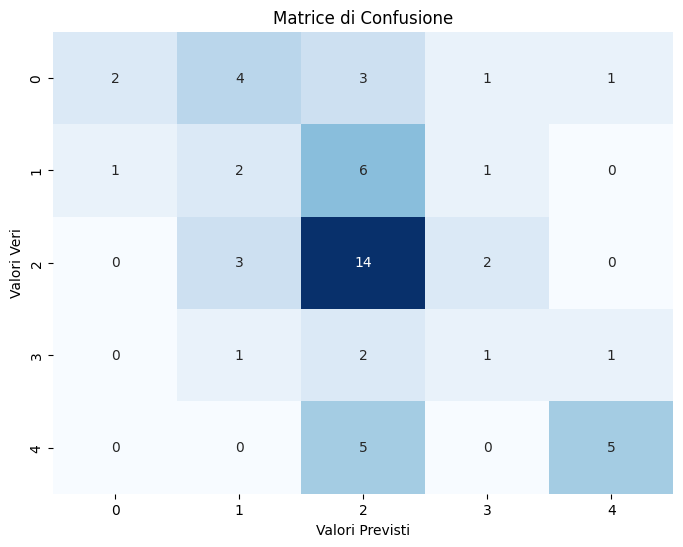

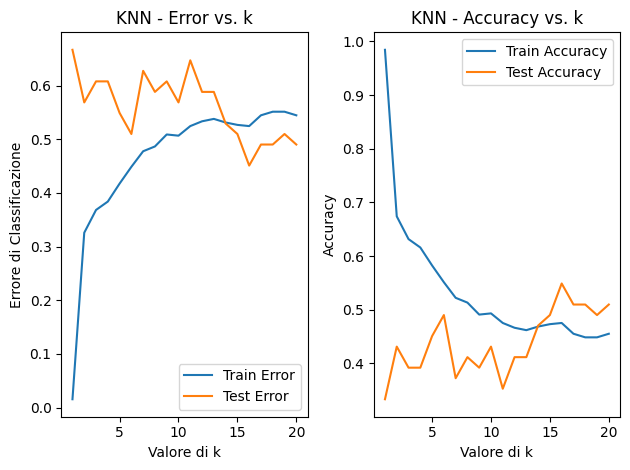

Report di Classificazione:
Weighted Accuracy: 0.48
Weighted Recall: 0.44
Weighted F1 Score: 0.42


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Rimuovi la colonna 'quality' dai dataframe e crea array target
X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']

X_test = df_test.drop('quality', axis=1)
y_test = df_test['quality']

X_val = df_val.drop('quality', axis=1)
y_val = df_val['quality']

X_train = X_train.drop('name', axis=1)
X_test = X_test.drop('name', axis=1)
X_val = X_val.drop('name', axis=1)
# Addestra il classificatore KNN
k_values = list(range(1, 21))  # Prova k da 1 a 20
train_errors = []
test_errors = []
train_scores = []
test_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_error = 1 - knn.score(X_train, y_train)
    test_error = 1 - knn.score(X_test, y_test)

    train_errors.append(train_error)
    test_errors.append(test_error)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Trova il miglior valore di k basato sul test error
best_k = k_values[test_errors.index(min(test_errors))]
print('BEST K = ')
print(best_k)
# Addestra il classificatore con il miglior k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Calcola le previsioni
y_pred = best_knn.predict(X_val)

# Valuta il classificatore
print("Report di Classificazione:")
print(classification_report(y_val, y_pred))

# Crea la matrice di confusione con Seaborn
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valori Previsti')
plt.ylabel('Valori Veri')
plt.title('Matrice di Confusione')
plt.show()
# Grafico dell'errore di classificazione in funzione di k
plt.subplot(1, 2, 1)
plt.plot(k_values, train_errors, label="Train Error")
plt.plot(k_values, test_errors, label="Test Error")
plt.xlabel("Valore di k")
plt.ylabel("Errore di Classificazione")
plt.title("KNN - Error vs. k")
plt.legend()

# Grafico dell'accuratezza in funzione di k
plt.subplot(1, 2, 2)
plt.plot(k_values, train_scores, label="Train Accuracy")
plt.plot(k_values, test_scores, label="Test Accuracy")
plt.xlabel("Valore di k")
plt.ylabel("Accuracy")
plt.title("KNN - Accuracy vs. k")
plt.legend()

plt.tight_layout()
plt.show()

# Valuta il classificatore
print("Report di Classificazione:")
report = classification_report(y_val, y_pred, output_dict=True)

# Estrai i valori pesati di accuracy, recall e F1
accuracy = round(report['weighted avg']['precision'], 2)
recall = round(report['weighted avg']['recall'], 2)
f1 = round(report['weighted avg']['f1-score'], 2)

# Stampa i valori pesati di accuracy, recall e F1 arrotondati a due decimali
print(f"Weighted Accuracy: {accuracy}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")




In [ ]:
import numpy as np

# Calcola il discostamento tra i risultati predetti e quelli veri
discrepancy = np.abs(y_pred - y_val)

# Calcola il discostamento medio
mean_discrepancy = np.mean(discrepancy)
mean_discrepancy = round(mean_discrepancy,2)
# Stampa il discostamento medio
print(f"Discostamento Medio: {mean_discrepancy}")


Discostamento Medio: 0.84


**Save**

In [ ]:
import joblib

# Salva il modello in un file
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_knn_model.pkl'
joblib.dump(best_knn, model_filename)

# Stampa un messaggio di conferma
print(f"Modello salvato in: {model_filename}")


Modello salvato in: /content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_knn_model.pkl


**Load**

In [ ]:
# Rimuovi la colonna 'quality' dai dataframe e crea array target
X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']

X_test = df_test.drop('quality', axis=1)
y_test = df_test['quality']

X_val = df_val.drop('quality', axis=1)
y_val = df_val['quality']

X_train = X_train.drop('name', axis=1)
X_test = X_test.drop('name', axis=1)
X_val = X_val.drop('name', axis=1)

In [ ]:
import joblib

# Percorso del file del modello precedentemente salvato
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_knn_model.pkl'

# Carica il modello
loaded_model_knn = joblib.load(model_filename)

# Ora puoi utilizzare loaded_model per effettuare previsioni
y_pred_loaded = loaded_model_knn.predict(X_val)
print(y_pred_loaded)



[2 5 5 3 4 4 3 3 3 3 3 3 3 3 3 3 3 2 3 4 5 3 3 3 3 3 2 2 5 5 3 3 1 4 5 5 3
 3 1 3 2 2 3 3 2 2 3 1 2 3 3 3 4 3 2]


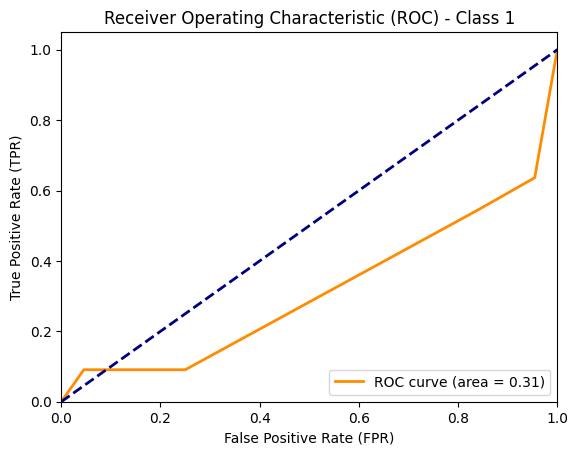

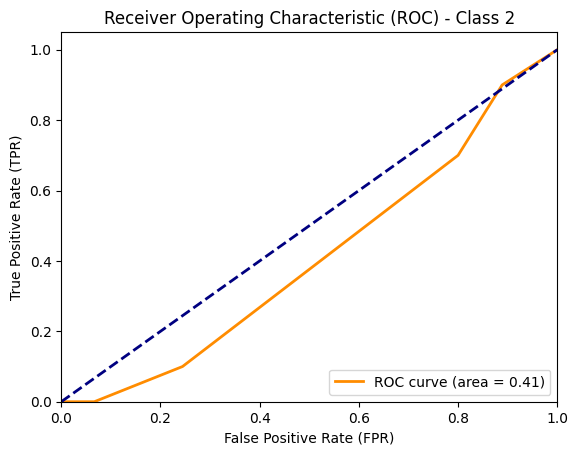

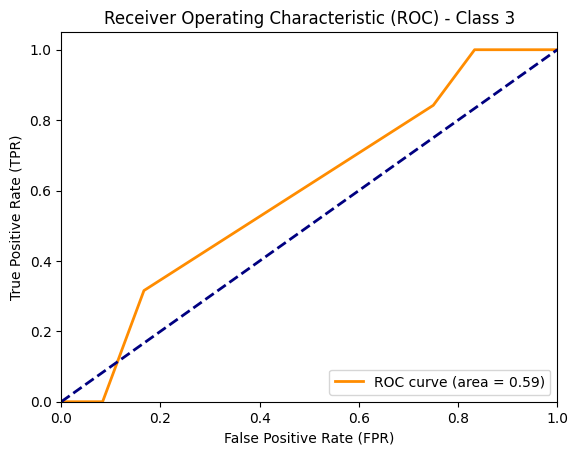

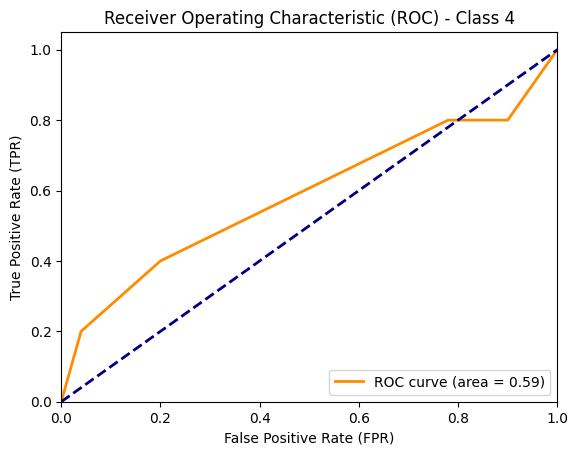

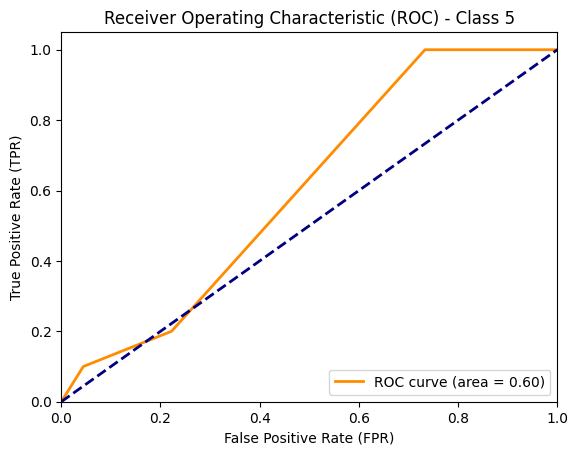

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Inizializza una lista per tenere traccia degli AUC per ciascuna classe
roc_auc = []

# Calcola la ROC curve e l'AUC per ciascuna classe
for class_label in range(1, 6):  # Le classi vanno da 1 a 5
    y_true_class = (y_val == class_label)  # Classe attuale come positiva, altre come negative
    fpr_knn, tpr_knn, _ = roc_curve(y_true_class, y_pred_loaded)  # Utilizza y_pred_loaded direttamente
    roc_auc_class = auc(fpr_knn, tpr_knn)
    roc_auc.append(roc_auc_class)

    # Plotta la ROC curve per la classe attuale
    plt.figure()
    plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_class)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) - Class {}'.format(class_label))
    plt.legend(loc='lower right')
    plt.show()


### Random Forest

In [ ]:
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)
df_val = df_val.drop('name', axis=1)
df_train = df_train.drop('f_hist', axis=1)
df_test = df_test.drop('f_hist', axis=1)
df_val = df_val.drop('f_hist', axis=1)


Miglior n_estimators: 200
Weighted Accuracy corrispondente: 0.43529411764705883

Report di Classificazione del Modello Finale:
              precision    recall  f1-score   support

           1       0.50      0.25      0.33         8
           2       0.40      0.25      0.31         8
           3       0.50      0.73      0.59        22
           4       0.40      0.20      0.27        10
           5       0.00      0.00      0.00         3

    accuracy                           0.43        51
   macro avg       0.36      0.29      0.30        51
weighted avg       0.44      0.43      0.41        51



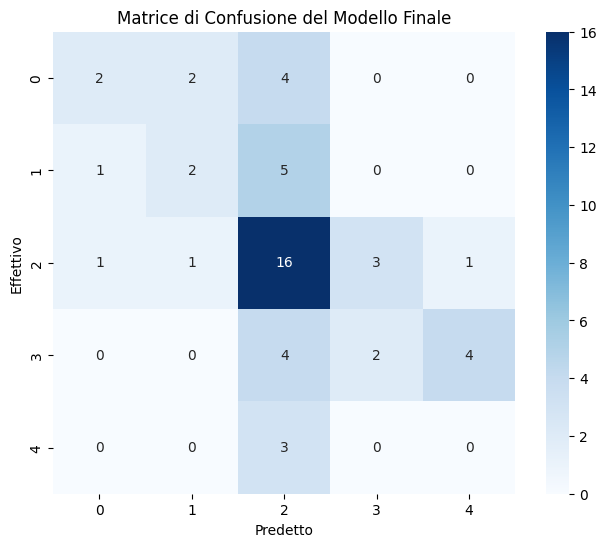

Report di Classificazione:
Weighted Accuracy: 0.44
Weighted Recall: 0.43
Weighted F1 Score: 0.41


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



# Dividi il dataset in feature (X) e target (y)
X_train = df_train.drop("quality", axis=1)
y_train = df_train["quality"]

X_test = df_test.drop("quality", axis=1)
y_test = df_test["quality"]

# Definisci una lista di valori di n_estimators da testare
n_estimators_values = [50, 100, 150, 200]

# Inizializza una lista per memorizzare le performance
results = []

# Loop attraverso i diversi valori di n_estimators
for n_estimators in n_estimators_values:
    # Crea il classificatore Random Forest con il valore corrente di n_estimators
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Esegui la previsione sui dati di test
    y_pred = rf_classifier.predict(X_test)

    # Calcola le metriche di valutazione
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Estrai le metriche di interesse (ad esempio, l'accuracy pesata)
    weighted_accuracy = classification_rep['weighted avg']['precision']

    # Salva le performance nella lista dei risultati
    results.append((n_estimators, weighted_accuracy))

# Trova il miglior valore di n_estimators in base all'accuracy pesata
best_n_estimators, best_weighted_accuracy = max(results, key=lambda x: x[1])
print(f"Miglior n_estimators: {best_n_estimators}")
print(f"Weighted Accuracy corrispondente: {best_weighted_accuracy}")

# Addestra il modello finale con il miglior n_estimators
final_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
final_rf_classifier.fit(X_train, y_train)

# Stampa il report di classificazione del modello finale
y_pred_final = final_rf_classifier.predict(X_test)
final_classification_rep = classification_report(y_test, y_pred_final)
print("\nReport di Classificazione del Modello Finale:")
print(final_classification_rep)

# Plotta la matrice di confusione del modello finale
final_conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt="d", cmap="Blues", square=True)
plt.xlabel("Predetto")
plt.ylabel("Effettivo")
plt.title("Matrice di Confusione del Modello Finale")
plt.show()

# Valuta il classificatore utilizzando y_test invece di y_val
print("Report di Classificazione:")
report = classification_report(y_test, y_pred, output_dict=True)

# Estrai i valori pesati di accuracy, recall e F1
accuracy = round(report['weighted avg']['precision'], 2)
recall = round(report['weighted avg']['recall'], 2)
f1 = round(report['weighted avg']['f1-score'], 2)

# Stampa i valori pesati di accuracy, recall e F1 arrotondati a due decimali
print(f"Weighted Accuracy: {accuracy}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")

In [ ]:
import numpy as np

# Calcola il discostamento tra i risultati predetti e quelli veri utilizzando y_test invece di y_val
discrepancy = np.abs(y_pred - y_test)

# Calcola il discostamento medio
mean_discrepancy = np.mean(discrepancy)
mean_discrepancy = round(mean_discrepancy, 2)

# Stampa il discostamento medio
print(f"Discostamento Medio: {mean_discrepancy}")


Discostamento Medio: 0.75


Miglior n_estimators: 200
Weighted Accuracy corrispondente: 0.43529411764705883

Report di Classificazione del Modello Finale:
              precision    recall  f1-score   support

           1       0.50      0.25      0.33         8
           2       0.40      0.25      0.31         8
           3       0.50      0.73      0.59        22
           4       0.40      0.20      0.27        10
           5       0.00      0.00      0.00         3

    accuracy                           0.43        51
   macro avg       0.36      0.29      0.30        51
weighted avg       0.44      0.43      0.41        51



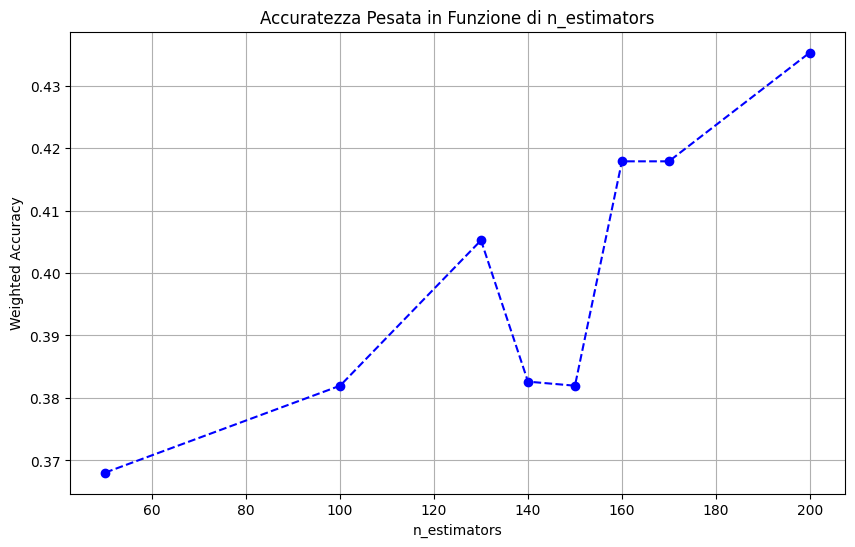

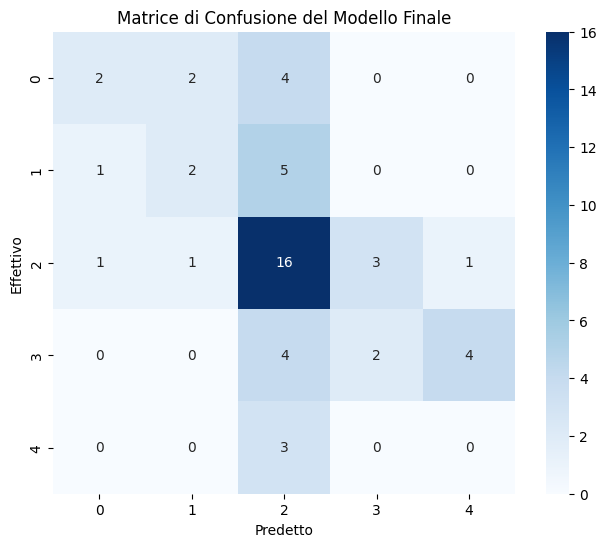

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Definisci una lista di valori di n_estimators da testare
n_estimators_values = [50, 100,130 , 140, 150,160 , 170, 200]

# Inizializza le liste per memorizzare le performance
weighted_accuracy_values = []

# Inizializza anche una lista per memorizzare le metriche di qualità (es. accuratezza pesata) per ogni valore di n_estimators
quality_metrics = []

# Loop attraverso i diversi valori di n_estimators
for n_estimators in n_estimators_values:
    # Crea il classificatore Random Forest con il valore corrente di n_estimators
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Esegui la previsione sui dati di test
    y_pred = rf_classifier.predict(X_test)

    # Calcola il report di classificazione
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Estrai l'accuratezza pesata (o altra metrica di interesse)
    weighted_accuracy = classification_rep['weighted avg']['precision']

    # Salva le performance nella lista dei risultati
    weighted_accuracy_values.append(weighted_accuracy)

    # Salva anche le metriche di qualità (es. accuratezza pesata) per ogni valore di n_estimators
    quality_metrics.append(classification_rep)

# Trova il miglior valore di n_estimators in base all'accuratezza pesata
best_n_estimators, best_weighted_accuracy = max(zip(n_estimators_values, weighted_accuracy_values), key=lambda x: x[1])
print(f"Miglior n_estimators: {best_n_estimators}")
print(f"Weighted Accuracy corrispondente: {best_weighted_accuracy}")

# Addestra il modello finale con il miglior n_estimators
final_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
final_rf_classifier.fit(X_train, y_train)

# Stampa il report di classificazione del modello finale
y_pred_final = final_rf_classifier.predict(X_test)
final_classification_rep = classification_report(y_test, y_pred_final)
print("\nReport di Classificazione del Modello Finale:")
print(final_classification_rep)

# Plotta l'andamento dell'accuratezza pesata in funzione di n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, weighted_accuracy_values, marker='o', linestyle='--', color='b')
plt.title("Accuratezza Pesata in Funzione di n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Weighted Accuracy")
plt.grid(True)
plt.show()


# Plotta la matrice di confusione del modello finale
final_conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt="d", cmap="Blues", square=True)
plt.xlabel("Predetto")
plt.ylabel("Effettivo")
plt.title("Matrice di Confusione del Modello Finale")
plt.show()





**Save**

In [ ]:
import joblib

# Salva il modello in un file
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_random_forest_model.pkl'
joblib.dump(best_knn, model_filename)

# Stampa un messaggio di conferma
print(f"Modello salvato in: {model_filename}")


Modello salvato in: /content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_random_forest_model.pkl


**Load**

In [ ]:

# Dividi il dataset in feature (X) e target (y)
X_train = df_train.drop("quality", axis=1)
y_train = df_train["quality"]

X_test = df_test.drop("quality", axis=1)
y_test = df_test["quality"]

In [ ]:
import joblib

# Percorso del file del modello precedentemente salvato
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_random_forest_model.pkl'

# Carica il modello
loaded_model_random = joblib.load(model_filename)

# Ora puoi utilizzare loaded_model per effettuare previsioni
y_pred_loaded = loaded_model_random.predict(X_val)
print(y_pred_loaded)



[2 5 5 3 4 4 3 3 3 3 3 3 3 3 3 3 3 2 3 4 5 3 3 3 3 3 2 2 5 5 3 3 1 4 5 5 3
 3 1 3 2 2 3 3 2 2 3 1 2 3 3 3 4 3 2]


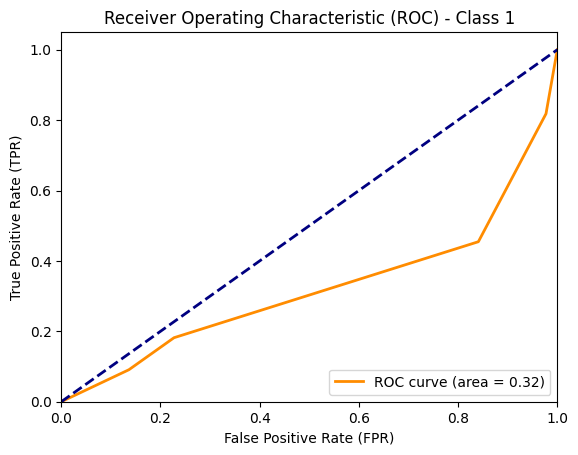

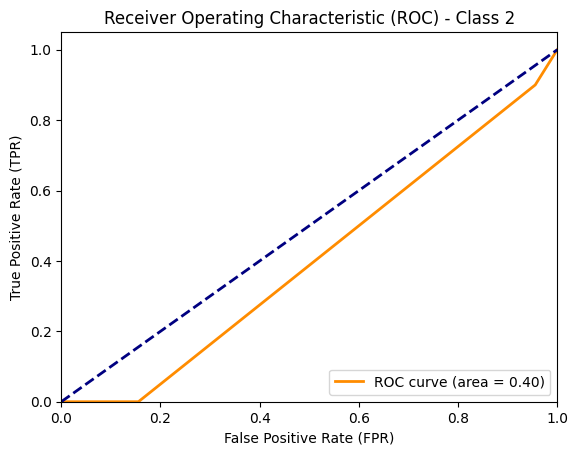

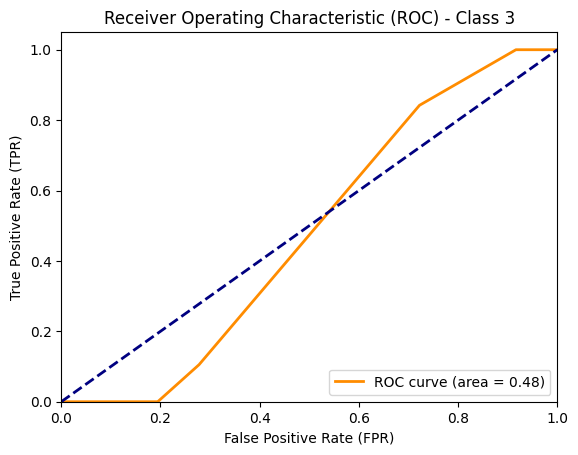

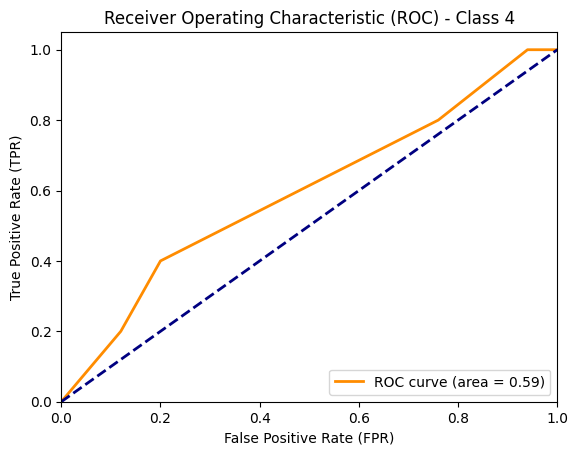

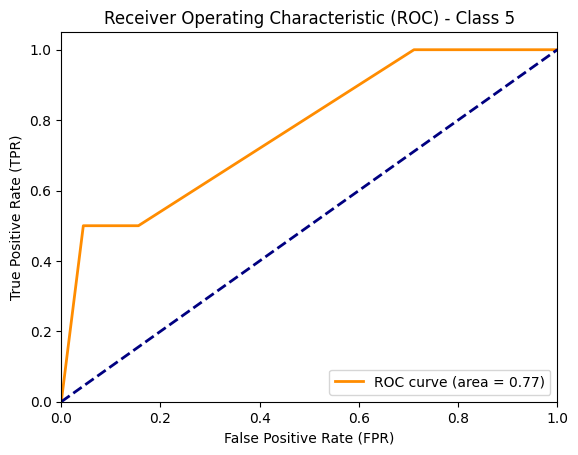

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Inizializza una lista per tenere traccia degli AUC per ciascuna classe
roc_auc = []

# Calcola la ROC curve e l'AUC per ciascuna classe
for class_label in range(1, 6):  # Le classi vanno da 1 a 5
    y_true_class = (y_val == class_label)  # Classe attuale come positiva, altre come negative
    fpr_random, tpr_random, _ = roc_curve(y_true_class, y_pred_loaded)  # Utilizza y_pred_loaded direttamente
    roc_auc_class = auc(fpr_random, tpr_random)
    roc_auc.append(roc_auc_class)

    # Plotta la ROC curve per la classe attuale
    plt.figure()
    plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_class)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) - Class {}'.format(class_label))
    plt.legend(loc='lower right')
    plt.show()


### Decision Tree

In [ ]:
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)
df_val = df_val.drop('name', axis=1)
df_train = df_train.drop('f_hist', axis=1)
df_test = df_test.drop('f_hist', axis=1)
df_val = df_val.drop('f_hist', axis=1)


Best Model - Accuracy: 0.3333333333333333
Best Model - Precision: 0.35410830999066295
Best Model - Recall: 0.3333333333333333
Best Model - F1 Score: 0.3397937422561226


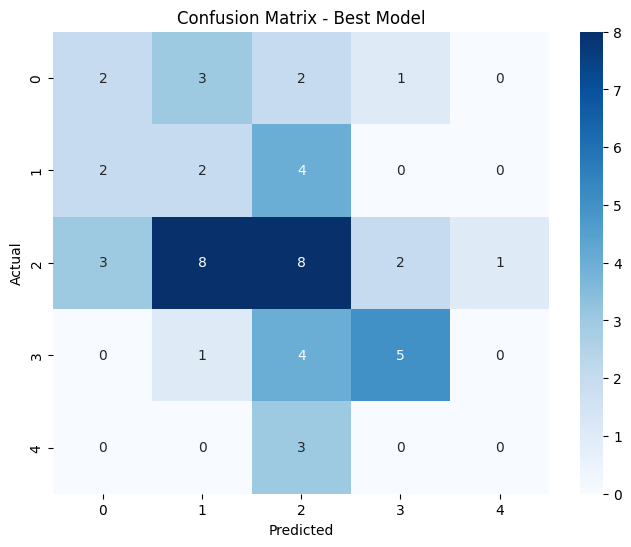

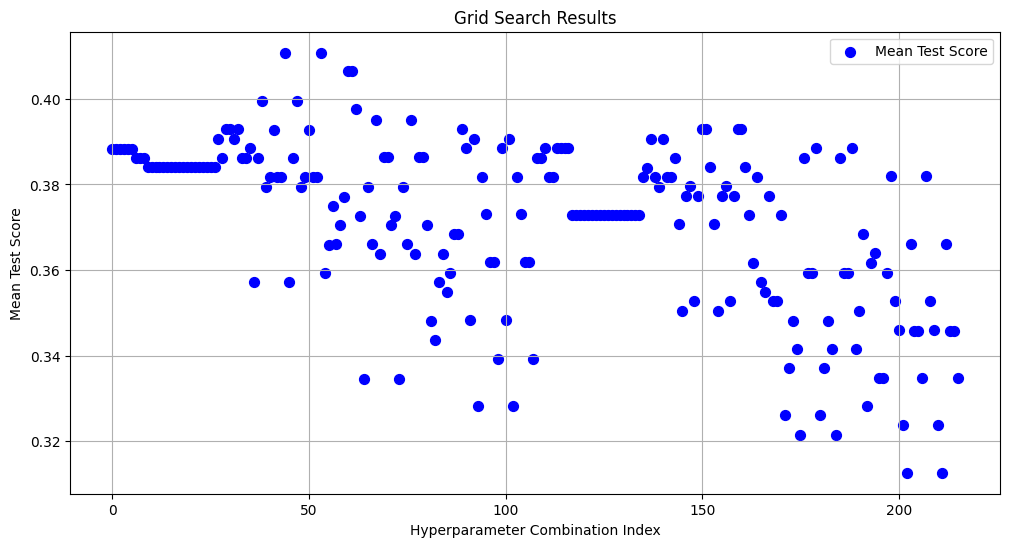


Report di Classificazione del Modello Finale:
              precision    recall  f1-score   support

           1       0.50      0.25      0.33         8
           2       0.40      0.25      0.31         8
           3       0.50      0.73      0.59        22
           4       0.40      0.20      0.27        10
           5       0.00      0.00      0.00         3

    accuracy                           0.43        51
   macro avg       0.36      0.29      0.30        51
weighted avg       0.44      0.43      0.41        51



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Preprocessing dei dati, se necessario

# Divide il dataset in feature (X) e target (y)
X_train = df_train.drop("quality", axis=1)
y_train = df_train["quality"]

X_test = df_test.drop("quality", axis=1)
y_test = df_test["quality"]

# Definisci una griglia di iperparametri da cercare
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Crea il modello Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Crea un oggetto GridSearchCV per la ricerca degli iperparametri
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca degli iperparametri
grid_search.fit(X_train, y_train)

# Restituisci il modello migliore con gli iperparametri ottimali
best_clf = grid_search.best_estimator_

# Valutazione del modello migliore sui dati di test
y_pred = best_clf.predict(X_test)

# Calcola le metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Best Model - Accuracy: {accuracy}")
print(f"Best Model - Precision: {precision}")
print(f"Best Model - Recall: {recall}")
print(f"Best Model - F1 Score: {f1}")

# Plotta la matrice di confusione per il miglior modello
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Model')
plt.show()

# Visualizza i risultati delle varie prove sulla griglia degli iperparametri come grafico a dispersione
results = pd.DataFrame(grid_search.cv_results_)
results = results[['params', 'mean_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(12, 6))
plt.scatter(results.index, results['mean_test_score'], marker='o', s=50, c='blue', label='Mean Test Score')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.grid(True)
plt.legend()
plt.show()



# Stampa il report di classificazione del modello finale
y_pred_final = best_clf.predict(X_test)
report = classification_report(y_test, y_pred_final)
print("\nReport di Classificazione del Modello Finale:")
print(final_classification_rep)


In [ ]:
import numpy as np

# Calcola il discostamento tra i risultati predetti e quelli veri utilizzando y_test invece di y_val
discrepancy = np.abs(y_pred - y_test)

# Calcola il discostamento medio
mean_discrepancy = np.mean(discrepancy)
mean_discrepancy = round(mean_discrepancy, 2)

# Stampa il discostamento medio
print(f"Discostamento Medio: {mean_discrepancy}")


Discostamento Medio: 1.0


**Save**

In [ ]:
import joblib

# Salva il modello in un file
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_decision_tree_model.pkl'
joblib.dump(best_knn, model_filename)

# Stampa un messaggio di conferma
print(f"Modello salvato in: {model_filename}")


Modello salvato in: /content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_decision_tree_model.pkl


**Load**

In [ ]:
# Divide il dataset in feature (X) e target (y)
X_train = df_train.drop("quality", axis=1)
y_train = df_train["quality"]

X_test = df_test.drop("quality", axis=1)
y_test = df_test["quality"]

In [ ]:
import joblib

# Percorso del file del modello precedentemente salvato
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_decision_tree_model.pkl'

# Carica il modello
loaded_model_decision = joblib.load(model_filename)

# Ora puoi utilizzare loaded_model per effettuare previsioni
y_pred_loaded = loaded_model_decision.predict(X_val)
print(y_pred_loaded)



[2 5 5 3 4 4 3 3 3 3 3 3 3 3 3 3 3 2 3 4 5 3 3 3 3 3 2 2 5 5 3 3 1 4 5 5 3
 3 1 3 2 2 3 3 2 2 3 1 2 3 3 3 4 3 2]


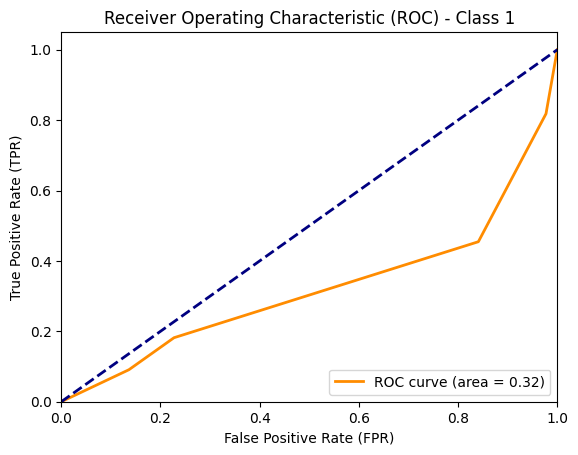

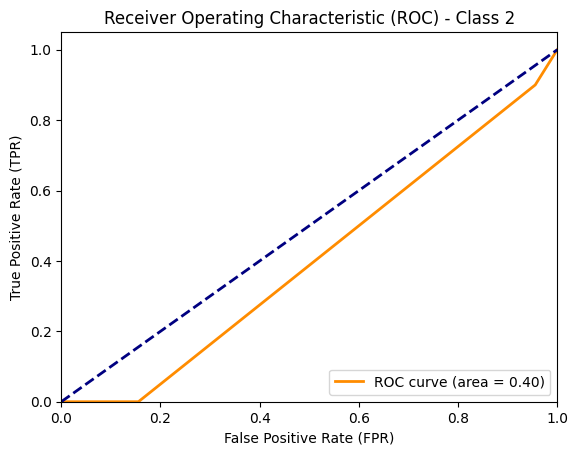

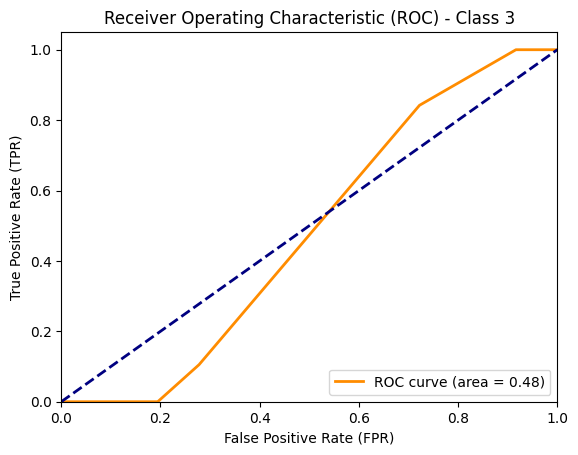

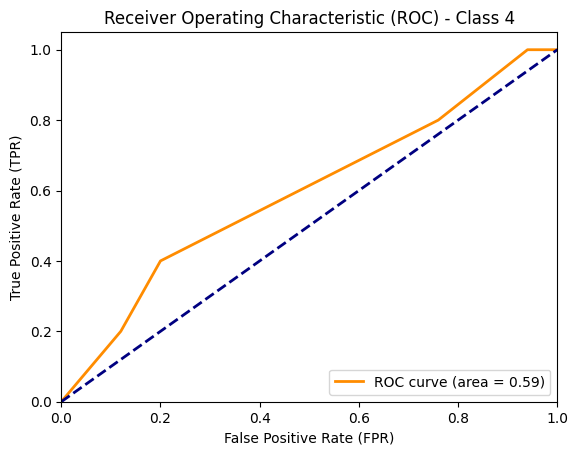

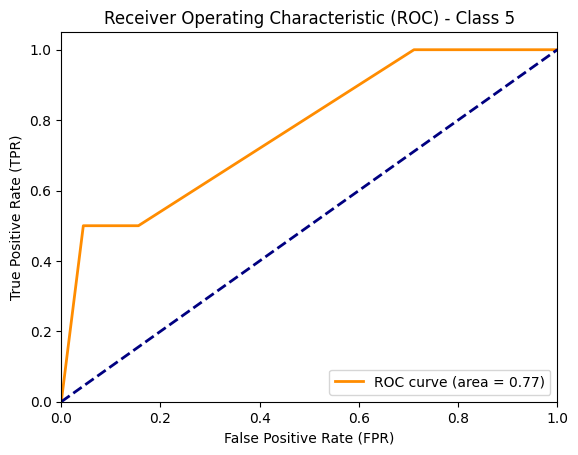

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Inizializza una lista per tenere traccia degli AUC per ciascuna classe
roc_auc = []

# Calcola la ROC curve e l'AUC per ciascuna classe
for class_label in range(1, 6):  # Le classi vanno da 1 a 5
    y_true_class = (y_val == class_label)  # Classe attuale come positiva, altre come negative
    fpr_decision, tpr_decision, _ = roc_curve(y_true_class, y_pred_loaded)  # Utilizza y_pred_loaded direttamente
    roc_auc_class = auc(fpr_decision, tpr_decision)
    roc_auc.append(roc_auc_class)

    # Plotta la ROC curve per la classe attuale
    plt.figure()
    plt.plot(fpr_decision, tpr_decision, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_class)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) - Class {}'.format(class_label))
    plt.legend(loc='lower right')
    plt.show()


### DNN

In [ ]:
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)
df_val = df_val.drop('name', axis=1)
df_train = df_train.drop('f_hist', axis=1)
df_test = df_test.drop('f_hist', axis=1)
df_val = df_val.drop('f_hist', axis=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 517 (2.02 KB)
Trainable params: 517 (2.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
56/56 [==============================] - 2s 7ms/step - loss: 166.5218 - accuracy: 0.1853 - val_loss: 152.8559 - val_accuracy: 0.1273
Epoch 2/50
56/56 [==============================] - 0s 3ms/step - loss: 34.6984 - accuracy: 0.2143 - val_loss: 22.6533 - val_accuracy: 0.1273
Epoc

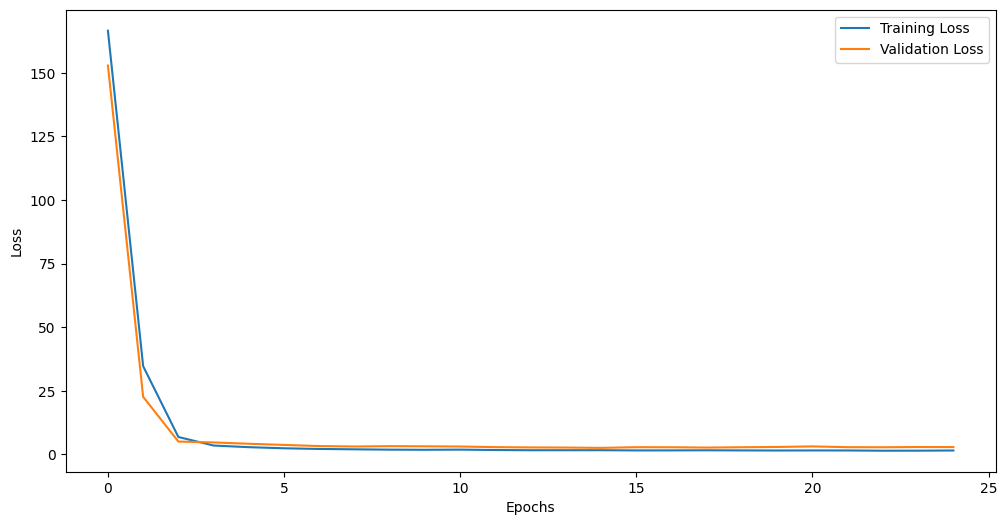

2/2 [==============================] - 0s 6ms/step - loss: 1.8642 - accuracy: 0.4314
Test Loss: 1.8642
Test Accuracy: 0.4314
2/2 [==============================] - 0s 3ms/step


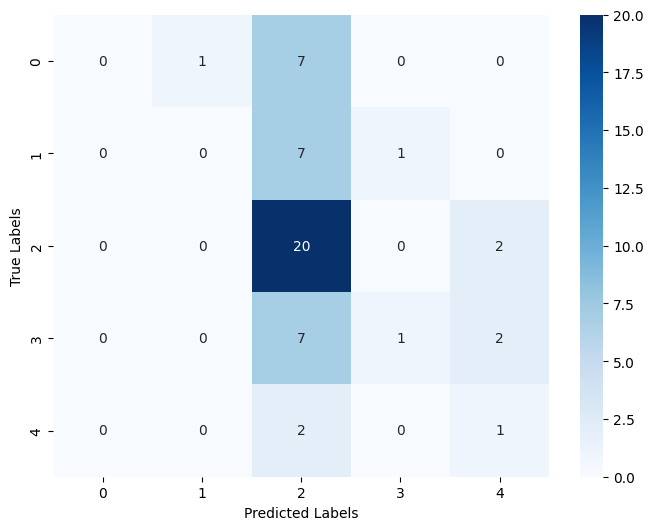

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Estrai le feature e le label
X_train = df_train.drop(columns=['quality'])
y_train = df_train['quality'] - 1  # Sottrai 1 per portare le etichette nel range [0, 4]
X_test = df_test.drop(columns=['quality'])
y_test = df_test['quality'] - 1  # Sottrai 1 per portare le etichette nel range [0, 4]
X_val = df_val.drop(columns=['quality'])
y_val = df_val['quality'] - 1  # Sottrai 1 per portare le etichette nel range [0, 4]



model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Visualizza la struttura della rete neurale
model.summary()
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metrica da monitorare
    patience=10,  # Numero di epoche senza miglioramenti dopo le quali l'addestramento viene interrotto
    restore_best_weights=True  # Ripristina i pesi del modello dal punto di addestramento con la migliore metrica monitorata
)

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])


# Plot della loss durante il fitting
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Valuta il modello sul dataset di test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Matrice di confusione
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import numpy as np

# Calcola il discostamento tra i risultati predetti e quelli veri utilizzando y_test invece di y_val
discrepancy = np.abs(y_pred - y_test)

# Calcola il discostamento medio
mean_discrepancy = np.mean(discrepancy)
mean_discrepancy = round(mean_discrepancy, 2)

# Stampa il discostamento medio
print(f"Discostamento Medio: {mean_discrepancy}")


Discostamento Medio: 1.22


**Save**

In [ ]:
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_DNN_model/'
model.save(model_filename)


**Load**

In [ ]:
from tensorflow.keras.models import load_model
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_DNN_model/'
loaded_model_dnn = load_model(model_filename)
y_pred = loaded_model_dnn.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(y_pred)

### Naive Bayes

In [ ]:
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)
df_val = df_val.drop('name', axis=1)
df_train = df_train.drop('f_hist', axis=1)
df_test = df_test.drop('f_hist', axis=1)
df_val = df_val.drop('f_hist', axis=1)


Report di classificazione completo per il miglior modello:
              precision    recall  f1-score   support

           1       0.57      0.50      0.53         8
           2       0.17      0.12      0.14         8
           3       0.47      0.36      0.41        22
           4       0.00      0.00      0.00        10
           5       0.12      0.67      0.20         3

    accuracy                           0.29        51
   macro avg       0.27      0.33      0.26        51
weighted avg       0.33      0.29      0.29        51



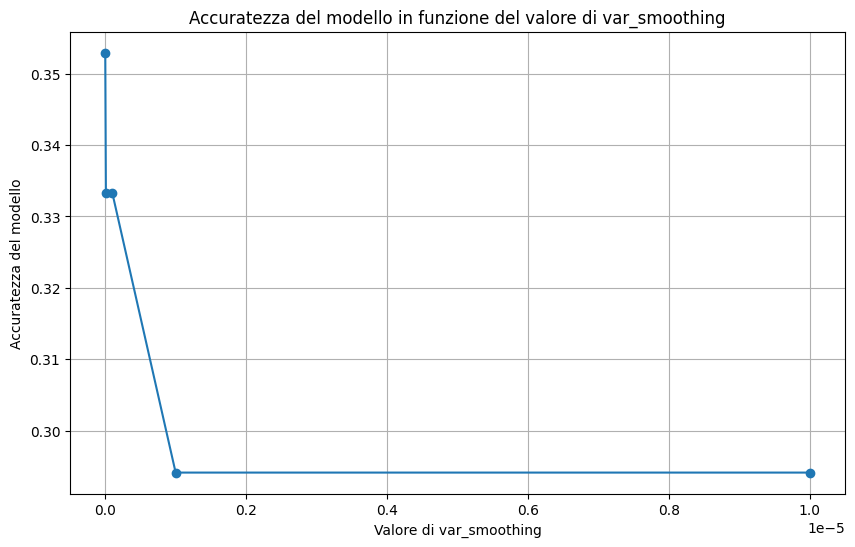

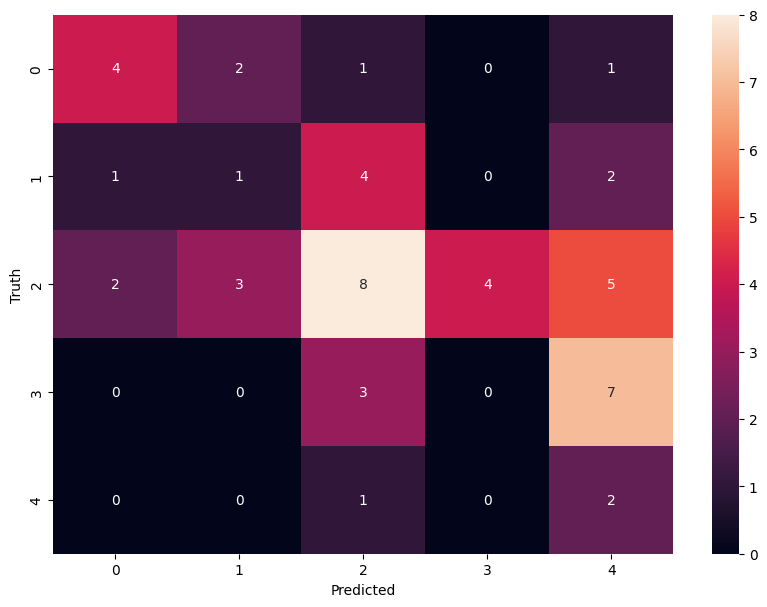

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creazione del classificatore Naive Bayes
clf = GaussianNB()

# Lista di iperparametri da provare
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

# Inizializza la variabile per memorizzare il miglior modello e la sua accuratezza
best_model = None
best_accuracy = 0
accuracies = []

for var_smoothing in var_smoothing_values:
    # Imposta l'iperparametro corrente
    clf.var_smoothing = var_smoothing

    # Allenamento del modello
    clf.fit(df_train.drop('quality', axis=1), df_train['quality'])

    # Predizione sui dati di test e di validazione
    pred_test = clf.predict(df_test.drop('quality', axis=1))
    pred_val = clf.predict(df_val.drop('quality', axis=1))

    # Calcolo dell'accuratezza del modello corrente
    accuracy = accuracy_score(df_test['quality'], pred_test)
    accuracies.append(accuracy)

    # Se l'accuratezza del modello corrente è migliore di quella del miglior modello finora,
    # allora aggiorna il miglior modello e la migliore accuratezza
    if accuracy > best_accuracy:
        best_model = clf
        best_accuracy = accuracy

# Stampa il report di classificazione completo per il miglior modello
print("Report di classificazione completo per il miglior modello:")
print(classification_report(df_test['quality'], best_model.predict(df_test.drop('quality', axis=1))))

# Crea un plot con le accuratezze di tutti i modelli in base ai diversi iperparametri
plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, accuracies, marker='o')
plt.title('Accuratezza del modello in funzione del valore di var_smoothing')
plt.xlabel('Valore di var_smoothing')
plt.ylabel('Accuratezza del modello')
plt.grid(True)
plt.show()



# Plot della matrice di confusione per il set di test
# Calcola la matrice di confusione
cm = confusion_matrix(df_test['quality'], pred_test)

# Visualizza la matrice di confusione
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()





In [ ]:
import numpy as np

# Calcola il discostamento tra i risultati predetti e quelli veri utilizzando y_test invece di y_val
discrepancy = np.abs(y_pred - y_test)

# Calcola il discostamento medio
mean_discrepancy = np.mean(discrepancy)
mean_discrepancy = round(mean_discrepancy, 2)

# Stampa il discostamento medio
print(f"Discostamento Medio: {mean_discrepancy}")


Discostamento Medio: 0.92


**Save**

In [ ]:
# Salva il modello in un file
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_naive_bayes_model.pkl'
joblib.dump(best_model, model_filename)

# Stampa un messaggio di conferma
print(f"Modello salvato in: {model_filename}")


Modello salvato in: /content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_naive_bayes_model.pkl


**Load**

In [ ]:
import joblib

# Percorso del file del modello precedentemente salvato
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_naive_bayes_model.pkl'

# Carica il modello
loaded_model = joblib.load(model_filename)




print(loaded_model.predict(df_test.drop(['quality', 'name'], axis=1)))


[1 5 4 4 4 4 4 4 5 1 4 2 1 3 4 4 1 5 4 4 5 1 4 2 4 4 4 5 2 4 1 4 4 4 5 4 2
 3 3 4 4 5 4 1 4 4 4 4 2 2 4]


In [ ]:
import joblib

# Percorso del file del modello precedentemente salvato
model_filename = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_naive_bayes_model.pkl'

# Carica il modello
loaded_model_bayes = joblib.load(model_filename)

y_pred_loaded = loaded_model_bayes.predict(df_test.drop(['quality', 'name'], axis=1))
print(y_pred_loaded)

[1 5 4 4 4 4 4 4 5 1 4 2 1 3 4 4 1 5 4 4 5 1 4 2 4 4 4 5 2 4 1 4 4 4 5 4 2
 3 3 4 4 5 4 1 4 4 4 4 2 2 4]


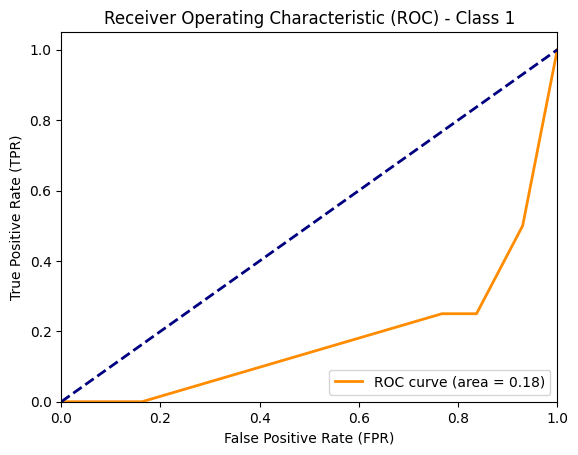

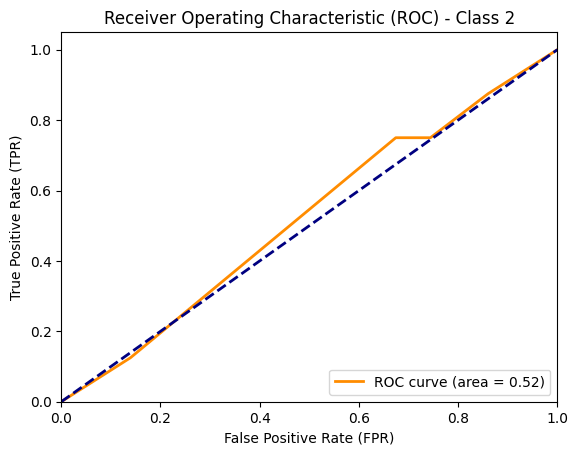

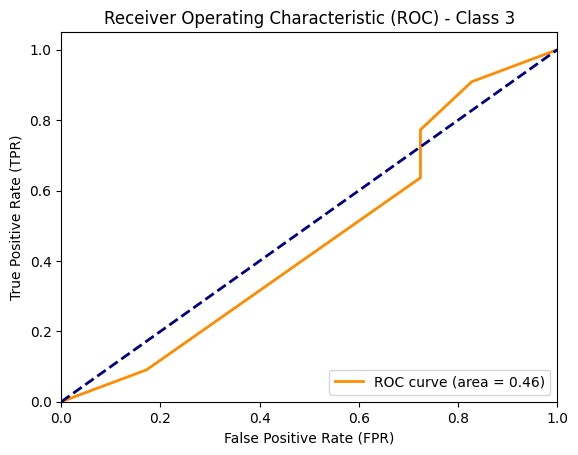

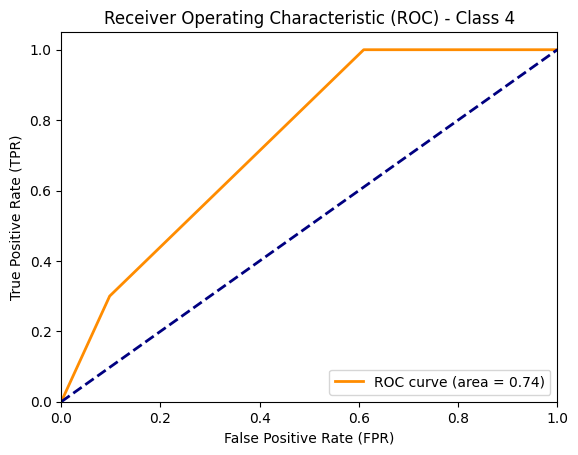

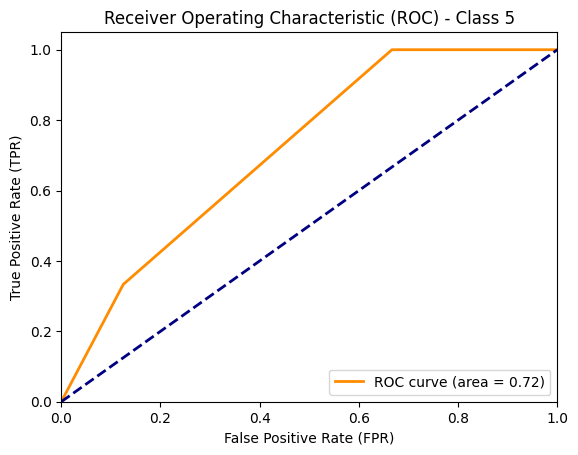

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Inizializza una lista per tenere traccia degli AUC per ciascuna classe
roc_auc = []

# Calcola la ROC curve e l'AUC per ciascuna classe
# Calcola la ROC curve e l'AUC per ciascuna classe
for class_label in range(1, 6):  # Le classi vanno da 1 a 5
    y_true_class = (df_test['quality'] == class_label)  # Classe attuale come positiva, altre come negative
    fpr_bayes, tpr_bayes, _ = roc_curve(y_true_class, y_pred_loaded)  # Utilizza y_pred_loaded direttamente
    roc_auc_class = auc(fpr_bayes, tpr_bayes)
    roc_auc.append(roc_auc_class)
    # Plotta la ROC curve per la classe attuale
    plt.figure()
    plt.plot(fpr_bayes, tpr_bayes, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_class)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) - Class {}'.format(class_label))
    plt.legend(loc='lower right')
    plt.show()


##Choose the best Model

In [ ]:
from tensorflow.keras.models import load_model
import joblib

#naive bayas
naive_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_naive_bayes_model.pkl'
naive_model = joblib.load(naive_path)

#decision tree
decision_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_decision_tree_model.pkl'
decision_model = joblib.load(decision_path)

#random tree
random_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_random_forest_model.pkl'
random_model = joblib.load(random_path)

#KNN
knn_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_knn_model.pkl'
knn_model = joblib.load(knn_path)

#DNN
dnn_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/models/best_DNN_model/'
dnn_model = load_model(dnn_path)


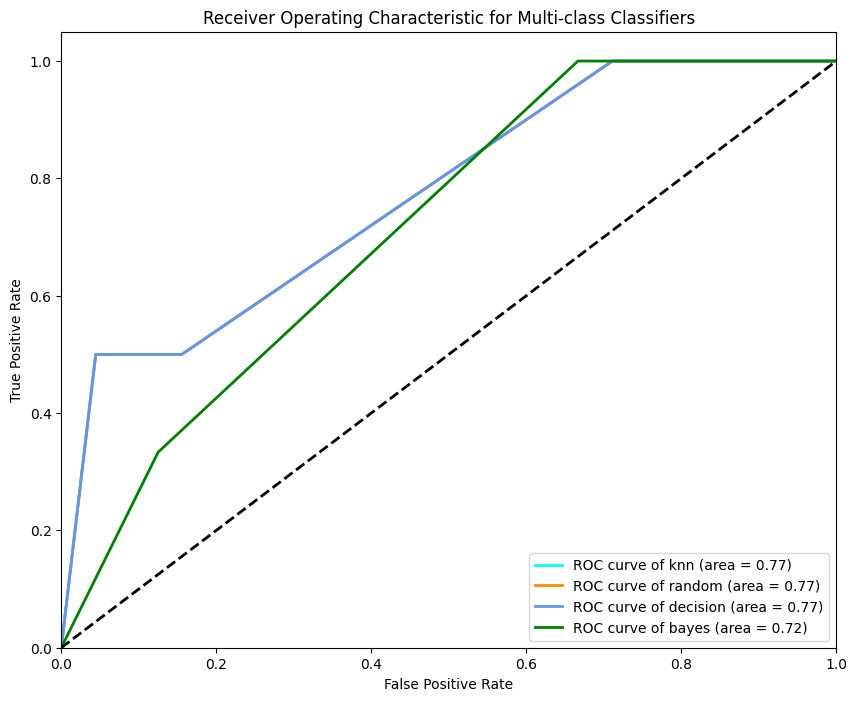

The best classifier is: knn


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# First, let's define your false positive rate and true positive rate for each classifier
fpr = {
    'knn': fpr_knn,
    'random': fpr_random,
    'decision': fpr_decision,
    'bayes': fpr_bayes
}

tpr = {
    'knn': tpr_knn,
    'random': tpr_random,
    'decision': tpr_decision,
    'bayes': tpr_bayes
}

# Then, we'll calculate the AUC for each classifier
roc_auc = {key: auc(fpr[key], tpr[key]) for key in fpr.keys()}

# We'll use these to cycle through the colors when plotting
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])

plt.figure(figsize=(10, 8))

# Now, let's plot the ROC curve for each classifier
for (key, color) in zip(fpr.keys(), colors):
    plt.plot(fpr[key], tpr[key], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'.format(key, roc_auc[key]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class Classifiers')
plt.legend(loc="lower right")
plt.show()

# Finally, let's find and print the best classifier
best_classifier = max(roc_auc, key=roc_auc.get)
print(f"The best classifier is: {best_classifier}")


## Code to assign a quality measure to UML feature with previous mapping

In [ ]:
import pandas as pd

# Specifica il percorso del file CSV
train_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/train/train2.csv'
test_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/test/test2.csv'
validation_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/validation/validation2.csv'
label_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/label/label.csv'
mapping_path = '/content/drive/My Drive/dataset_full_labelled/second_model_dataset/name_mapping.csv'

# Carica il file CSV in un DataFrame
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_val = pd.read_csv(validation_path)
df_label = pd.read_csv(label_path)
df_mapping = pd.read_csv(mapping_path)


In [ ]:
# Crea un dizionario dal DataFrame 'df_mapping'
mapping_dict = pd.Series(df_mapping['Old Name'].values,index=df_mapping['New Name']).to_dict()

# Allo stesso modo, crea un dizionario dal DataFrame 'df_label'
label_dict = pd.Series(df_label.Quality.values,index=df_label['name']).to_dict()

def map_quality(df):
    rows_to_drop = []
    for i, row in df.iterrows():
        name = row['name']
        old_name = mapping_dict.get(name)
        if old_name:
            quality = label_dict.get(old_name)
            if quality:
                df.at[i, 'Quality'] = quality
            else:
                rows_to_drop.append(i)
        else:
            rows_to_drop.append(i)
    df.drop(rows_to_drop, inplace=True)


# Apply the function to the DataFrames
map_quality(df_train)
map_quality(df_test)
map_quality(df_val)

In [ ]:
# Salva il DataFrame in un file CSV
df_train.rename(columns={'Quality': 'quality'}, inplace=True)
df_train['quality'] = df_train['quality'].astype(int)

df_train.to_csv('/content/drive/My Drive/dataset_full_labelled/second_model_dataset/train/train_labelled2.csv')
# Salva il DataFrame in un file CSV
df_test.rename(columns={'Quality': 'quality'}, inplace=True)
df_test['quality'] = df_test['quality'].astype(int)

df_test.to_csv('/content/drive/My Drive/dataset_full_labelled/second_model_dataset/test/test_labelled2.csv')
# Salva il DataFrame in un file CSV
df_val.rename(columns={'Quality': 'quality'}, inplace=True)
df_val['quality'] = df_val['quality'].astype(int)

df_val.to_csv('/content/drive/My Drive/dataset_full_labelled/second_model_dataset/validation/validation_labelled2.csv')


# FINAL APPLICATION

##Load Model

**Load First Model**

In [13]:
import torch

# Definisci il percorso del file salvato
path = "/content/drive/MyDrive/final_model/first_model/uml_weights.pth"
categories = ['class', 'arrow' , 'cross' , 'line']

# Carica il modello
model = core.Model.load(path, categories)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:05<00:00, 29.6MB/s]


## Load Extractor

**INFO IMAGE**

In [14]:
import cv2
import matplotlib.pyplot as plt

class diagram_feature_extractor:
    def __init__(self, image_path):
        self.image_path = image_path

    def get_color_histogram(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola l'istogramma dei valori di intensità (grigi) nell'immagine
        histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

        # Normalizza l'istogramma dividendo per il numero totale di pixel nell'immagine
        total_pixels = img.shape[0] * img.shape[1]
        histogram_normalized = histogram / total_pixels

        # Imposta a zero i valori dell'istogramma che sono inferiori a 1e-02
        histogram_normalized[histogram_normalized < 1e-02] = 0.00

        return histogram_normalized

    def get_contrast(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola la deviazione standard dei valori dei pixel
        contrast = img.std()

        return contrast

    def get_blur(self):
        # Leggi l'immagine in scala di grigi utilizzando OpenCV
        img = cv2.imread(self.image_path, 0)

        # Calcola il Laplaciano dell'immagine
        lap = cv2.Laplacian(img, cv2.CV_64F)

        # Calcola la varianza dei valori dei pixel
        blur = lap.var()

        # Normalizza la sfocatura dividendo per il numero totale di pixel nell'immagine
        total_pixels = img.shape[0] * img.shape[1]
        blur_normalized = blur / total_pixels

        return blur_normalized


    def show_histogram(self):
        histogram = self.get_color_histogram()
        plt.plot(histogram)
        plt.show()

    def aspect_ratio(self):
        img = cv2.imread(self.image_path, 0)
        height, width = img.shape
        aspect_ratio = width/height
        return aspect_ratio




**CLASS IMAGE**

In [15]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.

'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint

class class_feature_extractor:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'class'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()

    #step1
    def compute_class_accuracy(self):

      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]
      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}

      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, self.iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]
      return filtered_boxes,filtered_labels



    def segment_uml_class(self, coordinates):
        xmin, ymin, xmax, ymax = map(int, coordinates)
        img = self.image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width
        return area

    #compute and create a list with all class areas
    def compute_areas(self):
        i = 0
        list_areas=[]
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
            if fl == 'class':
                i += 1
                list_areas.append(self.segment_uml_class(fb))
            else:
                captured_reln.append(fl)

        return list_areas

    #ratio between class Area and total imae Area
    def calculate_coverage(self):
        areaTot = 0
        i = 0
        height, width, channels = self.image.shape
        areaImage = height * width
        captured_reln = []
        list_areas = self.compute_areas()
        for area in list_areas:
          areaTot += area

        coverageArea = areaTot / areaImage
        result = round(coverageArea, 3)
        return result
    import math

    def calculate_std_deviation(self):
        list_areas = self.compute_areas()
        n = len(list_areas)
        mean = sum(list_areas) / n
        variance = sum((x - mean) ** 2 for x in list_areas) / n
        std_deviation = math.sqrt(variance)
        percentage_std_deviation = (std_deviation / mean) * 100
        percentage_std_deviation = round(percentage_std_deviation,3)
        return percentage_std_deviation

    def calculate_n_class(self):
      list_areas = self.compute_areas()
      return len(list_areas)

    #voglio normalizzare il valore della media delle aree rispetto alla grandezza dell'immagine
    def calculate_avg_area(self):
        list_areas = self.compute_areas()
        mean_area = mean(list_areas)  # Rinomina la variabile 'mean' in 'mean_area'
        height, width, channels = self.image.shape
        areaImage = height * width
        normalized_area = mean_area / areaImage
        normalized_area = round(normalized_area,3)
        return normalized_area

    def calculate_aspect_ratio(self):
      height, width, channels = self.image.shape
      aspect_ratio = width/height
      aspect_ratio = round(aspect_ratio,2)
      return aspect_ratio



    def show_class(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'class':
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            height, width, channels = img.shape
            area = height * width
            imgplot = plt.imshow(img)
            plt.show()

    def capture_coordinates(self):
      captured_reln = []
      captured_coordinates = []  # Lista per salvare le tuple ottenute

      for fb, fl in zip(self.filtered_boxes, self.filtered_labels):
          if fl == 'class':
              xmin, ymin, xmax, ymax = map(int, fb)
              captured_coordinates.append((xmin, ymin, xmax, ymax))  # Aggiungi la tupla alla lista
          else:
              captured_reln.append(fl)
      return captured_coordinates


    def compute_center_dist(self , rect1, rect2):
      # Calcola il centro del primo rettangolo
      x1 = (rect1[0] + rect1[2]) / 2
      y1 = (rect1[1] + rect1[3]) / 2

      # Calcola il centro del secondo rettangolo
      x2 = (rect2[0] + rect2[2]) / 2
      y2 = (rect2[1] + rect2[3]) / 2

      # Calcola la distanza euclidea tra i centri dei rettangoli
      dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

      return dist

    def calculate_proximity(self):
        captured_coordinates = self.capture_coordinates()
        total_dist = 0
        n_rect = len(captured_coordinates)
        # itera su tutte le possibili coppie uniche di rettangoli presenti nella lista captured_coordinates
        # calcolare ogni distanza tra i centri dei rettangoli solo una volta
        for i in range(n_rect):
            for j in range(i + 1, n_rect):
                dist = self.compute_center_dist(captured_coordinates[i], captured_coordinates[j])
                total_dist += dist

        if n_rect > 1:
            # consideriamo le combinazioni
            # rappresenta il numero di modi in cui possiamo scegliere 2 rettangoli da numero_rettangoli senza ripetizioni e senza considerare l'ordine
            proximity = total_dist / (n_rect * (n_rect - 1) / 2)
        else:
            proximity = 0
        proximity = round(proximity,3)
        return proximity



    def calculate_rectangle_area(self , xmin, ymin, xmax, ymax):
      return (xmax - xmin) * (ymax - ymin)

    #compute the area covered by all rect in a specific quadrant
    def calculate_section_area(self , quadrant, rectangles):
      x_min_section, y_min_section, x_max_section, y_max_section = quadrant
      quadrant_area = self.calculate_rectangle_area(x_min_section, y_min_section, x_max_section, y_max_section)
      section_area = 0
      for rectangle in rectangles:
          x_min, y_min, x_max, y_max = rectangle

          # Calculate the intersection area between the rectangle and the section
          x_intersection_min = max(x_min, x_min_section)
          y_intersection_min = max(y_min, y_min_section)
          x_intersection_max = min(x_max, x_max_section)
          y_intersection_max = min(y_max, y_max_section)

          # Check if there is an intersection between the rectangle and the section
          if x_intersection_min < x_intersection_max and y_intersection_min < y_intersection_max:
              section_area += self.calculate_rectangle_area(x_intersection_min, y_intersection_min, x_intersection_max, y_intersection_max)

      coverage_percent = (section_area / quadrant_area) * 100
      coverage_percent = round(coverage_percent,3)
      return coverage_percent

    #all rect and all quadrants are taken into account , then is computed the variance
    def calculate_class_distribution(self):
        image_height, image_width, channels = self.image.shape
        rectangles = self.capture_coordinates()
        # Calculate the coordinates of the four quadrants
        center_x = image_width // 2
        center_y = image_height // 2

        quadrants = [
            (0, 0, center_x, center_y),
            (center_x, 0, image_width, center_y),
            (0, center_y, center_x, image_height),
            (center_x, center_y, image_width, image_height)
        ]

        # Calculate the total area of the image
        total_image_area = self.calculate_rectangle_area(0, 0, image_width, image_height)

        # Calculate the area covered by rectangles for each quadrant
        covered_areas = [self.calculate_section_area(quadrant, rectangles) for quadrant in quadrants]

        # Calculate the variance of the covered areas
        variance = np.var(covered_areas)
        variance = round(variance,3)

        return variance


**CROSS INFO**

In [16]:
import numpy as np
import torchvision
import torch
from pprint import pprint
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt


class class_cross_extraction:
  def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
    self.image = image
    self.acc_threshold = acc_threshold
    self.iou_threshold = iou_threshold
    self.desired_class = desired_class
    self.filtered_boxes,self.filtered_labels = self.compute_cross_filter()

  #step1
  def compute_cross_accuracy(self):
    predictions = model.predict(image)
    labels, boxes, scores = predictions

    # Filter the predictions to keep only the "cross" class
    desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

    labels = [labels[idx] for idx in desired_idx]
    boxes, scores = boxes[desired_idx], scores[desired_idx]

    # Count the elements for the "cross" class
    elements_per_class = {self.desired_class: len(boxes)}
    return labels, boxes, scores

  #step2
  def compute_cross_filter(self):
    labels_map = { 'class': 1,
    'arrow': 2,
    'cross': 3,
    'line': 4
    }
    labels, boxes, scores = self.compute_cross_accuracy()
    int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype=torch.int)
    keep = torchvision.ops.nms(boxes, scores, self.iou_threshold)
    filtered_boxes, filtered_scores = boxes[keep], scores[keep]
    filtered_labels = [labels[idx] for idx in keep]


    if len(filtered_boxes) > 0:
        largest_box_idx = torch.argmax((filtered_boxes[:, 2] - filtered_boxes[:, 0]) * (filtered_boxes[:, 3] - filtered_boxes[:, 1]))
        filtered_boxes = filtered_boxes[largest_box_idx].unsqueeze(0)
        filtered_labels = [filtered_labels[largest_box_idx]]
        filtered_scores = [filtered_scores[largest_box_idx]]
    else:
        filtered_boxes = torch.empty((0, 4))
        filtered_labels = []
        filtered_scores = []

    return filtered_boxes,filtered_labels


  #step 3
  def show_cross(self):
    filtered_boxes,filtered_labels = self.compute_cross_filter()
    for fb, fl in zip(filtered_boxes,filtered_labels):
      if fl == 'cross':
        xmin, ymin, xmax, ymax = map(int, fb)
        img = image.copy()[ymin: ymax, xmin: xmax]
        height, width, channels = img.shape
        area = height * width



  def compute_n_cross(self):
    #filtered_boxes,filtered_labels = self.compute_cross_filter()
    count = 0
    for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
      if fl == 'cross':
        count = count +1
    return count



  #avg absolut angles of crossing angles among the entire scheme image
  def compute_crossing_angles(self):
      list_images = []
      list_slopes = []
      filtered_boxes, filtered_labels = self.compute_cross_filter()
      for fb, fl in zip(filtered_boxes, filtered_labels):
          if fl == 'cross':
              xmin, ymin, xmax, ymax = map(int, fb)
              img = self.image.copy()[ymin: ymax, xmin: xmax]
              list_images.append(img)
              height, width, channels = img.shape
              area = height * width

      for cross_img in list_images:
          height, width, channel = cross_img.shape
          img = cv2.cvtColor(cross_img, cv2.COLOR_BGR2GRAY)
          out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
          # applico il filtro gaussiano per il noise
          img = 255 - cv2.medianBlur(img, 3)

          theta_resolution_degrees = 1
          theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
          min_size = min(height, width)
          threshold = math.floor(0.2 * min_size)
          lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 10, minLineLength=threshold, maxLineGap=1)
          if lines is None:  # Check if lines is None
            return 0  # Or any other value that indicates no lines were found
          count = 0
          for line in lines:
              for x1, y1, x2, y2 in line:
                  cv2.line(out, (x1, y1), (x2, y2), (0, 0, 255), 2)
                  slope_rad = np.arctan2(y2 - y1, x2 - x1)
                  slope_deg = np.degrees(slope_rad)
                  list_slopes.append(abs(slope_deg))
              count += 1


      if list_slopes:  # Check if the list is not empty before computing the mean
          average = mean(list_slopes)
          average = round(average, 3)
          return average
      else:
          return 0  # Return a default value or handle it as needed






**ARROW INFO**

In [17]:
'''
iou_threshold
dopo aver fatto la detection , sopprimiamo tutti i box con IOU maggiore di una soglia
iou = Area di intersezione (Intersection Area, IA): Questa è l'area in comune tra due bounding box.
Un IoU uguale a 1 indica che i due bounding box si sovrappongono completamente,
mentre un IoU pari a 0 indica che i due bounding box non hanno sovrapposizione.
'''
import math
from statistics import mean
import numpy as np
import torchvision
import torch
from pprint import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.spatial import distance
import math
from statistics import mean


from scipy.spatial import distance
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

class arrow_feature_extractor_HP:
    def __init__(self, image ,acc_threshold,  iou_threshold , desired_class):
        self.image = image
        self.acc_threshold = acc_threshold #acc_threshold = 0.70
        self.iou_threshold = iou_threshold #iou_threshold = 0.2
        self.desired_class = desired_class #desired_class = 'arrow'
        self.filtered_boxes,self.filtered_labels = self.compute_class_filter()
        self.list_lenght , self.list_bends , self.list_slope_list = self.find_lenght_bends_slopes()

    #step1
    def compute_class_accuracy(self):
      print("Image Shape: ", image.shape)
      predictions = model.predict(image)
      labels, boxes, scores = predictions

      # Filter the predictions to keep only the "cross" class
      desired_idx = [idx for idx, (label, score) in enumerate(zip(labels, scores)) if score >= self.acc_threshold and label == self.desired_class]

      labels = [labels[idx] for idx in desired_idx]
      boxes, scores = boxes[desired_idx], scores[desired_idx]

      # Count the elements for the "cross" class
      elements_per_class = {self.desired_class: len(boxes)}

      return labels, boxes, scores

    #step2
    def compute_class_filter(self):
      labels, boxes, scores = self.compute_class_accuracy()
      labels_map = { 'class': 1,
      'arrow': 2,
      'cross': 3,
      'line': 4
      }
      int_labels = torch.tensor(list(map(labels_map.get, labels)), dtype= torch.int)
      keep = torchvision.ops.nms(boxes, scores, self.iou_threshold)
      filtered_boxes, filtered_scores = boxes[keep], scores[keep]
      filtered_labels = [labels[idx] for idx in keep]

      return filtered_boxes,filtered_labels


    def show_arrow(self ):
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow' or f1 == 'line' :
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]



    def get_arrow(self ):
        images_to_return = []  # Lista per salvare le immagini elaborate
        for fb, fl in zip(self.filtered_boxes,self.filtered_labels):
          if fl == 'arrow' or f1 == 'line' :
            xmin, ymin, xmax, ymax = map(int, fb)
            img = self.image.copy()[ymin: ymax, xmin: xmax]
            images_to_return.append(img)  # Aggiungi l'immagine elaborata alla lista
        return images_to_return

    # Funzione per calcolare tutti i punti intermedi delle linee
    # usata per calcolare le linee vicine
    def intermediate_points(self , line):
        x1, y1, x2, y2 = line[0]
        points = []
        dx = abs(x2 - x1)
        dy = abs(y2 - y1)
        steps = max(dx, dy)
        if steps == 0:
            return [(x1, y1)]
        x_inc = (x2 - x1) / steps
        y_inc = (y2 - y1) / steps
        for i in range(steps + 1):
            points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
        return points


    # Funzione per controllare se due linee hanno almeno un punto vicino tra loro
    def are_lines_close(self,line1, line2, threshold=6):
        points_line1 = self.intermediate_points(line1)
        points_line2 = self.intermediate_points(line2)

        for x1, y1 in points_line1:
            for x2, y2 in points_line2:
                dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                if dist <= threshold:
                    return True
        return False


    def connect_lines(self , image):
        height, width, channel = image.shape
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        #applico il filtro gaussiano per il noise
        img = 255 - cv2.medianBlur(img, 3)

        theta_resolution_degrees = 45
        theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
        min_size = min(height, width)
        threshold_min = math.floor(0.05 * min_size)
        threshold_max = 20
        lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 15, minLineLength=threshold_min, maxLineGap=threshold_max) #img , 1 , theta = 45 , 20 , 0.2 , 2


        if lines is None:  # Check if lines is None
          print("No lines were found in the image.")
          out = 0
          total_length = 0
          bends = 0
          slope_list = [0]
          return out, total_length , bends , slope_list

        colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]
        centers = []
        for line in lines:
            for x1, y1, x2, y2 in line:
                center_x = round((x1 + x2) / 2)
                center_y = round((y1 + y2) / 2)
                centers.append((center_x, center_y))

        grouped_lines = {}
        for i, (center_x, center_y) in enumerate(centers):
            grouped = False
            for center, group in grouped_lines.items():
                if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                    group.append(lines[i])
                    grouped = True
                    break
            if not grouped:
                grouped_lines[(center_x, center_y)] = [lines[i]]

        selected_lines = []
        for group in grouped_lines.values():
            longest_length = 0
            longest_line = None
            for line in group:
                for x1, y1, x2, y2 in line:
                    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                    if length > longest_length:
                        longest_length = length
                        longest_line = line
            if longest_line is not None:
                selected_lines.append(longest_line)

        connected_lines = []
        for i, line1 in enumerate(selected_lines):
            connected = False
            for j, line2 in enumerate(selected_lines):
                if i != j:
                    if self.are_lines_close(line1, line2, threshold=10): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                        connected = True
                        break
            if connected:
                connected_lines.append(line1)

        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
                cv2.line(out, (x1, y1), (x2, y2), color, 2)
        # Create a list to store slopes for each image
        slope_list = []
        total_length = 0
        bends = 0
        for line in connected_lines:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                total_length += length
                # Calculate the slope of the line
                if x2 - x1 == 0:
                    slope = float('90')
                else:
                    slope = (y2 - y1) / (x2 - x1)
                # Append the slope to the slope_list
                slope_list.append(slope)
            bends+=1
        return out, total_length , bends , slope_list


    def find_lenght_bends_slopes(self):
        # Lista di immagini
        images = self.get_arrow()
        # Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
        list_length = []
        list_bends = []
        list_slope_list = []
        # Applica l'algoritmo a ciascuna immagine
        for image in images:
            slope_list  = []
            result_image, total_length , bends , slope_list = self.connect_lines(image)
            if total_length != 0:
              list_length.append(total_length)
              list_bends.append(bends)
              list_slope_list.append(slope_list)
            #unconment to see plot

        return list_length , list_bends , list_slope_list





    def compute_n_arrow(self):
        return len(self.list_lenght)


    def compute_line_bends(self):
        n_line = self.compute_n_arrow()
        if n_line != 0:
          total_bends = sum(self.list_bends)
          line_bends = total_bends/n_line
          line_bends = round(line_bends,3)
          return line_bends
        else:
          line_bends = 0
          return line_bends


    def compute_avg_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        average = mean(self.list_lenght)
        average  = round(average,3)
        return average

    def compute_max_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        max_value = max(self.list_lenght)
        return max_value

    def compute_min_arrow_lenght(self):
        if not self.list_lenght:
            return 0  # Return 0 for an empty list to avoid division by zero
        min_value = min(self.list_lenght)
        return min_value


    def compute_std_deviation(self):
        if len(self.list_lenght) < 2:
            return 0  # Return 0 for lists with fewer than two elements
        mean_value = statistics.mean(self.list_lenght)
        standard_deviation = statistics.stdev(self.list_lenght)
        standard_deviation_percentage = (standard_deviation / mean_value) * 100
        standard_deviation_percentage = round(standard_deviation_percentage,3)
        return standard_deviation_percentage


    def compute_line_angles(self):
        average_angles = []
        for slope_list in self.list_slope_list:
            if slope_list:  # Check if slope_list is not empty
                avg = mean(slope_list)
                average_angles.append(avg)
        if average_angles:  # Check if average_angles is not empty
            tot_avg = mean(average_angles)
            tot_avg = round(tot_avg,3)
            return tot_avg
        else:
            return 0  # Or any other value that indicates no angles were found

    def compute_line_ortogonality(self):
        # Initialize an empty list to contain the values of the simple list
        flat_list_angles = []
        sum = 0
        # Concatenate the elements of each internal list in the simple list
        for sublist in self.list_slope_list:
            flat_list_angles.extend(sublist)
        tot_lines = len(flat_list_angles)
        if tot_lines == 0:  # Check if tot_lines is zero
            return 0  # Or any other value that indicates no lines were found
        for angle in flat_list_angles:
            if angle == "90.0" or angle == "0.0":
                n = 0
            else:
                n = 1
            sum = sum + n

        return sum/tot_lines



## Use First Model

In [18]:
import os
import glob
import pandas as pd

df_to_predict = pd.DataFrame(columns=['name','f1','f2','f3','f4','f5','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f_aspect','f_contrast','f_blur','f_hist'])

# Definisci il percorso della cartella
path = '/content/drive/My Drive/final_model/INSERT_IMAGES/'

# Utilizza glob per ottenere una lista di tutti i file con estensione .png o .jpg
images = glob.glob(os.path.join(path, '*.png')) + glob.glob(os.path.join(path, '*.jpg'))


# Itera su tutte le immagini
for image_path in images:
    print(image_path)
    image=utils.read_image(image_path)
    # Esegui qui le operazioni desiderate per ciascuna immagine
    filename = os.path.basename(str(image_path)) #solo nome dell'immagine

    #__________________INFO______________
    # Percorso dell'immagine
    feature_extractor = diagram_feature_extractor(image_path)

    #_______________CLASS_______________
    # Creazione dell'oggetto UMLClassSegmenter
    acc_threshold_class = 0.7
    iou_threshold_class=0.2
    desired_class_class = 'class'
    class_extractor = class_feature_extractor(image,acc_threshold_class,iou_threshold_class,desired_class_class)

    #_______________CROSS______________________
    #STEP BY STEP COMPUTATION
    acc_threshold_cross = 0.12
    iou_threshold_cross=0.3
    desired_class_cross = 'cross'
    cross_extraction = class_cross_extraction(image,acc_threshold_cross,iou_threshold_cross,desired_class_cross)

    #_______________ARROW________________
    # Creazione dell'oggetto UMLClassSegmenter
    acc_threshold_arrow = 0.6
    iou_threshold_arrow=0.2
    desired_class_arrow = 'arrow'
    arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold_arrow,iou_threshold_arrow,desired_class_arrow)



    '''
    ____________CLASS INFO_____________
    '''
    # Stampa del risultato
    f11 = class_extractor.calculate_coverage()
    f12 = class_extractor.calculate_aspect_ratio()
    f16 = class_extractor.calculate_std_deviation()
    f17 = class_extractor.calculate_n_class()
    f15 = class_extractor.calculate_avg_area()
    f14 = class_extractor.calculate_proximity()
    f13 = class_extractor.calculate_class_distribution()

    '''
    _______________IMAGE INFO__________
    '''
    # Creazione dell'oggetto histogram__feature_extractor
    f_aspect = feature_extractor.aspect_ratio()
    f_contrast = feature_extractor.get_contrast()
    f_blur = feature_extractor.get_blur()
    f_hist = feature_extractor.get_color_histogram()

    '''
    _____________________CROSS_________________
    '''
    f1 = cross_extraction.compute_n_cross()
    f2 = cross_extraction.compute_crossing_angles()

    '''
    _____________________ARROW_______________
    '''
    f18 = arrow_extractor.compute_n_arrow()
    f7 = arrow_extractor.compute_avg_arrow_lenght()
    f8 = arrow_extractor.compute_std_deviation()
    f9 = arrow_extractor.compute_max_arrow_lenght()
    f10 = arrow_extractor.compute_min_arrow_lenght()
    f3 = arrow_extractor.compute_line_bends()
    f4 = arrow_extractor.compute_line_angles()
    f5 = arrow_extractor.compute_line_ortogonality()

    #dataframe management
    new_row = {'name':filename,'f1':f1,'f2':f2,'f3':f3,'f4':f4,'f5':f5,'f7':f7,'f8':f8,'f9':f9,'f10':f10,'f11':f11,'f12':f12,'f13':f13,'f14':f14,'f15':f15,'f16':f16,'f17':f17,'f18':f18,'f_aspect':f_aspect,'f_contrast':f_contrast,'f_blur':f_blur,'f_hist':f_hist}
    df_to_predict = df_to_predict.append(new_row, ignore_index=True)


# Salva il DataFrame in un file CSV
df_to_predict.to_csv('/content/drive/My Drive/final_model/INSERT_IMAGES/to_predict.csv')



/content/drive/My Drive/final_model/INSERT_IMAGES/1.png
Image Shape:  (179, 400, 3)


<ipython-input-18-705501c79331>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_predict = df_to_predict.append(new_row, ignore_index=True)


## LOAD SECOND MODEL

In [19]:
import joblib

# Percorso del file del modello precedentemente salvato
model_filename = '/content/drive/My Drive/final_model/second_model/best_knn_model.pkl'

# Carica il modello
loaded_model_knn = joblib.load(model_filename)





## Usage Second Model

In [20]:
to_predict_path = '/content/drive/My Drive/final_model/INSERT_IMAGES/to_predict.csv'

# Carica il file CSV in un DataFrame
df_to_predict = pd.read_csv(to_predict_path)

In [21]:

# Dividi il dataset in feature (X) e target (y)
df_to_predict = df_to_predict.drop("name", axis=1)
df_to_predict = df_to_predict.drop("Unnamed: 0", axis=1)
df_to_predict = df_to_predict.drop("f_hist", axis=1)


In [22]:
# Rimuovi le colonne 'quality' e 'name'
#df_to_predict = df_to_predict.drop([ 'name'], axis=1)

# Ora puoi utilizzare loaded_model per effettuare previsioni
y_pred_loaded = loaded_model_knn.predict(df_to_predict)

print(y_pred_loaded)

[5]


#FLASK

In [23]:
!pip install pydrive


!pip install pyngrok==4.1.1
!pip install flask_ngrok

!ngrok authtoken 2VeycSsg8B9RPZnGhecblu006e1_5qWjzFd7Qg7Qhim3Wnuqt #Without "" marks


  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=5fce7d6609baf035abfbe7dc18d6542c34fa3a2556ea214b744127001ef31e6c
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


##**DEPLOY FUNZIONANTE**

In [ ]:
!pip install pydrive


!pip install pyngrok==4.1.1
!pip install flask_ngrok

!ngrok authtoken 2VeycSsg8B9RPZnGhecblu006e1_5qWjzFd7Qg7Qhim3Wnuqt #Without "" marks

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, render_template, request, redirect, url_for
from flask_ngrok import run_with_ngrok
import os
from google.colab import drive
import os
import glob
import pandas as pd
app = Flask(__name__, template_folder='/content/drive/MyDrive/Colab Notebooks/templates', static_folder='/content/drive/MyDrive/Colab Notebooks/static')
run_with_ngrok(app)  # Start ngrok when app is run

drive.mount('/content/drive')

@app.route("/")
def home():
    return render_template('index.html')

# Prediction route
@app.route('/prediction', methods=['POST'])
def predict_image_file():
    try:
        if request.method == 'POST':
            file = request.files['file']
            if file:
                file.save(os.path.join('/content/drive/My Drive/final_model/INSERT_IMAGES/', '3.png'))

                # Inserire qui il codice per qualsiasi altra elaborazione dell'immagine o previsione

                '''
                ________________START MY CODE_____________
                '''


                df_to_predict = pd.DataFrame(columns=['name','f1','f2','f3','f4','f5','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f_aspect','f_contrast','f_blur','f_hist'])

                # Definisci il percorso della cartella
                path = '/content/drive/My Drive/final_model/INSERT_IMAGES/'

                # Utilizza glob per ottenere una lista di tutti i file con estensione .png o .jpg
                images = glob.glob(os.path.join(path, '*.png')) + glob.glob(os.path.join(path, '*.jpg'))


                # Itera su tutte le immagini
                for image_path in images:
                    print(image_path)
                    image=utils.read_image(image_path)
                    # Esegui qui le operazioni desiderate per ciascuna immagine
                    filename = os.path.basename(str(image_path)) #solo nome dell'immagine

                    #__________________INFO______________
                    # Percorso dell'immagine
                    feature_extractor = diagram_feature_extractor(image_path)

                    #_______________CLASS_______________
                    # Creazione dell'oggetto UMLClassSegmenter
                    acc_threshold_class = 0.7
                    iou_threshold_class=0.2
                    desired_class_class = 'class'
                    class_extractor = class_feature_extractor(image,acc_threshold_class,iou_threshold_class,desired_class_class)

                    #_______________CROSS______________________
                    #STEP BY STEP COMPUTATION
                    acc_threshold_cross = 0.12
                    iou_threshold_cross=0.3
                    desired_class_cross = 'cross'
                    cross_extraction = class_cross_extraction(image,acc_threshold_cross,iou_threshold_cross,desired_class_cross)

                    #_______________ARROW________________
                    # Creazione dell'oggetto UMLClassSegmenter
                    acc_threshold_arrow = 0.6
                    iou_threshold_arrow=0.2
                    desired_class_arrow = 'arrow'
                    arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold_arrow,iou_threshold_arrow,desired_class_arrow)



                    '''
                    ____________CLASS INFO_____________
                    '''
                    # Stampa del risultato
                    f11 = class_extractor.calculate_coverage()
                    f12 = class_extractor.calculate_aspect_ratio()
                    f16 = class_extractor.calculate_std_deviation()
                    f17 = class_extractor.calculate_n_class()
                    f15 = class_extractor.calculate_avg_area()
                    f14 = class_extractor.calculate_proximity()
                    f13 = class_extractor.calculate_class_distribution()

                    '''
                    _______________IMAGE INFO__________
                    '''
                    # Creazione dell'oggetto histogram__feature_extractor
                    f_aspect = feature_extractor.aspect_ratio()
                    f_contrast = feature_extractor.get_contrast()
                    f_blur = feature_extractor.get_blur()
                    f_hist = feature_extractor.get_color_histogram()

                    '''
                    _____________________CROSS_________________
                    '''
                    f1 = cross_extraction.compute_n_cross()
                    f2 = cross_extraction.compute_crossing_angles()

                    '''
                    _____________________ARROW_______________
                    '''
                    f18 = arrow_extractor.compute_n_arrow()
                    f7 = arrow_extractor.compute_avg_arrow_lenght()
                    f8 = arrow_extractor.compute_std_deviation()
                    f9 = arrow_extractor.compute_max_arrow_lenght()
                    f10 = arrow_extractor.compute_min_arrow_lenght()
                    f3 = arrow_extractor.compute_line_bends()
                    f4 = arrow_extractor.compute_line_angles()
                    f5 = arrow_extractor.compute_line_ortogonality()

                    #dataframe management
                    new_row = {'name':filename,'f1':f1,'f2':f2,'f3':f3,'f4':f4,'f5':f5,'f7':f7,'f8':f8,'f9':f9,'f10':f10,'f11':f11,'f12':f12,'f13':f13,'f14':f14,'f15':f15,'f16':f16,'f17':f17,'f18':f18,'f_aspect':f_aspect,'f_contrast':f_contrast,'f_blur':f_blur,'f_hist':f_hist}
                    df_to_predict = df_to_predict.append(new_row, ignore_index=True)


                # Salva il DataFrame in un file CSV
                df_to_predict.to_csv('/content/drive/My Drive/final_model/INSERT_IMAGES/to_predict.csv')

                to_predict_path = '/content/drive/My Drive/final_model/INSERT_IMAGES/to_predict.csv'

                # Carica il file CSV in un DataFrame
                df_to_predict = pd.read_csv(to_predict_path)

                # Dividi il dataset in feature (X) e target (y)
                df_to_predict = df_to_predict.drop("name", axis=1)
                df_to_predict = df_to_predict.drop("Unnamed: 0", axis=1)
                df_to_predict = df_to_predict.drop("f_hist", axis=1)
                # Rimuovi le colonne 'quality' e 'name'
                #df_to_predict = df_to_predict.drop([ 'name'], axis=1)

                # Ora puoi utilizzare loaded_model per effettuare previsioni
                y_pred_loaded = loaded_model_knn.predict(df_to_predict)
                pred = y_pred_loaded

                '''
                ________________END MY CODE_____________
                '''

                return render_template("result.html", predictions=str(pred))
            else:
                error = "Nessun file ricevuto."
                return render_template("result.html", err=error)

    except Exception as e:
        error = f"Errore durante il caricamento del file: {str(e)}"
        return render_template("result.html", err=error)

if __name__ == "__main__":
    app.run()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://120a-35-236-227-24.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:46:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:46:37] "GET /static/css/custom.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:46:37] "GET /static/js/image_upload.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:46:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:46:37] "GET /favicon.ico HTTP/1.1" 404 -


/content/drive/My Drive/dataset_full_labelled/INSERT_IMAGES/3.png
Image Shape:  (179, 400, 3)


INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:47:14] "POST /prediction HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:47:15] "GET /static/js/image_upload.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2023 08:47:15] "GET /static/css/custom.css HTTP/1.1" 304 -


## DEPLOY PROVA

In [24]:
from flask import Flask, render_template, request, redirect, url_for
from flask_ngrok import run_with_ngrok
import os
from google.colab import drive
import os
import glob
import pandas as pd
import torch
import os
import glob
import pandas as pd
import joblib



app = Flask(__name__, template_folder='/content/drive/MyDrive/Colab Notebooks/templates', static_folder='/content/drive/MyDrive/Colab Notebooks/static')
run_with_ngrok(app)  # Start ngrok when app is run

drive.mount('/content/drive')

@app.route("/")
def home():
    return render_template('index.html')

# Prediction route
@app.route('/prediction', methods=['POST'])
def predict_image_file():
    try:
        if request.method == 'POST':
            file = request.files['file']
            if file:
                filename = file.filename
                file.save(os.path.join('/content/drive/My Drive/final_model/INSERT_IMAGES/', filename))

                '''
                CODICE MIO START
                '''

                df_to_predict = pd.DataFrame(columns=['name','f1','f2','f3','f4','f5','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f_aspect','f_contrast','f_blur','f_hist'])

                # Definisci il percorso della cartella
                path = '/content/drive/My Drive/final_model/INSERT_IMAGES/'

                # Utilizza glob per ottenere una lista di tutti i file con estensione .png o .jpg
                images = glob.glob(os.path.join(path, '*.png')) + glob.glob(os.path.join(path, '*.jpg'))


                # Itera su tutte le immagini
                for image_path in images:
                    print(image_path)
                    image=utils.read_image(image_path)
                    # Esegui qui le operazioni desiderate per ciascuna immagine
                    filename = os.path.basename(str(image_path)) #solo nome dell'immagine

                    #__________________INFO______________
                    # Percorso dell'immagine
                    feature_extractor = diagram_feature_extractor(image_path)

                    #_______________CLASS_______________
                    # Creazione dell'oggetto UMLClassSegmenter
                    acc_threshold_class = 0.7
                    iou_threshold_class=0.2
                    desired_class_class = 'class'
                    class_extractor = class_feature_extractor(image,acc_threshold_class,iou_threshold_class,desired_class_class)

                    #_______________CROSS______________________
                    #STEP BY STEP COMPUTATION
                    acc_threshold_cross = 0.12
                    iou_threshold_cross=0.3
                    desired_class_cross = 'cross'
                    cross_extraction = class_cross_extraction(image,acc_threshold_cross,iou_threshold_cross,desired_class_cross)

                    #_______________ARROW________________
                    # Creazione dell'oggetto UMLClassSegmenter
                    acc_threshold_arrow = 0.6
                    iou_threshold_arrow=0.2
                    desired_class_arrow = 'arrow'
                    arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold_arrow,iou_threshold_arrow,desired_class_arrow)



                    '''
                    ____________CLASS INFO_____________
                    '''
                    # Stampa del risultato
                    f11 = class_extractor.calculate_coverage()
                    f12 = class_extractor.calculate_aspect_ratio()
                    f16 = class_extractor.calculate_std_deviation()
                    f17 = class_extractor.calculate_n_class()
                    f15 = class_extractor.calculate_avg_area()
                    f14 = class_extractor.calculate_proximity()
                    f13 = class_extractor.calculate_class_distribution()

                    '''
                    _______________IMAGE INFO__________
                    '''
                    # Creazione dell'oggetto histogram__feature_extractor
                    f_aspect = feature_extractor.aspect_ratio()
                    f_contrast = feature_extractor.get_contrast()
                    f_blur = feature_extractor.get_blur()
                    f_hist = feature_extractor.get_color_histogram()

                    '''
                    _____________________CROSS_________________
                    '''
                    f1 = cross_extraction.compute_n_cross()
                    f2 = cross_extraction.compute_crossing_angles()

                    '''
                    _____________________ARROW_______________
                    '''
                    f18 = arrow_extractor.compute_n_arrow()
                    f7 = arrow_extractor.compute_avg_arrow_lenght()
                    f8 = arrow_extractor.compute_std_deviation()
                    f9 = arrow_extractor.compute_max_arrow_lenght()
                    f10 = arrow_extractor.compute_min_arrow_lenght()
                    f3 = arrow_extractor.compute_line_bends()
                    f4 = arrow_extractor.compute_line_angles()
                    f5 = arrow_extractor.compute_line_ortogonality()

                    #dataframe management
                    new_row = {'name':filename,'f1':f1,'f2':f2,'f3':f3,'f4':f4,'f5':f5,'f7':f7,'f8':f8,'f9':f9,'f10':f10,'f11':f11,'f12':f12,'f13':f13,'f14':f14,'f15':f15,'f16':f16,'f17':f17,'f18':f18,'f_aspect':f_aspect,'f_contrast':f_contrast,'f_blur':f_blur,'f_hist':f_hist}
                    df_to_predict = df_to_predict.append(new_row, ignore_index=True)


                # Salva il DataFrame in un file CSV
                df_to_predict.to_csv('/content/drive/My Drive/final_model/INSERT_IMAGES/to_predict.csv')


                to_predict_path = '/content/drive/My Drive/final_model/INSERT_IMAGES/to_predict.csv'

                # Carica il file CSV in un DataFrame
                df_to_predict = pd.read_csv(to_predict_path)

                df_to_predict = df_to_predict.drop("name", axis=1)
                df_to_predict = df_to_predict.drop("Unnamed: 0", axis=1)
                df_to_predict = df_to_predict.drop("f_hist", axis=1)

                # Ora puoi utilizzare loaded_model per effettuare previsioni
                y_pred_loaded = loaded_model_knn.predict(df_to_predict)

                pred = y_pred_loaded
                '''
                CODICE END MIO
                '''
                return render_template("result.html", predictions=str(pred))
            else:
                error = "Nessun file ricevuto."
                return render_template("result.html", err=error)

    except Exception as e:
        error = f"Errore durante il caricamento del file: {str(e)}"
        return render_template("result.html", err=error)

if __name__ == "__main__":
    app.run()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://3323-34-23-249-59.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:52:29] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:52:30] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:52:31] "GET /static/css/custom.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:52:31] "GET /static/js/image_upload.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:52:32] "GET /favicon.ico HTTP/1.1" 404 -


/content/drive/My Drive/final_model/INSERT_IMAGES/1.png
Image Shape:  (179, 400, 3)


<ipython-input-24-791448beba37>:123: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_to_predict = df_to_predict.append(new_row, ignore_index=True)
INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:53:22] "POST /prediction HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:53:22] "GET /static/css/custom.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [25/Sep/2023 08:53:22] "GET /static/js/image_upload.js HTTP/1.1" 304 -


#IDEA

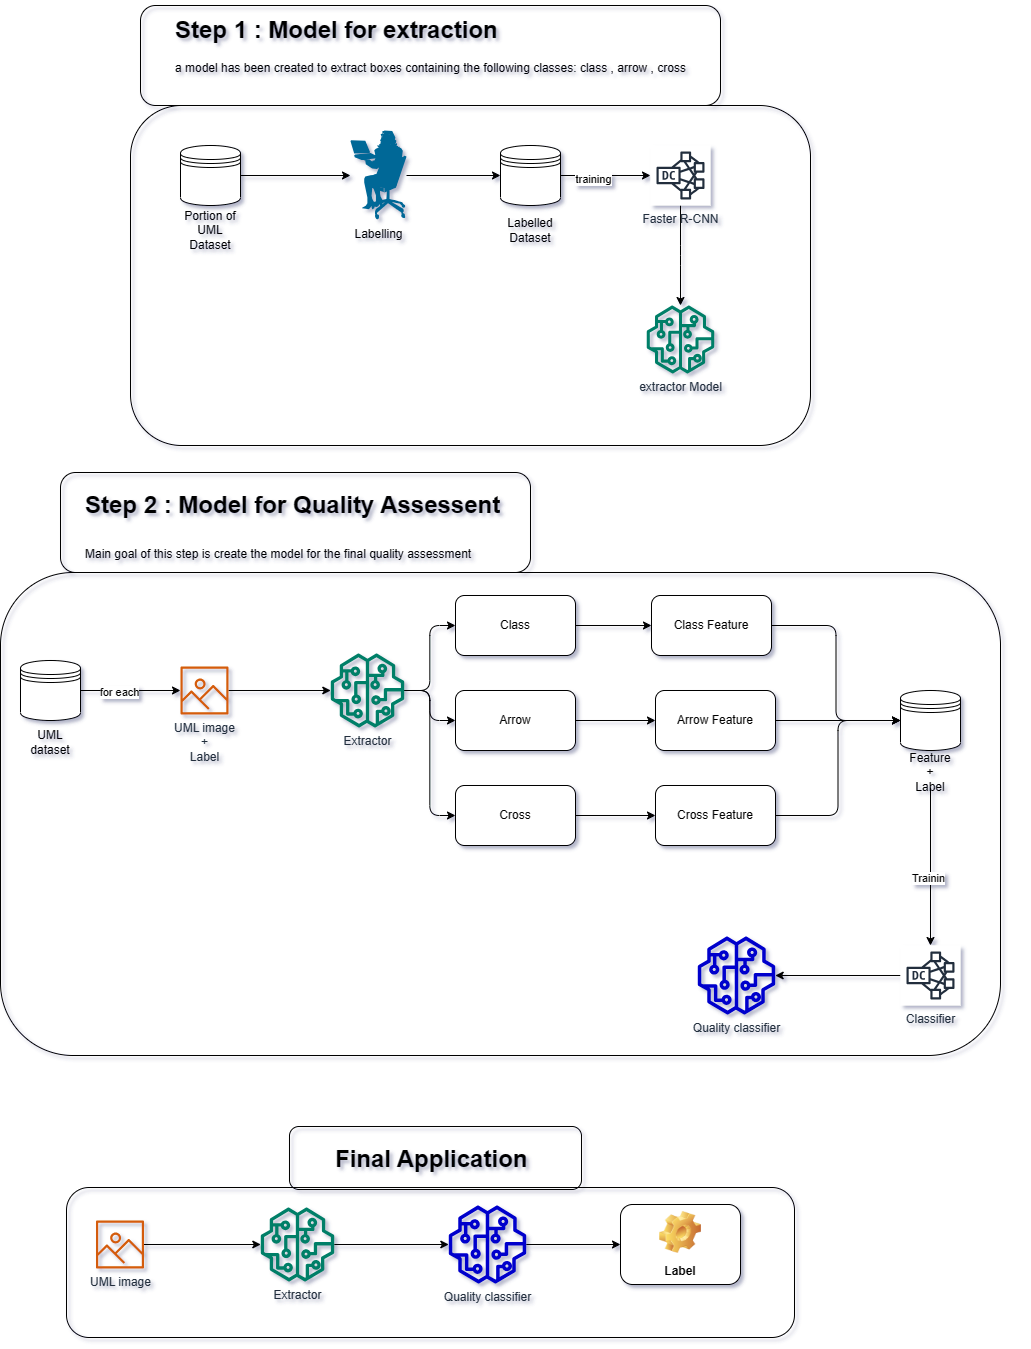

#Graveyard

## Arrow Detection

### Version 1.0 - scritto

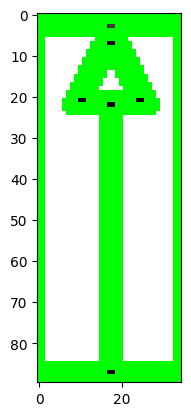

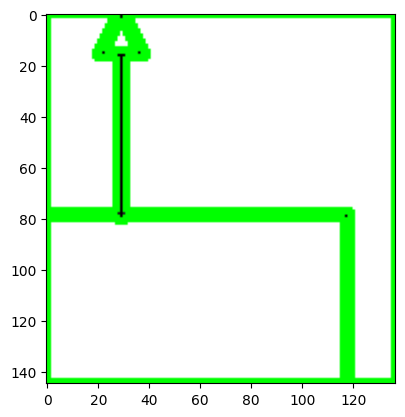

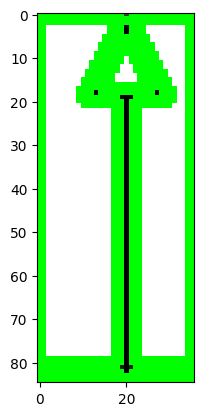

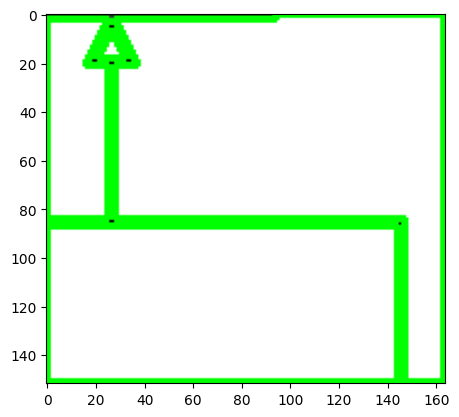

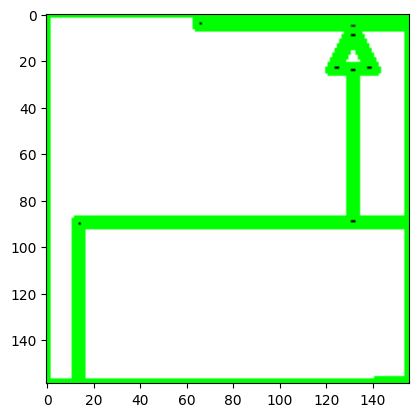

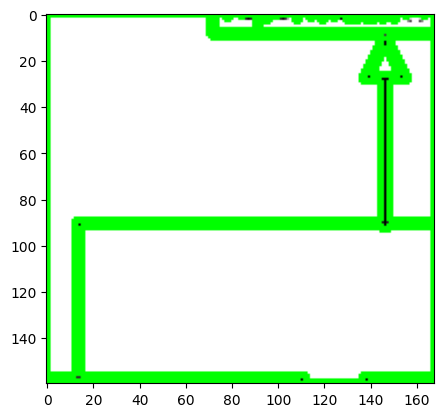

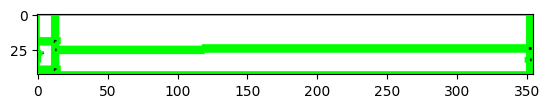

In [ ]:
import cv2
import matplotlib.pyplot as plt
images = arrow_extractor.get_arrow()

def detect_and_show_contours(image):
    # Converti l'immagine in scala di grigi
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Applica il thresholding per ottenere un'immagine binaria
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Trova i contorni nell'immagine binaria
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crea una copia dell'immagine originale
    img_with_contours = image.copy()

    # Disegna i contorni sull'immagine copia
    cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

    return img_with_contours

# Itera su ogni immagine nella lista e applica il rilevamento dei contorni
for image in images:
    image_with_contours = detect_and_show_contours(image)

    # Visualizza l'immagine con i contorni trovati
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.show()







### Version 2.0 - scritto

https://stackoverflow.com/questions/66718462/how-to-detect-different-types-of-arrows-in-image

Max Thickness: 9.31638868129394
Max Angle: -77.76388849058367
Max Length: 84.92938243034621



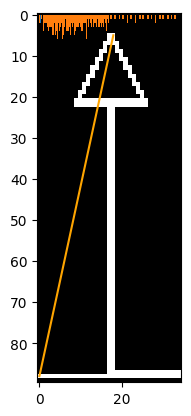

Max Thickness: 7.875647658369511
Max Angle: 57.9946167919165
Max Length: 169.81166037701888



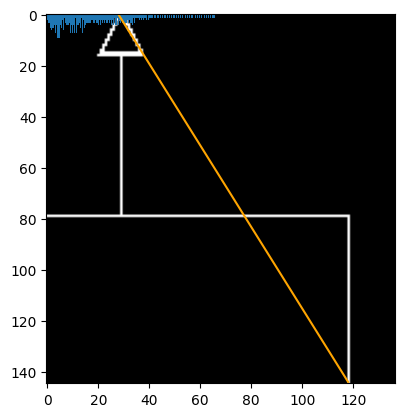

Max Thickness: 6.338365110057188
Max Angle: -75.96375653207353
Max Length: 82.46211251235322



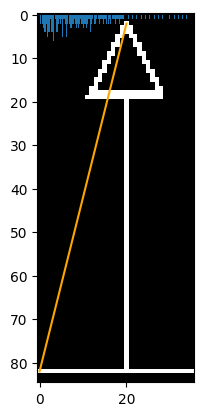

Max Thickness: 7.710852157656112
Max Angle: 51.19883731350568
Max Length: 189.90787240133042



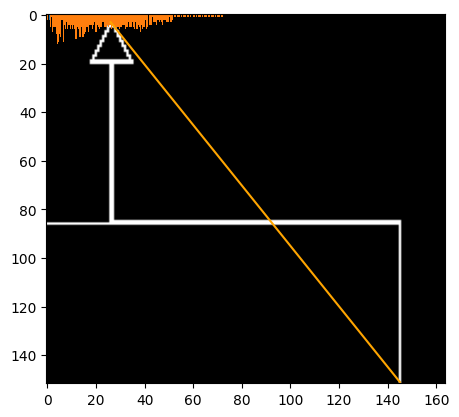

Max Thickness: 8.332793275205681
Max Angle: -51.7590811269705
Max Length: 192.25503894566717



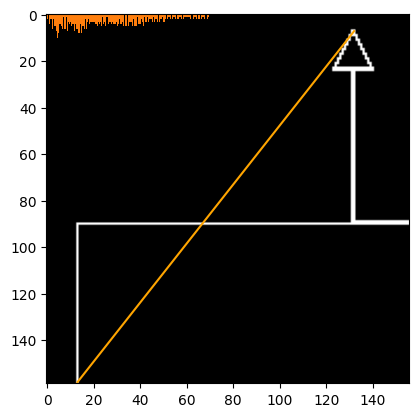

Max Thickness: 13.926443091274788
Max Angle: -47.47166476163341
Max Length: 196.7587355112855



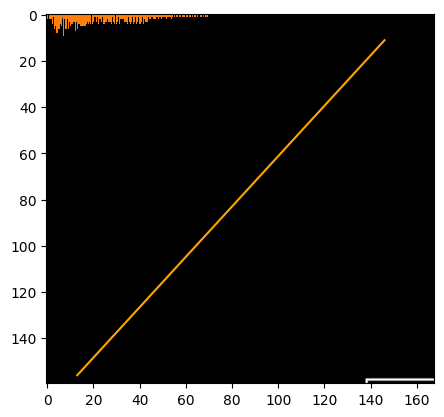

<ipython-input-10-79af6bc72411>:41: RuntimeWarning: divide by zero encountered in long_scalars
  arrow_slope = (far_point_2[0] - far_point_1[0]) / (far_point_2[1] - far_point_1[1])


Max Thickness: 1.9983079330423714
Max Angle: -0.17103166964991307
Max Length: 335.0014925339886



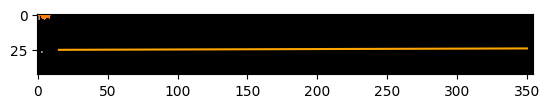

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
import math

# Assuming `images` is a list of images containing arrows

for img in images:
    # Convert the image to grayscale if it's not already
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

    max_arrow_length = 0
    max_arrow_thickness = 0
    max_arrow_angle = 0
    max_arrow_points = None

    for label in np.unique(labels)[1:]:
        arrow = labels == label
        indices = np.transpose(np.nonzero(arrow))  # y, x

        dist = distance.cdist(indices, indices, 'euclidean')
        far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

        far_point_1 = indices[far_points_index[0], :]  # y, x
        far_point_2 = indices[far_points_index[1], :]  # y, x

        # Length
        arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

        if arrow_length > max_arrow_length:
            max_arrow_length = arrow_length
            max_arrow_points = (far_point_1, far_point_2)

            # Slope
            arrow_slope = (far_point_2[0] - far_point_1[0]) / (far_point_2[1] - far_point_1[1])
            max_arrow_angle = math.degrees(math.atan(arrow_slope))

            # Thickness
            x = np.linspace(far_point_1[1], far_point_2[1], 20)
            y = np.linspace(far_point_1[0], far_point_2[0], 20)
            line = np.array([[yy, xx] for yy, xx in zip(y, x)])
            thickness_dist = np.amin(distance.cdist(line, indices, 'euclidean'), axis=0).flatten()

            n, bins, patches = plt.hist(thickness_dist, bins=150)

            max_arrow_thickness = 2 * bins[np.argmax(n)]

    print(f"Max Thickness: {max_arrow_thickness}")
    print(f"Max Angle: {max_arrow_angle}")
    print(f"Max Length: {max_arrow_length}\n")

    # Display the image with the largest arrow
    plt.imshow(cv2.cvtColor(arrow.astype(np.uint8) * 255, cv2.COLOR_BGR2RGB))
    plt.plot([max_arrow_points[0][1], max_arrow_points[1][1]], [max_arrow_points[0][0], max_arrow_points[1][0]], color='orange')
    plt.show()


### Version 3.0 - scritto

Max Length: 2727.4342767211015



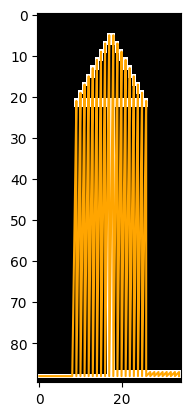

Max Length: 2753.1258238315813



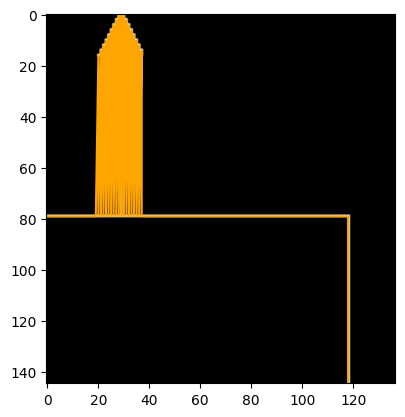

Max Length: 2607.1257447270445



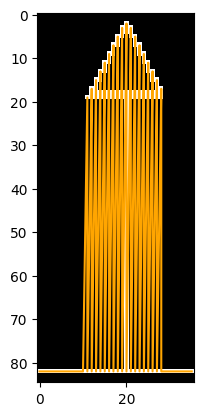

Max Length: 3047.684060083135



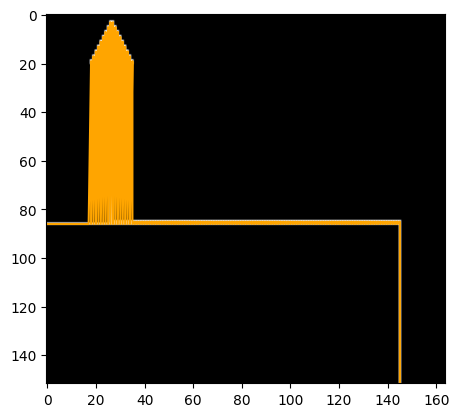

Max Length: 2980.3411242013885



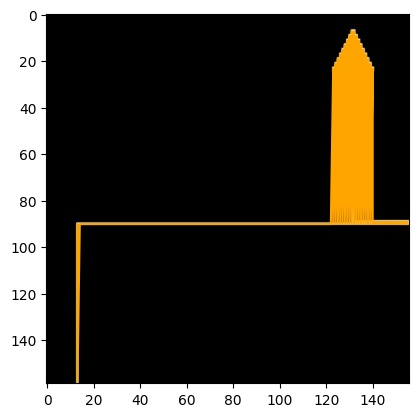

Max Length: 2856.5476501419976



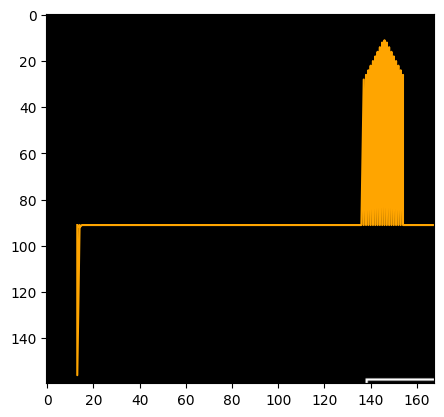

Max Length: 347.72792206135796



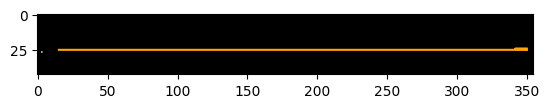

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Assuming `images` is a list of images containing arrows

for img in images:
    # Convert the image to grayscale if it's not already
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

    max_arrow_length = 0
    max_arrow_points = None

    for label in np.unique(labels)[1:]:
        arrow = labels == label
        indices = np.transpose(np.nonzero(arrow))  # y, x

        dist = distance.cdist(indices, indices, 'euclidean')
        far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

        far_point_1 = indices[far_points_index[0], :]  # y, x
        far_point_2 = indices[far_points_index[1], :]  # y, x

        # Length
        arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

        if arrow_length > max_arrow_length:
            max_arrow_length = arrow_length
            max_arrow_points = (far_point_1, far_point_2)

            # Calculate the length of the broken arrow
            sorted_indices = sorted(indices, key=lambda x: x[1])
            broken_arrow_length = 0
            for i in range(len(sorted_indices) - 1):
                broken_arrow_length += distance.cdist(sorted_indices[i].reshape(1, 2), sorted_indices[i + 1].reshape(1, 2), 'euclidean')[0][0]

    print(f"Max Length: {broken_arrow_length}\n")

    # Display the image with the largest arrow
    plt.imshow(cv2.cvtColor(arrow.astype(np.uint8) * 255, cv2.COLOR_BGR2RGB))
    x_coords = [point[1] for point in sorted_indices]
    y_coords = [point[0] for point in sorted_indices]
    plt.plot(x_coords, y_coords, color='orange')
    plt.show()


### Version Solo Bordi - scritto

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



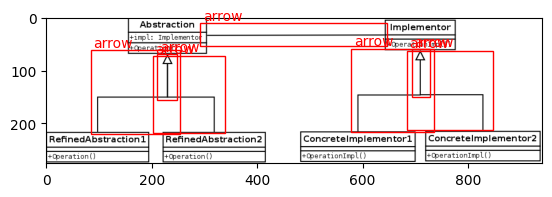



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



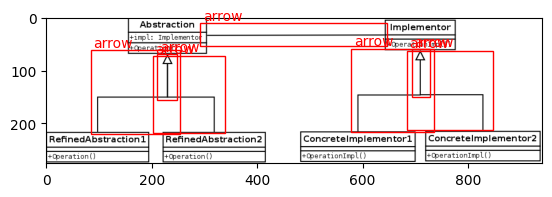



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

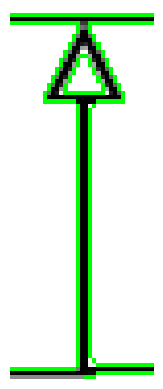

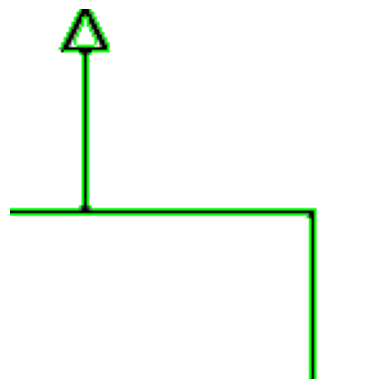

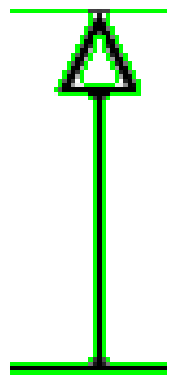

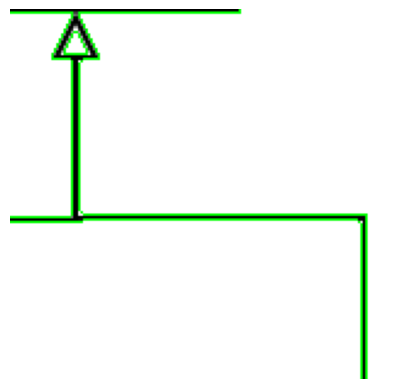

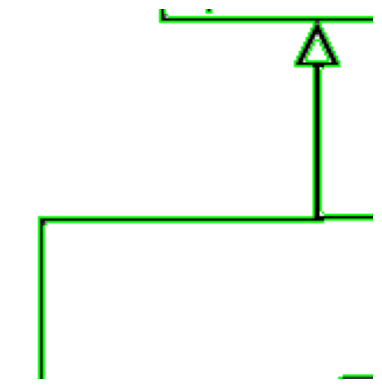

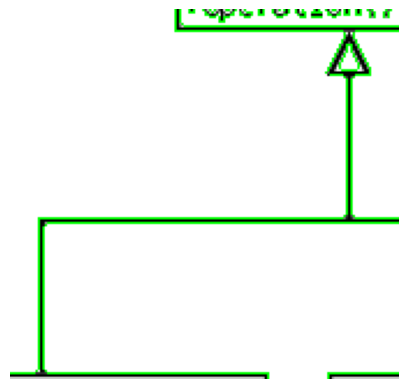

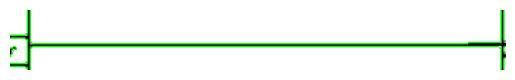

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_lines(img):
    # Converti l'immagine in scala di grigi
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
    equalized_img = cv2.equalizeHist(gray_img)

    # Trova i bordi delle linee utilizzando l'algoritmo di Canny
    edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

    # Crea un'immagine vuota con lo stesso formato dell'immagine originale
    highlighted_img = np.copy(img)

    # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
    line_color = (0, 255, 0)

    # Evidenzia i bordi trovati sulle linee nell'immagine originale
    highlighted_img[edges != 0] = line_color

    return highlighted_img

# Supponiamo che images sia una lista di immagini

for img in images:
    # Evidenzia le linee nell'immagine corrente
    highlighted_img = enhance_lines(img)

    # Visualizza l'immagine risultante
    plt.imshow(highlighted_img)
    plt.axis('off')
    plt.show()


###Version Harris Corner - scritto

Max Length: 84.92938243034621



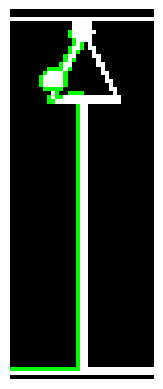

Max Length: 169.81166037701888



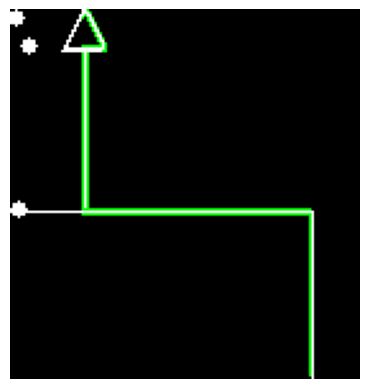

Max Length: 82.46211251235322



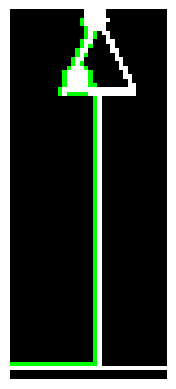

Max Length: 189.90787240133042



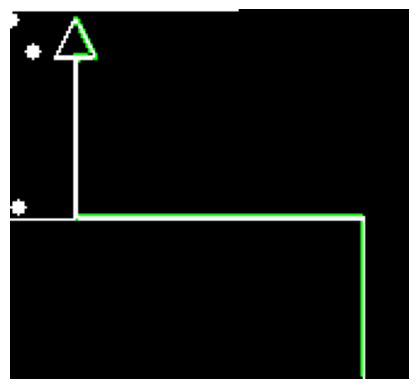

Max Length: 192.25503894566717



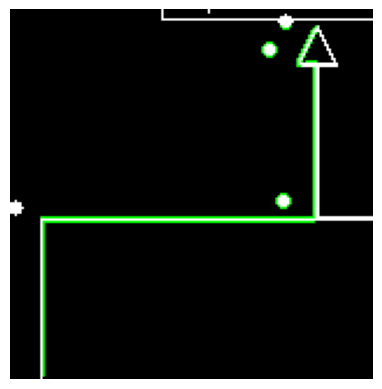

Max Length: 196.7587355112855



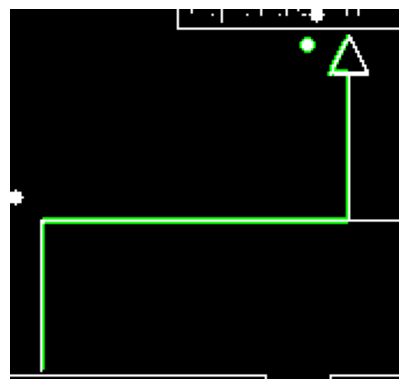

Max Length: 335.0014925339886



IndexError: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

def enhance_lines_between_points(img, far_point_1, far_point_2):
    # Converti l'immagine in scala di grigi
    if len(img.shape) > 2:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()

    # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
    equalized_img = cv2.equalizeHist(gray_img)

    # Trova i bordi delle linee utilizzando l'algoritmo di Canny
    edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

    # Crea un'immagine vuota con lo stesso formato dell'immagine originale
    highlighted_img = np.copy(img)

    # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
    line_color = (0, 255, 0)

    # Evidenzia solo i bordi trovati sulle linee nell'area definita da far_point_1 e far_point_2
    mask = np.zeros_like(edges)
    mask[min(far_point_1[0], far_point_2[0]): max(far_point_1[0], far_point_2[0]),
         min(far_point_1[1], far_point_2[1]): max(far_point_1[1], far_point_2[1])] = 255

    # Converti l'immagine in scala di grigi in un'immagine a colori
    highlighted_img = cv2.merge([highlighted_img, highlighted_img, highlighted_img])

    # Assegna il colore alle linee nell'area definita da far_point_1 e far_point_2
    highlighted_img[np.logical_and(edges != 0, mask != 0)] = line_color

    return highlighted_img

def harris_corner_detection(img, max_corners=100, quality_level=0.01, min_distance=10):
    if len(img.shape) > 2:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()

    gray_img = np.float32(gray_img)
    corners = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

    # Applica un filtro per selezionare solo i punti con una certa qualità
    corners_filtered = np.zeros_like(corners)
    corners_filtered[corners > quality_level * corners.max()] = 1

    # Sceglie i punti più forti in base alla qualità
    corners_indices = np.argwhere(corners_filtered == 1)
    corners_indices = corners_indices[np.argsort(corners[corners_filtered == 1])][::-1]

    # Seleziona solo un massimo di max_corners punti con una distanza minima tra loro
    selected_corners = [corners_indices[0]]
    for corner in corners_indices:
        if np.min(distance.cdist(corner.reshape(1, 2), selected_corners)) > min_distance:
            selected_corners.append(corner)
        if len(selected_corners) == max_corners:
            break

    return selected_corners
for img in images:
    # Convert the image to grayscale if it's not already
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

    max_arrow_length = 0
    max_arrow_thickness = 0
    max_arrow_angle = 0
    max_arrow_points = None

    for label in np.unique(labels)[1:]:
        arrow = labels == label
        indices = np.transpose(np.nonzero(arrow))  # y, x

        dist = distance.cdist(indices, indices, 'euclidean')
        far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

        far_point_1 = indices[far_points_index[0], :]  # y, x
        far_point_2 = indices[far_points_index[1], :]  # y, x

        # Length
        arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

        if arrow_length > max_arrow_length:
            max_arrow_length = arrow_length
            max_arrow_points = (far_point_1, far_point_2)

    print(f"Max Length: {max_arrow_length}\n")

    # Esegui Harris Corner Detection per trovare i punti rilevanti tra far_point_1 e far_point_2
    corners = harris_corner_detection(img[min(max_arrow_points[0][0], max_arrow_points[1][0]):
                                          max(max_arrow_points[0][0], max_arrow_points[1][0]),
                                          min(max_arrow_points[0][1], max_arrow_points[1][1]):
                                          max(max_arrow_points[0][1], max_arrow_points[1][1])])

    # Verifica se ci sono punti rilevanti e se sono sufficienti per l'evidenziazione delle linee
    if len(corners) < 2:
        print("Non ci sono abbastanza punti rilevanti per evidenziare le linee.")
        continue

    # Copia l'immagine originale per l'evidenziazione dei punti
    highlighted_img = np.copy(img)

    # Evidenzia i punti con pallini rossi
    for corner in corners:
        cv2.circle(highlighted_img, (corner[1], corner[0]), 3, (255, 0, 0), -1)

    # Evidenzia le linee nell'area definita da far_point_1 e far_point_2
    highlighted_img = enhance_lines_between_points(highlighted_img, max_arrow_points[0], max_arrow_points[1])

    # Visualizza l'immagine risultante
    plt.imshow(highlighted_img, cmap='gray')
    plt.axis('off')
    plt.show()

###Version Naive - scritto

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



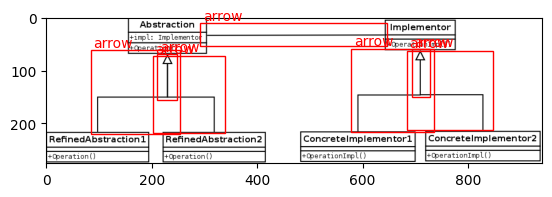



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



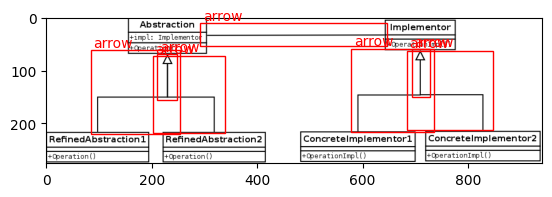



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

Max Length: 84.929



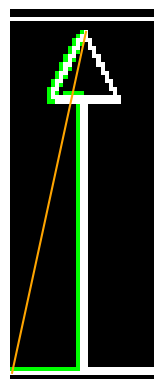

Max Length: 169.812



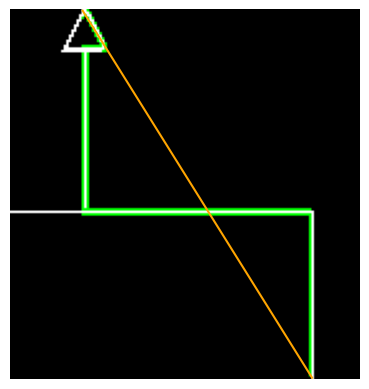

Max Length: 82.462



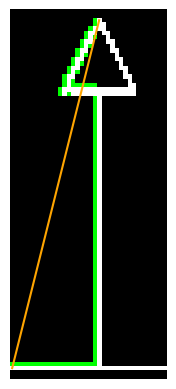

Max Length: 189.908



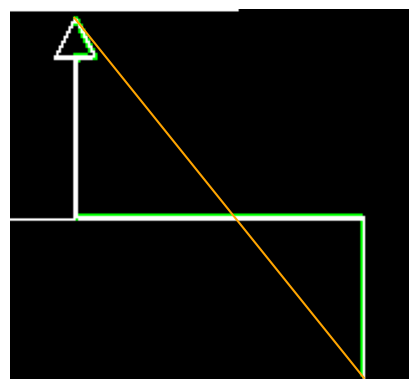

Max Length: 192.255



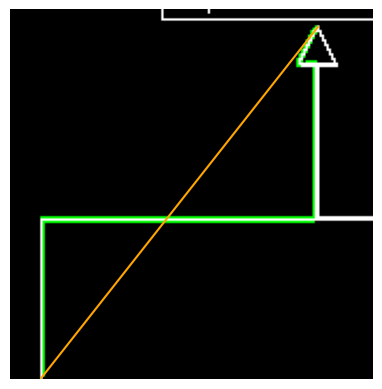

Max Length: 196.759



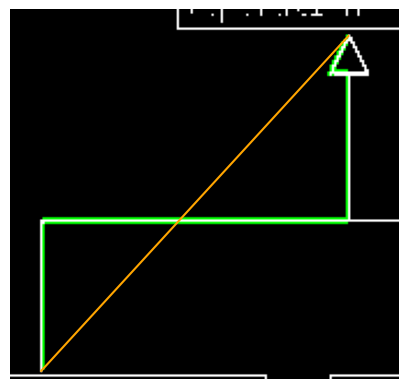

Max Length: 335.001



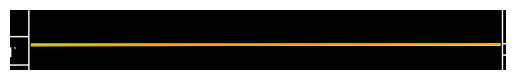

[84.929, 169.812, 82.462, 189.908, 192.255, 196.759, 335.001]

In [ ]:
images = arrow_extractor.get_arrow()
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
import math

from scipy.spatial import distance

def enhance_lines_between_points(img, far_point_1, far_point_2):
    # Converti l'immagine in scala di grigi
    if len(img.shape) > 2:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img.copy()

    # Applica una trasformazione di contrasto (es. equalizzazione dell'istogramma)
    equalized_img = cv2.equalizeHist(gray_img)

    # Trova i bordi delle linee utilizzando l'algoritmo di Canny
    edges = cv2.Canny(equalized_img, threshold1=30, threshold2=100)

    # Crea un'immagine vuota con lo stesso formato dell'immagine originale
    highlighted_img = np.copy(img)

    # Imposta il colore delle linee evidenziate in verde (puoi personalizzare il colore)
    line_color = (0, 255, 0)

    # Evidenzia solo i bordi trovati sulle linee nell'area definita da far_point_1 e far_point_2
    mask = np.zeros_like(edges)
    mask[min(far_point_1[0], far_point_2[0]): max(far_point_1[0], far_point_2[0]),
         min(far_point_1[1], far_point_2[1]): max(far_point_1[1], far_point_2[1])] = 255

    # Converti l'immagine in scala di grigi in un'immagine a colori
    highlighted_img = cv2.merge([highlighted_img, highlighted_img, highlighted_img])

    # Assegna il colore alle linee nell'area definita da far_point_1 e far_point_2
    highlighted_img[np.logical_and(edges != 0, mask != 0)] = line_color

    return highlighted_img

def find_lenght(images):
  list_lenght = []
  for img in images:
      # Convert the image to grayscale if it's not already
      if len(img.shape) > 2:
          img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
      labels, stats = cv2.connectedComponentsWithStats(img, 8)[1:3]

      max_arrow_length = 0
      max_arrow_thickness = 0
      max_arrow_angle = 0
      max_arrow_points = None

      for label in np.unique(labels)[1:]:
          arrow = labels == label
          indices = np.transpose(np.nonzero(arrow))  # y, x

          dist = distance.cdist(indices, indices, 'euclidean')
          far_points_index = np.unravel_index(np.argmax(dist), dist.shape)  # y, x

          far_point_1 = indices[far_points_index[0], :]  # y, x
          far_point_2 = indices[far_points_index[1], :]  # y, x

          # Length
          arrow_length = distance.cdist(far_point_1.reshape(1, 2), far_point_2.reshape(1, 2), 'euclidean')[0][0]

          if arrow_length > max_arrow_length:
              max_arrow_length = arrow_length
              max_arrow_points = (far_point_1, far_point_2)

      max_arrow_length = round(max_arrow_length,3)
      print(f"Max Length: {max_arrow_length}\n")
      list_lenght.append(max_arrow_length)
      # Evidenzia le linee nell'area definita da far_point_1 e far_point_2
      highlighted_img = enhance_lines_between_points(img, max_arrow_points[0], max_arrow_points[1])

      # Visualizza l'immagine risultante
      plt.imshow(highlighted_img)
      plt.plot([max_arrow_points[0][1], max_arrow_points[1][1]], [max_arrow_points[0][0], max_arrow_points[1][0]], color='orange')
      plt.axis('off')
      plt.show()
  return list_lenght


find_lenght(images)

###Versione HoughLinesP - scritto

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



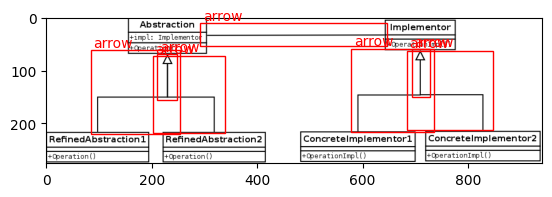



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



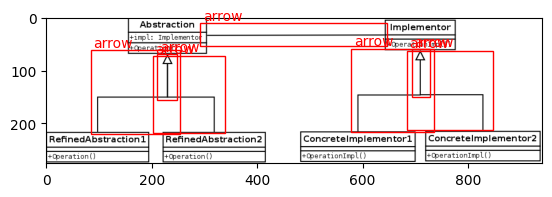



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

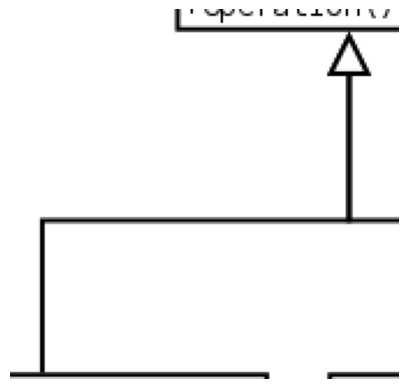

32


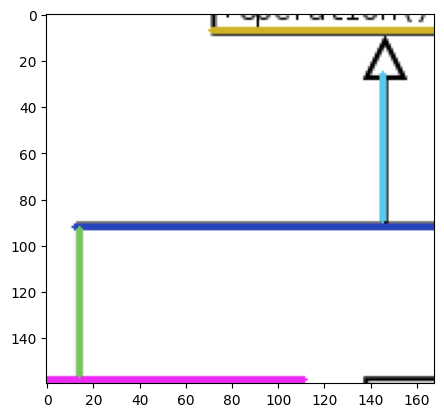

5


In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leggi l'immagine
image = images[5]
height , width , channel = image.shape
plt.imshow(image)
plt.axis('off')
plt.show()

# Converte l'immagine in scala di grigi
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inizializza l'immagine di output
out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Applica un filtro di sfocatura mediana e inverte l'immagine
img = 255 - cv2.medianBlur(img, 3)

# Rileva e disegna le linee
theta_resolution_degrees = 45
theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
min_size = min(height, width)
threshold = math.floor(0.2 * min_size) #20% del minimo tra lungh e hight
print(threshold)
lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 20, minLineLength = threshold, maxLineGap=2)

colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

# Trova il centro di ciascuna linea
centers = []
for line in lines:
    for x1, y1, x2, y2 in line:
        center_x = round((x1 + x2) / 2)
        center_y = round((y1 + y2) / 2)
        centers.append((center_x, center_y))

# Raggruppa le linee con lo stesso centro (con tolleranza di 5 pixel)
grouped_lines = {}
for i, (center_x, center_y) in enumerate(centers):
    grouped = False
    for center, group in grouped_lines.items():
        if abs(center_x - center[0]) <= 5 and abs(center_y - center[1]) <= 5:
            group.append(lines[i])
            grouped = True
            break
    if not grouped:
        grouped_lines[(center_x, center_y)] = [lines[i]]

# Trova la linea più lunga in ogni gruppo
selected_lines = []
for group in grouped_lines.values():
    longest_length = 0
    longest_line = None
    for line in group:
        for x1, y1, x2, y2 in line:
            length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if length > longest_length:
                longest_length = length
                longest_line = line
    if longest_line is not None:
        selected_lines.append(longest_line)

# Disegna solo le linee selezionate
count = 0
for line in selected_lines:
    count +=1
    for x1, y1, x2, y2 in line:
        color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
        cv2.line(out, (x1, y1), (x2, y2), color, 2)

plt.imshow(out)
plt.axis('on')
plt.show()
print(count)


###Versione HoughLinesP Advanced

Algoritmo :

1. Applico il greyscle e la gaussiana(per il noise) all'immagine
2. Uso HoughLinesP per selezionare le linee
3. Trovo per ogni linea il punto centrale , e aggrego in gruppi le linee che hanno il centro uguale con una tolleranza di 20px. (l'algoritmo mi trovava per ogni linea , molte linee , questo sfalsava il calcolo della lunghezza della freccia)
3. filtro il gruppo , facendo rimanere per ogni centro solo una delle tante linee trovate
4. Ora voglio filtrare le linee distanti non connesse , che corrispondono al rumore , quindi linee identificate per sbaglio e facenti parti di altre cose. Quidi dalle linee selected_lines , rimangono solo le linee che hanno una linea vicina a meno di una threshold
5. le linee rimanenti corrispondo alla freccia e ci calcolo la distanza

Image Shape:  (276, 941, 3)
Filtered predictions after thresholding, keeping only the 'class' class.
Total number of predictions:  7 



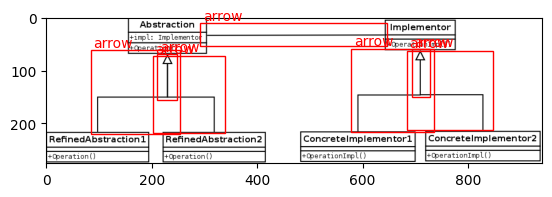



Number of elements per class:
arrow: 7


tensor([692.9927,  59.5989, 727.0041, 149.0860]) tensor(0.8854) arrow
tensor([201.6947,  72.2301, 338.2031, 217.6361]) tensor(0.8841) arrow
tensor([210.0420,  69.0856, 246.9014, 154.7231]) tensor(0.8788) arrow
tensor([683.8920,  61.5759, 847.1186, 213.3140]) tensor(0.8769) arrow
tensor([578.7164,  57.8540, 734.8381, 216.3882]) tensor(0.8416) arrow
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) tensor(0.7748) arrow
tensor([291.7317,   9.5858, 646.2210,  52.6906]) tensor(0.7619) arrow
Total number of preictions:  7 



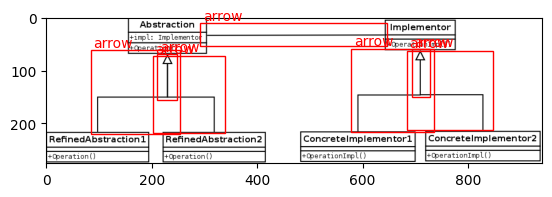



tensor([692.9927,  59.5989, 727.0041, 149.0860]) arrow tensor(0.8854)
tensor([201.6947,  72.2301, 338.2031, 217.6361]) arrow tensor(0.8841)
tensor([210.0420,  69.0856, 246.9014, 154.7231]) arrow tensor(0.8788)
tensor([683.8920,  61.5759, 847.1186, 213.3140]) arrow tensor(0.8769)
tensor([578.7164,  57.8540, 734.8381, 216.3882]) arrow tensor(0.8416)
tensor([ 84.2206,  60.8981, 252.8074, 220.5891]) arrow tensor(0.7748)
tensor([291.7317,   9.5858, 646.2210,  52.6906]) arrow tensor(0.7619)


In [ ]:
image=utils.read_image('/content/drive/My Drive/dataset_label/test/02_uml.png')

# Creazione dell'oggetto UMLClassSegmenter
acc_threshold = 0.7
iou_threshold=0.2
desired_class = 'arrow'
arrow_extractor = arrow_feature_extractor_HP(image,acc_threshold,iou_threshold,desired_class)
images = arrow_extractor.get_arrow()

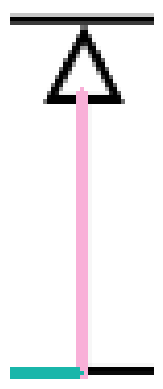

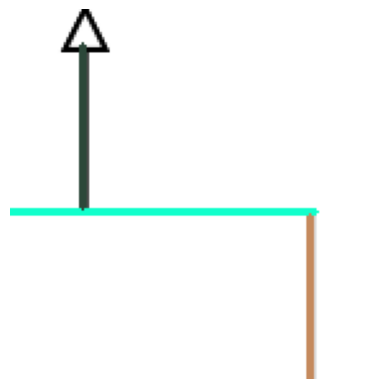

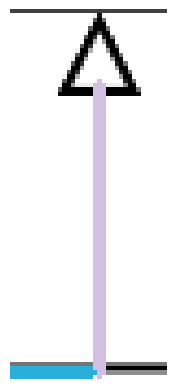

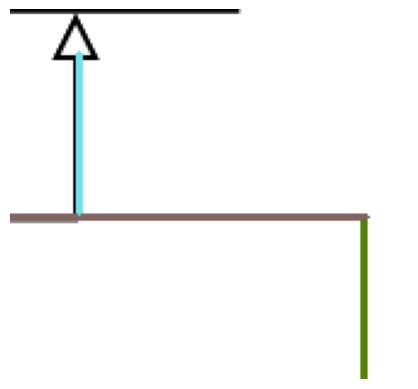

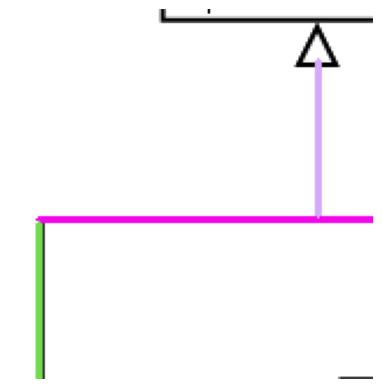

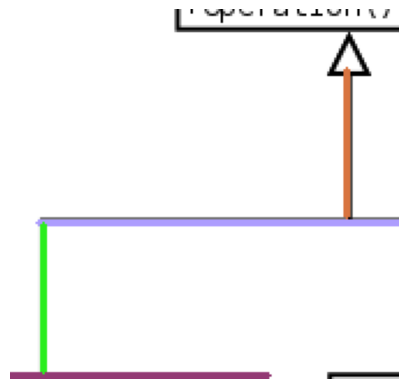

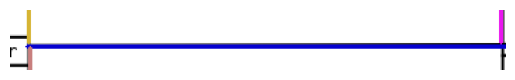

[85.0, 245.0, 84.0, 275.0, 275.0, 392.0, 403.0]


In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Funzione per calcolare tutti i punti intermedi delle linee
def intermediate_points(line):
    x1, y1, x2, y2 = line[0]
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    steps = max(dx, dy)
    if steps == 0:
        return [(x1, y1)]
    x_inc = (x2 - x1) / steps
    y_inc = (y2 - y1) / steps
    for i in range(steps + 1):
        points.append((round(x1 + i * x_inc), round(y1 + i * y_inc)))
    return points

# Funzione per controllare se due linee hanno almeno un punto vicino tra loro
def are_lines_close(line1, line2, threshold=6):
    points_line1 = intermediate_points(line1)
    points_line2 = intermediate_points(line2)

    for x1, y1 in points_line1:
        for x2, y2 in points_line2:
            dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if dist <= threshold:
                return True
    return False

def connect_lines(image):
    height, width, channel = image.shape
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = 255 - cv2.medianBlur(img, 3)

    theta_resolution_degrees = 45
    theta_resolution_radians = np.pi / 180 * theta_resolution_degrees
    min_size = min(height, width)
    threshold = math.floor(0.2 * min_size)
    lines = cv2.HoughLinesP(img, 1, theta_resolution_radians, 20, minLineLength=threshold, maxLineGap=2)

    colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(lines))]

    centers = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            center_x = round((x1 + x2) / 2)
            center_y = round((y1 + y2) / 2)
            centers.append((center_x, center_y))

    grouped_lines = {}
    for i, (center_x, center_y) in enumerate(centers):
        grouped = False
        for center, group in grouped_lines.items():
            if abs(center_x - center[0]) <= 20 and abs(center_y - center[1]) <= 20:  #vengono raggruppate tutte le linee che hanno come punto centrale un punto che ricade in un punto x +- 20 pixels , così riesco ad eliminare le linee che dll'algoritmo vengono trovate due volte
                group.append(lines[i])
                grouped = True
                break
        if not grouped:
            grouped_lines[(center_x, center_y)] = [lines[i]]

    selected_lines = []
    for group in grouped_lines.values():
        longest_length = 0
        longest_line = None
        for line in group:
            for x1, y1, x2, y2 in line:
                length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                if length > longest_length:
                    longest_length = length
                    longest_line = line
        if longest_line is not None:
            selected_lines.append(longest_line)

    connected_lines = []
    for i, line1 in enumerate(selected_lines):
        connected = False
        for j, line2 in enumerate(selected_lines):
            if i != j:
                if are_lines_close(line1, line2, threshold=6): #6 pixel threshold per mantenere il gruppo con le linee vicine , per selezionare le linee continue che compongono la freccia
                    connected = True
                    break
        if connected:
            connected_lines.append(line1)

    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            color = colors[np.where((lines == line).all(axis=(1, 2)))[0][0]]
            cv2.line(out, (x1, y1), (x2, y2), color, 2)

    total_length = 0
    for line in connected_lines:
        for x1, y1, x2, y2 in line:
            length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            total_length += length

    return out, total_length


# Lista di immagini
images = arrow_extractor.get_arrow()

# Lista per memorizzare le lunghezze delle linee selezionate per ogni immagine
list_length = []

# Applica l'algoritmo a ciascuna immagine
for image in images:
    result_image, total_length = connect_lines(image)
    list_length.append(total_length)

    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

# Stampa le lunghezze delle linee per ogni immagine
print(list_length)


## Rectangle Detection

Problemi :
- detection di quello esterno non va bene....
aspect ratio non uso openCV ---> RISOLTO

- frecce rilevate...

Number of contours detected: 953


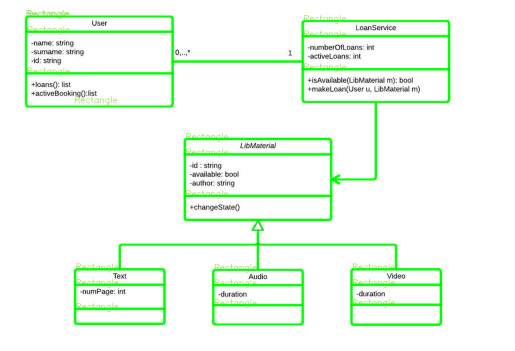

Number of rectangles found: 20


In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class.jpg')
rectangle_count = 0
height, width, _ = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,50,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)  #-> modifico il secondo valore per selezionare contorni diversi
print("Number of contours detected:", len(contours))

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ratio = float(w) / h
    if ratio >= 0.9 and ratio <= 1.1:
        continue  # Salta i quadrati
    if w < 20 or h < 20:  #w e h espressi in pixel
        continue  # Salta i rettangoli piccoli
    if w>=width or h>=height:
        continue

    rectangle_count += 1
    cv2.putText(img, 'Rectangle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 200, 100), 1)
    img = cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()
print("Number of rectangles found:", rectangle_count)



# STOP EX

In [ ]:

from google.colab import runtime
runtime.unassign()